# PmagPy Jupyter Notebook Version

by Lisa Tauxe, Lori Jonestrask, Nick Swanson-Hysell and Nick Jarboe

### What is **PmagPy**?  

**PmagPy** is a software package for analyzing paleomagnetic and rock magnetic data using Python. This notebook demonstrates how to use **PmagPy** in a Jupyter notebook or Python script.  For examples of how to use PmagPy scripts on the command line, see the static version of [**PmagPy\_cli.ipynb**](http://pmagpy.github.io/PmagPy-cli.html), or you can open it locally the same way you opened this notebook.


### What are paleomagnetism and rock magnetism?  

For information on the science of paleomagnetism and rock magnetism, see textbook at: https://earthref.org/MagIC/books/Tauxe/Essentials/


### Using Jupyter notebooks for Earth Science

If you already have some experience working with Python, you should be able to use this notebook without difficulty. 

If not, we have a full course in Python for Earth Scientists available on Github.  To check it out, see: 

https://nbviewer.jupyter.org/github/ltauxe/Python-for-Earth-Science-Students/blob/master/Lecture_01.ipynb

 

### Customizing this notebook

If you want to make changes to this notebook, you should make a copy (see File menu).  Otherwise each time you update **PmagPy**, your changes will be overwritten.

### Get started

To use the functions in this notebook, we have to   import the **PmagPy** modules **pmagplotlib**, **pmag** and **ipmag** and some other handy functions for use in the notebook.  This is done in the following code block which must be executed before running any other code block. To execute, click on the code block and then click on the "Run" button in the menu.  

In order to access the example data, this notebook is meant to be run in the PmagPy-data directory (PmagPy directory for developers).

Try it!  Run the code block below (click on the cell and then click 'Run'):



In [1]:
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import pmagpy.contribution_builder as cb
from pmagpy import convert_2_magic as convert
import matplotlib.pyplot as plt # our plotting buddy
import numpy as np # the fabulous NumPy package
import pandas as pd # and of course Pandas
# test if Basemap and/or cartopy is installed
has_basemap, Basemap = pmag.import_basemap()
has_cartopy, Cartopy = pmag.import_cartopy()
# test if xlwt is installed (allows you to export to excel)
try:
    import xlwt
    has_xlwt = True
except ImportError:
    has_xlwt = False
# This allows you to make matplotlib plots inside the notebook.  
%matplotlib inline 
from IPython.display import Image
import os

print('All modules imported!')

All modules imported!


- Now you have everything you need to run PmagPy!

## Guide to PmagPy

- the functions in this notebook are listed alphabetically so here is a handy guide by function:
- Calculations: 
    - [angle](#angle) : calculates the angle between two vectors
    - [apwp](#apwp) : returns predicted paleolatitudes, directions and pole latitude/longitude from apparent polar wander paths of Besse and Courtillot (2002).
    - [b_vdm](#b_vdm) : converts B (in microT) and (magnetic) latitude to V(A)DM (see [vdm_b](#vdm_b))
    - [bootams](#bootams) : calculates bootstrap statistics for tensor data
    - [cart_dir](#cart_dir) : converts cartesian coordinates (x,y,z) to declination, inclination, intensity (see [dir_cart](#dir_cart))
    - [di_eq](#di_eq) : maps declination, inclinatitions to X,Y for plotting in equal area projections
    - [di_geo](#di_geo) : rotates declination, inclination in specimen coordinates to geographic coordinates
    - [di_rot](#di_rot) : rotates directions to a  coordinate system with D,I as center
    - [di_tilt](#di_tilt) : rotates directions to stratigraphic coordinates
    - [di_vgp](#di_vgp) : converts direction to Virtual Geomagnetic Pole (see [vgp_di](#vgp_di))
    - [dia_vgp](#dia_vgp) : converts direction and $\alpha_{95}$ to Virtual Geomagnetic Pole and dp,dm
    - [dipole_pinc](#dipole_pinc) : calculates inclination given latitude assuming geocentric axial dipole
    - [dipole_plat](#dipole_plat) : calculates latitude given inclination assuming geocentric axial dipole
    - [dir_cart](#dir_cart) : converts declination, inclination, intensity to cartesian coordinates (see [cart_dir](#cart_dir))
    - [eigs_s](#eigs_s) : converts eigenparameters to equivalent 6 element tensor (see [s_eigs](#s_eigs))
    - [eq_di](#eq_di) : takes X,Y from equal area projection (e.g., from digitized coordinates) and  converts to declination, inclination
    - [fcalc](#fcalc) : returns the value from an F table, given the degrees of freedom.
    - [fisher](#fisher) : generates sets of directions drawn from Fisher distributions with vertical true mean
    - [fishrot](#fishrot) : generates sets of directions drawn from Fisher distributions with arbitrary true mean
    - [flip](#flip) : flips a second mode (reverse directions) to their antipodes
    - [gaussian](#gaussian) : generates data drawn from a normal distribution
    - [gobing](#gobing) : calculates Bingham statistics from a set of directions
    - [gofish](#gofish) : calculates Fisher statistics from a set of directions
    - [gokent](#gokent) : calculates Kent statistics from a set of directions
    - [goprinc](#goprinc) : calculates principal directions statistics
    - [igrf](#igrf) : calculates geomagnetic field vectors for location, age given a field model (e.g., IGRF)
    - [incfish](#incfish) : estimates the true mean inclination from inclination only data
    - [pca](#pca) : calculates the best-fit line or plane for demagnetization data and associated statistics
    - [pt_rot](#pt_rot) : rotates point given finite rotation pole
    - [scalc](#scalc) : calculates  VGP scatter
    - [s_eigs](#s_eigs) : takes a 6 element tensor and calculates eigen parameters (see [eigs_s](#eigs_s))
    - [s_geo](#s_geo) : rotates 6 element tensors to geographic coordinates
    - [s_hext](#s_hext) : calculates Hext statistics from 6 element tensors
    - [s_tilt](#s_tilt) : rotates 6 element tensors to stratigraphic coordinates
    - [separate_directions](#separate_directions) : separates a set of directions into two modes (normal and reverse)
    - [squish](#squish): flattens inclination data given flattening factor (see [unsquish](#unsquish))
    - [sundec](#sundec) : calulates direction to sun for location, date, time and sun azimuth
    - [tk03](#tk03) : generates sets of directions consistent with the TK03 field model
    - [uniform](#uniform) : generates sets of uniformly distributed directions
    - [unsquish](#unsquish) : unsquishes flattened inclinations, given flattening factor (see [squish](#squish))
    - [vector_mean](#vector_mean) : calculates vector mean for sets of vectors (declination, inclination, intensity)
    - [vdm_b](#vdm_b) : calculates intensity at given location from specified virtual dipole moment (see [b_vdm](#b_vdm))
    - [vgp_di](#vgp_di) : calculates direction at given location from virtual geomagnetic pole (see [di_vgp](#di_vgp))
    - [watsons_f](#watsons_f) : calculates Watson's F statistic for testing for common mean
    
- Plots:
    - [ani_depthplot](#ani_depthplot) : plots anisotropy data against depth in stratigraphic section (Xmas tree plots)
    - [aniso_magic](#aniso_magic) : makes plots of anisotropy data and bootstrapped confidences 
    - [biplot_magic](#biplot_magic) : plots different columns against each other in MagIC formatted data files
    - [chi_magic](#chi_magic) : plots magnetic susceptibility data in MagIC format as function of field, frequency or temperature
    - [common_mean](#common_mean) : graphical approach to testing two sets of directions for common mean using bootstrap
    - [core_depthplot](#core_depthplot) : plots MagIC formatted data 
    - [curie](#curie) : makes plots of Curie Temperature data and provides estimates for Tc
    - [dayplot_magic](#dayplot_magic) : makes Day et al. (1977) and other plots with hysteresis statistics
    - [dmag_magic](#dmag_magic) : plots remanence against demagnetization step for MagIC formatted files
    - [eqarea](#eqarea) and [eqarea_magic](#eqarea_magic) : makes equal area projections for directions
    - [eqarea_ell](#eqarea_ell) : makes equal area projections for directions with specified confidence ellipses
    - [find_ei](#find_ei) : finds the inclination unflattening factor that unsquishes directions to match TK03 distribution
    - [fishqq](#fishqq): makes a Quantile-Quantile plot for directions against uniform and exponential distributions
    - [foldtest](#foldtest) & [foldtest_magic](#foldtest_magic) : finds  tilt correction that maximizes concentration of directions, with bootstrap confidence bounds.          
    - [forc_diagram](#forc_diagram): plots FORC diagrams for both conventional and irregular FORCs
    - [hysteresis_magic](#hysteresis_magic) : makes plots of hysteresis data (not FORCs). 
    - [irm_unmix](#irm_unmix) : analyzes IRM acquisition data in terms of coercivity distributions
    - [irmaq_magic](#irm_magic) : plots IRM acquistion data
    - [lnp_magic](#lnp_magic) : plots lines and planes for site level data and calculates best fit mean and alpha_95
    - [lowes](#lowes) : makes a plot of the Lowe's spectrum for a geomagnetic field model
    - [lowrie](#lowrie) and [lowrie_magic](#lowrie_magic) : makes plots of Lowrie's (1990) 3D-IRM demagnetization experiments
    - [plot_cdf](#plot_cdf) and [plot_2cdfs](#plot_2cdfs) : makes a cumulative distribution plot of data
    - [plotdi_a](#plotdi_a) : makes equal are plots of directions and their $\alpha_{95}$s
    - [plot_geomagia](#plot_geomagia) : makes plots from files downloaded from the  geomagia website
    - [plot_magic_keys](#plot_magic_keys) : plots data from MagIC formatted data files
    - [qqplot](#qqplot) : makes a Quantile-Quantile plot for data against a normal distribution
    - [qqunf](#qqunf) : makes a Quantile-Quantile plot for data against a uniform distribution
    - [revtest](#revtest) & [revtest_magic](#revtest_magic) : performs a bootstrap reversals test
    - [thellier_magic](#thellier_magic) : makes plots of thellier-thellier data. 
    - [watsons_v](#watsons_v) : makes a graph for Watson's V test for common mean
    - [zeq](#zeq) and [zeq_magic](#zeq_magic) : makes quicky zijderveld plots for measurement data

- Maps: 
    - [cont_rot](#cont_rot) : makes plots of continents after rotation to specified coordinate system
    - [plot_mag_map](#plot_mag_map) : makes a color contour plot of geomagnetic field models
    - [plot_map_pts](#plot_map_pts) : plots points on maps
    - [polemap_magic](#polemap_magic) : reads in MagIC formatted file with paleomagnetic poles and plots them
    - [vgpmap_magic](#vgpmap_magic) : reads in MagIC formatted file with virtual geomagnetic poles and plots them
   
- Working with MagIC:
    - [reading MagIC files](#magic_read) : reading in MagIC formatted files
    - [writing MagIC files](#magic_write) : outputing MagIC formatted files
    - [combine_magic](#combine_magic) : combines two MagIC formatted files of same type
    - [convert_ages](#convert_ages) : convert ages in downloaded MagIC file to Ma
    - [grab_magic_key](#grab_magic_key) : prints out a single column from a MagIC format file
    - [magic_select](#magic_select) : selects data from MagIC format file given conditions (e.g., method_codes contain string)
    - [sites_extract](#sites_extract) : makes excel or latex files from sites.txt for publications
    - [criteria_extract](#criteria_extract) : makes excel or latex files from criteria.txt for publications
    - [specimens_extract](#specimens_extract) : makes excel or latex files from specimens.txt for publications

    - [contributions](#Contributions) work with data model 3.0 MagIC contributions
        - [download_magic](#download_magic) : unpacks a contribution text file downloaded from the MagIC website
        - [upload_magic](#upload_magic) : prepares a directory with a MagIC contribution for uploading to MagIC
        - [cb.add_sites_to_meas_table](#cb.add_sites_to_meas_table) : completes a measurements data frame with the information required for plotting by site. 
        - [cb.get_intensity_col](#cb.get_intensity_col) : finds the first non-zero type of intensity data in a measurements dataframe.

    - [conversion scripts](#Conversion-Scripts) : convert many laboratory measurement formats to the MagIC data model 3 format
        - [\_2g\_asc_magic](#\_2g\_asc\_magic) : converts 2G ascii files to MagIC
        - [\_2g\_bin_magic](#\_2g\_bin\_magic) : converts 2G binary files to MagIC
        - [aarm_magic](#aarm_magic) : takes a MagIC formated _measurements.txt_ file with anisotropy of ARM data and calculates the tensors and stores in a MagIC formatted _specimens.txt_ file.
        - [atrm_magic](#atrm_magic) : takes a MagIC formated _measurements.txt_ file with anisotropy of TRM data and calculates the tensors and stores in a MagIC formatted _specimens.txt_ file.
        - [agm_magic](#agm_magic) : converts Princeton Measurements alternating gradient force magnetization (AGM) files to MagIC.
        - [bgc_magic](#bgc_magic) : convert Berkeley Geochronology Center files to MagIC. 
        - [cit_magic](#cit_magic) : convert Cal Tech format files to MagIC.
        - [generic_magic](#generic_magic) : converts generic files to MagIC. 
        - [huji_magic](#huji_magic) : converts Hebrew University, Jerusalem, Israel files to MagIC.
        - [huji_sample_magic](#huji_sample_magic) : converts HUJI files to a MagIC format. 
        - [jr6_jr6_magic](#jr6_jr6_magic) : converts the AGICO JR6 spinner .jr6 files to MagIC 
        - [jr6_txt_magic](#jr6_txt_magic) : converts the AGICO JR6 .txt files to MagIC
        - [k15_magic](#k15_magic) : converts 15 measurement anisotropy of magnetic susceptibility files to MagIC.
        - [kly4s_magic](#kly4s_magic) : converts Agico KLY4S formatted files to MagIC.
        - [ldeo_magic](#ldeo_magic) : converts Lamont-Doherty files to MagIC.  
        - [livdb_magic](#livdb_magic) : converts Liverpool files to MagIC.  
        - [mst_magic](#mst_magic) : converts Curie Temperature experimental data to MagIC
        - [s_magic](#s_magic) : converts files with 6 tensor elements (S_j) to MagIC format
        - [sio_magic](#sio_magic) : converts Scripps Institution of Oceanography data files to MagIC 
        - [sufar4_magic](#sufar4_magic) : converts AGICO SUFAR program (ver.1.2.) ascii files to MagIC
        - [tdt_magic](#tdt_magic) : converts Thellier Tool files to MagIC
        - [utrecht_magic](#utrecht_magic) : converts Fort Hoofddijk, Utrecht University Robot files to MagIC
        - [orientation_magic](#orientation_magic) : converts an "orient.txt" formatted file with field notebook information into MagIC formatted files
        - [azdip_magic](#azdip_magic) : converts an "azdip" formatted file to a samples.txt file format
- other handy scripts
    - [chartmaker](#chartmaker) : script for making chart to guide IZZI lab experiment

## Figures

- The plotting functions make plots to the screen (using the  `%matplotlib inline` magic command), but all **matplotlib** plots can be saved with the command: 

`plt.savefig('PATH_TO_FILE_NAME.FMT') `

and then viewed in the notebook with:

`Image('PATH_TO_FILE_NAME.FMT')`




## Working with the MagIC database
- The Magnetics Information Consortium (MagIC) maintains a database of published rock and paleomagnetic data: https://www.earthref.org/MagIC 
- Many **PmagPy** scripts are designed to work with data in the MagIC format.  This notebook uses Data Model 3.0: https://www.earthref.org/MagIC/data-models/3.0   There are nine basic tables: contribution, locations, sites, samples, specimens, measurements, criteria, ages and images.   These are tab delimited data tables with the first line consisting of a delimiter and the table name: (e.g.,  tab    measurements).  All of the examples here are tab delimited.  The second line are the column names: (e.g., specimen experiment method_codes treat_temp.....).  Each subsequent line is a single record.

See the first few lines of this sample file below:

In [2]:
with open('data_files/3_0/McMurdo/samples.txt') as f:
    for line in f.readlines()[:3]:
        print(line, end="")

tab 	samples
azimuth	azimuth_dec_correction	citations	description	dip	geologic_classes	geologic_types	lat	lithologies	lon	method_codes	orientation_quality	sample	site
260	0	This study	Archived samples from 1965, 66 expeditions.	-57	Extrusive:Igneous	Lava Flow	-77.85	Trachyte	166.64	SO-SIGHT:FS-FD	g	mc01a	mc01


### I/O with MagIC data files

### magic_read

- MagIC formatted data files can be imported to a notebook in one of two ways: a

    - importing to a Pandas DataFrame using the Pandas pd.read_csv() function
    - importing to a list of dictionaries using the pmag.magic_read() function.  
    
    In this notebook, we generally read MagIC tables into a Pandas Dataframe with a command like: 

`meas_df = pd.read_csv('MEASUREMENTS_FILE_PATH',sep='\t',header=1)`

These data can then be manipulated with **Pandas** functions (https://pandas.pydata.org/)


In [3]:
meas_df=pd.read_csv('data_files/3_0/McMurdo/measurements.txt',sep='\t',header=1)
meas_df.head()

,experiment,specimen,measurement,dir_csd,dir_dec,dir_inc,hyst_charging_mode,hyst_loop,hyst_sweep_rate,treat_ac_field,...,timestamp,magn_r2_det,magn_x_sigma,magn_xyz_sigma,magn_y_sigma,magn_z_sigma,susc_chi_mass,susc_chi_qdr_mass,susc_chi_qdr_volume,susc_chi_volume
0,mc01f-LP-DIR-AF,mc01f,mc01f-LP-DIR-AF1,0.4,171.9,31.8,NaN,NaN,NaN,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mc01f-LP-DIR-AF,mc01f,mc01f-LP-DIR-AF2,0.4,172.0,30.1,NaN,NaN,NaN,0.0050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mc01f-LP-DIR-AF,mc01f,mc01f-LP-DIR-AF3,0.5,172.3,30.4,NaN,NaN,NaN,0.0075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mc01f-LP-DIR-AF,mc01f,mc01f-LP-DIR-AF4,0.4,172.1,30.4,NaN,NaN,NaN,0.0100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mc01f-LP-DIR-AF,mc01f,mc01f-LP-DIR-AF5,0.5,171.9,30.8,NaN,NaN,NaN,0.0125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Alternatively, the user may wish to use a list of dictionaries compatible with many **pmag** functions.  For that, use the **pmag.magic_read()** function: 

In [4]:
help (pmag.magic_read)

Help on function magic_read in module pmagpy.pmag:

magic_read(infile, data=None, return_keys=False, verbose=False)
    Reads  a Magic template file, returns  data in a list of dictionaries.
    
    Parameters
    ___________
        Required:
            infile : the MagIC formatted tab delimited data file
                first line contains 'tab' in the first column and the data file type in the second (e.g., measurements, specimen, sample, etc.)
        Optional:
            data : data read in with, e.g., file.readlines()
    Returns
    _______
        list of dictionaries, file type



In [5]:
meas_dict,file_type=pmag.magic_read('data_files/3_0/McMurdo/measurements.txt')
print (file_type)
print (meas_dict[0])

measurements
{'experiment': 'mc01f-LP-DIR-AF', 'specimen': 'mc01f', 'measurement': 'mc01f-LP-DIR-AF1', 'dir_csd': '0.4', 'dir_dec': '171.9', 'dir_inc': '31.8', 'hyst_charging_mode': '', 'hyst_loop': '', 'hyst_sweep_rate': '', 'treat_ac_field': '0.0', 'treat_ac_field_dc_off': '', 'treat_ac_field_dc_on': '', 'treat_ac_field_decay_rate': '', 'treat_dc_field': '0.0', 'treat_dc_field_ac_off': '', 'treat_dc_field_ac_on': '', 'treat_dc_field_decay_rate': '', 'treat_dc_field_phi': '0.0', 'treat_dc_field_theta': '0.0', 'treat_mw_energy': '', 'treat_mw_integral': '', 'treat_mw_power': '', 'treat_mw_time': '', 'treat_step_num': '1', 'treat_temp': '273', 'treat_temp_dc_off': '', 'treat_temp_dc_on': '', 'treat_temp_decay_rate': '', 'magn_mass': '', 'magn_moment': '2.7699999999999996e-05', 'magn_volume': '', 'citations': 'This study', 'instrument_codes': '', 'method_codes': 'LT-NO:LP-DIR-AF', 'quality': 'g', 'standard': 'u', 'meas_field_ac': '', 'meas_field_dc': '', 'meas_freq': '', 'meas_n_orient':

### magic_write

To write out a  MagIC table from a Pandas DataFrame, first convert it to a list of dictionaries using a command like:

`dicts = df.to_dict('records')`



then call **pmag.magic_write()**.

From a list of dictionaries, you can just call **pmag.magic_write()** directly.  



### pmag.magic_write

In [6]:
help(pmag.magic_write)

Help on function magic_write in module pmagpy.pmag:

magic_write(ofile, Recs, file_type)
    Parameters
    _________
    ofile : path to output file
    Recs : list of dictionaries in MagIC format
    file_type : MagIC table type (e.g., specimens)
    
    Return :
    [True,False] : True if successful
    ofile : same as input
    
    Effects :
        writes a MagIC formatted file from Recs



In [7]:
meas_dicts = meas_df.to_dict('records')
pmag.magic_write('my_measurements.txt', meas_dicts, 'measurements')

25470  records written to file  my_measurements.txt


(True, 'my_measurements.txt')

### combine_magic

[\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#combine_magic.py)
 
 MagIC tables have many columns only some of which are used in a particular instance. So combining files of the same type must be done carefully to ensure that the right data come under the right headings. The program **combine_magic** can be used to combine any number of MagIC files from a given type.  
It  reads in MagIC formatted files of a common type (e.g., sites.txt) and combines them into a single file, taking care that all the columns are preserved. For example, if there are both AF and thermal data from a study and we created a measurements.txt formatted file for each, we could use **combine_magic.py** on the command line to combine them together into a single measurements.txt file.   In a notebook, we use  **ipmag.combine_magic()**.  


In [8]:
help(ipmag.combine_magic)

Help on function combine_magic in module pmagpy.ipmag:

combine_magic(filenames, outfile, data_model=3, magic_table='measurements', output_dir_path='.', input_dir_path='')
    Takes a list of magic-formatted files, concatenates them, and creates a
    single file. Returns output filename if the operation was successful.
    
    Parameters
    -----------
    filenames : list of MagIC formatted files
    outfile : name of output file
    data_model : data model number (2.5 or 3), default 3
    magic_table : name of magic table, default 'measurements'
    
    Returns
    ----------
    outfile name if success, False if failure



Here we make a list of names of two MagIC formatted measurements.txt files and use **ipmag.combine_magic()** to put them together.

In [9]:
filenames=['data_files/combine_magic/af_measurements.txt','../combine_magic/therm_measurements.txt']
outfile='data_files/combine_magic/measurements.txt'
ipmag.combine_magic(filenames,outfile)

-I- Using online data model
-I- Getting method codes from earthref.org
-I- Using cached vocabularies
-I- overwriting /Users/nebula/Python/PmagPy/data_files/combine_magic/measurements.txt
-I- 14 records written to measurements file


'/Users/nebula/Python/PmagPy/data_files/combine_magic/measurements.txt'

### convert_ages

Files downloaded from the MagIC search interface have ages that are in the original units, but what is often desired is for them to be in a single unit.  For example, if we searched the MagIC database for all absolute paleointensity data (records with method codes of 'LP-PI-TRM') from the last five million years, the data sets have a variety of age units.  We can use **pmag.convert_ages()**    to convert them all to millions of years.  

First we follow the instructions for unpacking downloaded files in [download_magic](#download_magic).  



In [10]:
ipmag.download_magic('magic_downloaded_rows.txt',dir_path='data_files/convert_ages/',
      input_dir_path='data_files/convert_ages/')

working on:  'contribution'
1  records written to file  /Users/nebula/Python/PmagPy/data_files/convert_ages/contribution.txt
contribution  data put in  /Users/nebula/Python/PmagPy/data_files/convert_ages/contribution.txt
working on:  'sites'
14317  records written to file  /Users/nebula/Python/PmagPy/data_files/convert_ages/sites.txt
sites  data put in  /Users/nebula/Python/PmagPy/data_files/convert_ages/sites.txt


True

After some minimal filtering using Pandas, we can convert a DataFrame to a list of dictionaries required by most PmagPy functions and use **pmag.convert_ages()** to convert all the ages.  The converted list of dictionaries can then be turned back into a Pandas DataFrame and either plotted or filtered further as desired.  

In this example, we filter for data older than the Brunhes (0.78 Ma) and younger than 5 Ma, then plot them against latitude.  We can also use [vdm_b](#vdm_b) to plot the intensities expected from the present dipole moment (~80 ZAm$^2$). 

In [11]:
help(pmag.convert_ages)

Help on function convert_ages in module pmagpy.pmag:

convert_ages(Recs, data_model=3)
    converts ages to Ma
    Parameters
    _________
    Recs : list of dictionaries in data model by data_model
    data_model : MagIC data model (default is 3)



In [12]:
# read in the sites.txt file as a dataframe
site_df=pd.read_csv('data_files/convert_ages/sites.txt',sep='\t',header=1)
# get rid aof any records without intensity data or latitude
site_df=site_df.dropna(subset=['int_abs','lat'])
# Pick out the sites with 'age' filled in
site_df_age=site_df.dropna(subset=['age'])
# pick out those with age_low and age_high filled in
site_df_lowhigh=site_df.dropna(subset=['age_low','age_high'])
# concatenate the two
site_all_ages=pd.concat([site_df_age,site_df_lowhigh]) 
# get rid of duplicates (records with age, age_high AND age_low)
site_all_ages.drop_duplicates(inplace=True)
# Pandas reads in blanks as NaN, which pmag.convert_ages hates
# this replaces all the NaNs with blanks
site_all_ages.fillna('',inplace=True)
# converts to a list of dictionaries
sites=site_all_ages.to_dict('records')
# converts the ages to Ma
converted_df=pmag.convert_ages(sites)
# turn it back into a DataFrame
site_ages=pd.DataFrame(converted_df)
# filter away
site_ages=site_ages[site_ages.age.astype(float) <= 5]
site_ages=site_ages[site_ages.age.astype(float) >=0.05]



Let's plot them up and see what we get.

Text(0,0.5,'Intensity ($\\mu$T)')

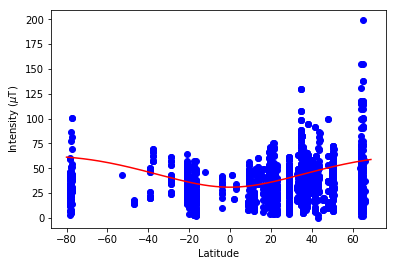

In [13]:
plt.plot(site_ages.lat,site_ages.int_abs*1e6,'bo')

# put on the expected values for the present dipole moment (~80 ZAm^2)

lats=np.arange(-80,70,1)
vdms=80e21*np.ones(len(lats))
bs=pmag.vdm_b(vdms,lats)*1e6
plt.plot(lats,bs,'r-')
plt.xlabel('Latitude')
plt.ylabel('Intensity ($\mu$T)')


That is pretty awful agreement.  Someday we need to figure out what is wrong with the data or  our GAD hypothesis.  

### grab_magic_key

[\[MagIC Database\]](https://earthref.org/MagIC) [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#grab_magic_key.py)

Sometimes you want to read in a MagIC file and print out the desired key. **Pandas** makes this easy!  In this example, we will print out latitudes for each site record.

In [14]:
sites=pd.read_csv('data_files/download_magic/sites.txt',sep='\t',header=1)
print (sites.lat)

0     42.60264
1     42.60264
2     42.60260
3     42.60352
4     42.60350
5     42.60104
6     42.60100
7     42.73656
8     42.73660
9     42.84180
10    42.84180
11    42.86570
12    42.86570
13    42.92031
14    42.92030
15    42.56857
16    42.49964
17    42.49962
18    42.49960
19    42.50001
20    42.50000
21    42.52872
22    42.52870
23    42.45559
24    42.45560
25    42.48923
26    42.48920
27    42.46186
28    42.46190
29    42.69156
30    42.65289
31    42.65290
32    43.30504
33    43.30500
34    43.36817
35    43.36817
36    43.36820
37    43.42133
38    43.42130
39    43.88590
40    43.88590
41    43.88590
42    43.84273
43    43.84270
44    43.53289
45    43.57494
46    43.57494
47    43.57490
48    44.15663
49    44.15660
50    44.18629
51    42.60260
Name: lat, dtype: float64


### magic_select

[\[MagIC Database\]](https://earthref.org/MagIC) [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#magic_select.py)

This example demonstrates how to select MagIC records that meet a certain criterion, like having a particular method code.

Note:  to output into a MagIC formatted file, we can change the DataFrame to a list of dictionaries (with df.to_dict("records")) and
use **pmag.magic_write()**.. 

In [15]:
help(pmag.magic_write)

Help on function magic_write in module pmagpy.pmag:

magic_write(ofile, Recs, file_type)
    Parameters
    _________
    ofile : path to output file
    Recs : list of dictionaries in MagIC format
    file_type : MagIC table type (e.g., specimens)
    
    Return :
    [True,False] : True if successful
    ofile : same as input
    
    Effects :
        writes a MagIC formatted file from Recs



In [16]:
# read in the data file
spec_df=pd.read_csv('data_files/magic_select/specimens.txt',sep='\t',header=1)
# pick out the desired data 
method_key='method_codes' # change to method_codes for data model 3
spec_df=spec_df[spec_df.method_codes.str.contains('LP-DIR-AF')]
specs=spec_df.to_dict('records') # export to list of dictionaries
success,ofile=pmag.magic_write('data_files/magic_select/AF_specimens.txt',specs,'pmag_specimens') # specimens for data model 3.0


76  records written to file  data_files/magic_select/AF_specimens.txt


### sites_extract

It is frequently desirable to format tables for publications from the MagIC formatted files.  This example is for the sites.txt formatted file.  It will create a site information table with the location and age information,  and directions and/or intenisty summary tables.  The function to call is **ipmag.sites_extract()**.

In [17]:
help(ipmag.sites_extract)

Help on function sites_extract in module pmagpy.ipmag:

sites_extract(site_file='sites.txt', directions_file='directions.xls', intensity_file='intensity.xls', info_file='site_info.xls', output_dir_path='.', input_dir_path='', latex=False)
    Extracts directional and/or intensity data from a MagIC 3.0 format sites.txt file.
    Default output format is an Excel file.
    Optional latex format longtable file which can be uploaded to Overleaf or
    typeset with latex on your own computer.
    
    Parameters
    ___________
    site_file : str
         input file name
    directions_file : str
          output file name for directional data
    intensity_file : str
          output file name for intensity data
    site_info : str
          output file name for site information (lat, lon, location, age....)
    output_dir_path : str
          path for output files
    input_dir_path : str
          path for intput file if different from output_dir_path (default is same)
    latex : boole

Here is an example for how to create Latex files: 

In [18]:
#latex way:
ipmag.sites_extract(directions_file='directions.tex',intensity_file='intensities.tex',
              output_dir_path='data_files/3_0/McMurdo',info_file='site_info.tex',latex=True)

(True,
 ['/Users/nebula/Python/PmagPy/data_files/3_0/McMurdo/site_info.tex',
  '/Users/nebula/Python/PmagPy/data_files/3_0/McMurdo/intensities.tex',
  '/Users/nebula/Python/PmagPy/data_files/3_0/McMurdo/directions.tex'])

And here is how to create Excel files:

In [19]:
#xls way:
if has_xlwt:
    print(ipmag.sites_extract(output_dir_path='data_files/3_0/McMurdo'))

(True, ['/Users/nebula/Python/PmagPy/data_files/3_0/McMurdo/site_info.xls', '/Users/nebula/Python/PmagPy/data_files/3_0/McMurdo/intensity.xls', '/Users/nebula/Python/PmagPy/data_files/3_0/McMurdo/directions.xls'])


### criteria_extract

This example is for the criteria.txt formatted file.  It will create a criteria  table suitable for publication in either LaTex or .csv format.  The function to call is **ipmag.criteria_extract()**.

In [20]:
help(ipmag.criteria_extract)

Help on function criteria_extract in module pmagpy.ipmag:

criteria_extract(crit_file='criteria.txt', output_file='criteria.xls', output_dir_path='.', input_dir_path='', latex=False)
    Extracts criteria  from a MagIC 3.0 format criteria.txt file.
    Default output format is an Excel file.
    typeset with latex on your own computer.
    
    Parameters
    ___________
    crit_file : str, default "criteria.txt"
         input file name
    output_file : str, default "criteria.xls"
         output file name
    output_dir_path : str, default "."
        output file directory
    input_dir_path : str, default ""
          path for intput file if different from output_dir_path (default is same)
    latex : boolean, default False
           if True, output file should be latex formatted table with a .tex ending
    
    Return :
        [True,False],  data table error type : True if successful
    
    Effects :
        writes xls or latex formatted tables for use in publications



In [21]:
# latex way:
ipmag.criteria_extract(output_dir_path='data_files/3_0/Megiddo',
                       latex=True,output_file='criteria.tex',)

(True, ['/Users/nebula/Python/PmagPy/data_files/3_0/Megiddo/criteria.tex'])

In [22]:
#xls way:
if has_xlwt:
    print(ipmag.criteria_extract(output_dir_path='data_files/3_0/Megiddo'))

(True, ['/Users/nebula/Python/PmagPy/data_files/3_0/Megiddo/criteria.xls'])


### specimens_extract

Similarly, it is useful to make tables for specimen (intensity) data to include in publications.  Here are examples using a specimens.txt file.  

In [23]:
help(ipmag.specimens_extract)

Help on function specimens_extract in module pmagpy.ipmag:

specimens_extract(spec_file='specimens.txt', output_file='specimens.xls', landscape=False, longtable=False, output_dir_path='.', input_dir_path='', latex=False)
    Extracts specimen results  from a MagIC 3.0 format specimens.txt file.
    Default output format is an Excel file.
    typeset with latex on your own computer.
    
    Parameters
    ___________
    spec_file : str, default "specimens.txt"
         input file name
    output_file : str, default "specimens.xls"
         output file name
    landscape : boolean, default False
           if True output latex landscape table
    longtable : boolean
           if True output latex longtable
    output_dir_path : str, default "."
        output file directory
    input_dir_path : str, default ""
          path for intput file if different from output_dir_path (default is same)
    latex : boolean, default False
           if True, output file should be latex formatted t

In [24]:
#latex way:
ipmag.specimens_extract(output_file='specimens.tex',landscape=True,
              output_dir_path='data_files/3_0/Megiddo',latex=True,longtable=True)

(True, ['/Users/nebula/Python/PmagPy/data_files/3_0/Megiddo/specimens.tex'])

In [25]:
#xls way:
if has_xlwt:
    print(ipmag.specimens_extract(output_dir_path='data_files/3_0/Megiddo'))

(True, ['/Users/nebula/Python/PmagPy/data_files/3_0/Megiddo/specimens.xls'])


## Contributions

Here are some useful functions for working with MagIC data model 3.0 contributions. 

### download_magic

[\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#download_magic.py)

 This program unpacks the .txt files downloaded from the MagIC database into individual text files. It has an option to also separate files for each location
 
 As an example, go to the MagIC data base at http://earthref.org/MAGIC/doi/10.1029/2003gc000661 and dowload the contribution.    Make a folder into which you should put the downloaded txt file called MagIC_download and move the file into it. Now use the program **download_magic** to unpack the .txt file (magic_contribution_16533.txt).

To do this within a notebook,  use the function **ipmag.download_magic()**. 

In [26]:
help(ipmag.download_magic)

Help on function download_magic in module pmagpy.ipmag:

download_magic(infile, dir_path='.', input_dir_path='', overwrite=False, print_progress=True, data_model=3.0, separate_locs=False)
    takes the name of a text file downloaded from the MagIC database and
    unpacks it into magic-formatted files. by default, download_magic assumes
    that you are doing everything in your current directory. if not, you may
    provide optional arguments dir_path (where you want the results to go) and
    input_dir_path (where the downloaded file is IF that location is different from
    dir_path).
    
    Parameters
    ----------
    infile : str
        MagIC-format file to unpack
    dir_path : str
        output directory (default ".")
    input_dir_path : str, default ""
        path for intput file if different from output_dir_path (default is same)
    overwrite: bool
        overwrite current directory (default False)
    print_progress: bool
        verbose output (default True)
    dat

In [27]:
ipmag.download_magic(infile='magic_contribution_16533.txt',\
                     input_dir_path='data_files/download_magic',dir_path='data_files/download_magic')

working on:  'contribution'
1  records written to file  /Users/nebula/Python/PmagPy/data_files/download_magic/contribution.txt
contribution  data put in  /Users/nebula/Python/PmagPy/data_files/download_magic/contribution.txt
working on:  'locations'
3  records written to file  /Users/nebula/Python/PmagPy/data_files/download_magic/locations.txt
locations  data put in  /Users/nebula/Python/PmagPy/data_files/download_magic/locations.txt
working on:  'sites'
52  records written to file  /Users/nebula/Python/PmagPy/data_files/download_magic/sites.txt
sites  data put in  /Users/nebula/Python/PmagPy/data_files/download_magic/sites.txt
working on:  'samples'
271  records written to file  /Users/nebula/Python/PmagPy/data_files/download_magic/samples.txt
samples  data put in  /Users/nebula/Python/PmagPy/data_files/download_magic/samples.txt
working on:  'specimens'
225  records written to file  /Users/nebula/Python/PmagPy/data_files/download_magic/specimens.txt
specimens  data put in  /Users/neb

True

You could look at these data with [dmag_magic](#dmag_magic) for example...

### upload_magic

[\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#upload_magic.py)

We can just turn around and try to upload the file downloaded in [download_magic](#download_magic).  For this we use **ipmag.upload_magic()** in the same directory as for the download.   You can try to upload the file you create to the MagIC data base as a private contribution here: https://www2.earthref.org/MagIC/upload



In [28]:
help(ipmag.upload_magic)

Help on function upload_magic in module pmagpy.ipmag:

upload_magic(concat=False, dir_path='.', dmodel=None, vocab='', contribution=None, input_dir_path='')
    Finds all magic files in a given directory, and compiles them into an
    upload.txt file which can be uploaded into the MagIC database.
    Parameters
    ----------
    concat : boolean where True means do concatenate to upload.txt file in dir_path,
        False means write a new file (default is False)
    dir_path : string for input/output directory (default ".")
    dmodel : pmagpy data_model.DataModel object,
        if not provided will be created (default None)
    vocab : pmagpy controlled_vocabularies3.Vocabulary object,
        if not provided will be created (default None)
    contribution : pmagpy contribution_builder.Contribution object, if not provided will be created
        in directory (default None)
    input_dir_path : str, default ""
        path for intput files if different from output dir_path (default 

In [29]:
ipmag.upload_magic(dir_path='data_files/download_magic',concat=True)

-I- Removing old error files from /Users/nebula/Python/PmagPy/data_files/download_magic: locations_errors.txt, samples_errors.txt, specimens_errors.txt, sites_errors.txt, ages_errors.txt, measurements_errors.txt, criteria_errors.txt, contribution_errors.txt, images_errors.txt
-W- Column 'core_depth' isn't in samples table, skipping it
-W- Column 'composite_depth' isn't in samples table, skipping it
-W- Invalid or missing column names, could not propagate columns
-I- ages file successfully read in
-I- Validating ages
-I- No row errors found!
-I- appending ages data to /Users/nebula/Python/PmagPy/data_files/download_magic/upload.txt
-I- 20 records written to ages file
-I- ages written to  /Users/nebula/Python/PmagPy/data_files/download_magic/upload.txt
-I- contribution file successfully read in
-I- dropping these columns: version from the contribution table
-I- Validating contribution
-W- these rows have problems: row: 0, name: 0
-W- these columns contain bad values: data_model_version
-

(False,
 'Validation of your upload file has failed.\nYou can still upload /Users/nebula/Python/PmagPy/data_files/download_magic/Snake-River_13.Mar.2019.txt to MagIC,\nbut you will need to fix the above errors before your contribution can be activated.',
 ['contribution'],
 {'contribution': {'rows':    num                   value_pass_data_model_version_cv  \
   0    0  "3" is not in controlled vocabulary for magic_...   
   
                                                 issues  
   0  {'value_pass_data_model_version_cv': '"3" is n...  ,
   'missing_columns': [],
   'missing_groups': Index([], dtype='object')}})

If this were your own study, you could now go to https://earthref.org/MagIC and upload your contribution to a Private Workspace, validate, assign a DOI and activate!  

### cb.add_sites_to_meas_table

MagIC data model 3 took out redundant columns in the MagIC tables so the hierarchy of specimens (in the measurements and specimens tables) up to samples, sites and locations is lost.  To put these back into the measurement table, we have the function **cb.add_sites_to_meas_table()**, which is super handy when data analysis requires it.  

In [30]:
help(cb.add_sites_to_meas_table)

Help on function add_sites_to_meas_table in module pmagpy.contribution_builder:

add_sites_to_meas_table(dir_path)
    Add site columns to measurements table (e.g., to plot intensity data),
    or generate an informative error message.
    
    Parameters
    ----------
    dir_path : str
        directory with data files
    
    
    Returns
    ----------
    status : bool
        True if successful, else False
    data : pandas DataFrame
        measurement data with site/sample



In [31]:
status,meas_df=cb.add_sites_to_meas_table('data_files/3_0/McMurdo')
meas_df.columns

Index(['experiment', 'specimen', 'measurement', 'dir_csd', 'dir_dec',
       'dir_inc', 'hyst_charging_mode', 'hyst_loop', 'hyst_sweep_rate',
       'treat_ac_field', 'treat_ac_field_dc_off', 'treat_ac_field_dc_on',
       'treat_ac_field_decay_rate', 'treat_dc_field', 'treat_dc_field_ac_off',
       'treat_dc_field_ac_on', 'treat_dc_field_decay_rate',
       'treat_dc_field_phi', 'treat_dc_field_theta', 'treat_mw_energy',
       'treat_mw_integral', 'treat_mw_power', 'treat_mw_time',
       'treat_step_num', 'treat_temp', 'treat_temp_dc_off', 'treat_temp_dc_on',
       'treat_temp_decay_rate', 'magn_mass', 'magn_moment', 'magn_volume',
       'citations', 'instrument_codes', 'method_codes', 'quality', 'standard',
       'meas_field_ac', 'meas_field_dc', 'meas_freq', 'meas_n_orient',
       'meas_orient_phi', 'meas_orient_theta', 'meas_pos_x', 'meas_pos_y',
       'meas_pos_z', 'meas_temp', 'meas_temp_change', 'analysts',
       'description', 'software_packages', 'timestamp', 'magn_r2

### cb.get_intensity_col

The MagIC data model has several different forms of magnetization with different normalizations (moment, volume, or mass).  So to find the one used in a particular measurements table we can use this handy function.  

In [32]:
help(cb.get_intensity_col)

Help on function get_intensity_col in module pmagpy.contribution_builder:

get_intensity_col(data)
    Check measurement dataframe for intensity columns 'magn_moment', 'magn_volume', 'magn_mass','magn_uncal'.
    Return the first intensity column that is in the dataframe AND has data.
    
    Parameters
    ----------
    data : pandas DataFrame
    
    Returns
    ---------
    str
        intensity method column or ""



In [33]:
magn_col=cb.get_intensity_col(meas_df)
print (magn_col)

magn_moment


# Conversion Scripts

## convert_2_magic

We imported this module as **convert**.  It provides many functions for creating MagIC format files from non-MagIC formats. The MagIC formatted files can then be used with PmagPy programs and uploaded to the MagIC database. Let's take a look at the options:



### \_2g\_asc\_magic

This conversion has not been written yet. If you have this file format and wish to convert it to the MagIC file format, please let us know.

### \_2g\_bin\_magic

[\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#_2g_bin_magic.py)

To convert the binary formatted 2G Enterprises measurement files, we  can use the function **convert.\_2g_bin()** in the **convert_2_magic** module (imported as **convert**). 

In [34]:
help(convert._2g_bin)

Help on function _2g_bin in module pmagpy.convert_2_magic:

_2g_bin(dir_path='.', mag_file='', meas_file='measurements.txt', spec_file='specimens.txt', samp_file='samples.txt', site_file='sites.txt', loc_file='locations.txt', or_con='3', specnum=0, samp_con='2', corr='1', gmeths='FS-FD:SO-POM', location='unknown', inst='', user='', noave=False, input_dir='', lat='', lon='')
     Convert 2G binary format file to MagIC file(s)
    
     Parameters
     ----------
     dir_path : str
         output directory, default "."
     mag_file : str
         input file name
     meas_file : str
         output measurement file name, default "measurements.txt"
     spec_file : str
         output specimen file name, default "specimens.txt"
     samp_file: str
         output sample file name, default "samples.txt"
     site_file : str
         output site file name, default "sites.txt"
     loc_file : str
         output location file name, default "locations.txt"
     or_con : number
         ori

In [35]:
# set the input directory
input_dir='data_files/convert_2_magic/2g_bin_magic/mn1/'
mag_file='mn001-1a.dat'
convert._2g_bin(mag_file=mag_file,input_dir=input_dir,dir_path=input_dir)

importing  mn001-1a
adding measurement column to measurements table!
-I- writing measurements records to /Users/nebula/Python/PmagPy/measurements.txt
-I- 19 records written to measurements file
-I- writing specimens records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/2g_bin_magic/mn1/specimens.txt
-I- 1 records written to specimens file
-I- writing samples records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/2g_bin_magic/mn1/samples.txt
-I- 1 records written to samples file
-I- writing sites records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/2g_bin_magic/mn1/sites.txt
-I- 1 records written to sites file
-I- writing locations records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/2g_bin_magic/mn1/locations.txt
-I- 1 records written to locations file
-I- writing measurements records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/2g_bin_magic/mn1/measurements.txt
-I- 19 records written to measurements file


(True, 'measurements.txt')

These are measurement data for a single specimen, so we can take a quickie look at the data in an equal area projection.

In [36]:
help(ipmag.plot_di)

Help on function plot_di in module pmagpy.ipmag:

plot_di(dec=None, inc=None, di_block=None, color='k', marker='o', markersize=20, legend='no', label='', title='', edge='')
    Plot declination, inclination data on an equal area plot.
    
    Before this function is called a plot needs to be initialized with code that looks
    something like:
    >fignum = 1
    >plt.figure(num=fignum,figsize=(10,10),dpi=160)
    >ipmag.plot_net(fignum)
    
    Required Parameters
    -----------
    dec : declination being plotted
    inc : inclination being plotted
    
    or
    
    di_block: a nested list of [dec,inc,1.0]
    (di_block can be provided instead of dec, inc in which case it will be used)
    
    Optional Parameters (defaults are used if not specified)
    -----------
    color : the default color is black. Other colors can be chosen (e.g. 'r')
    marker : the default marker is a circle ('o')
    markersize : default size is 20
    label : the default label is blank ('')
    leg

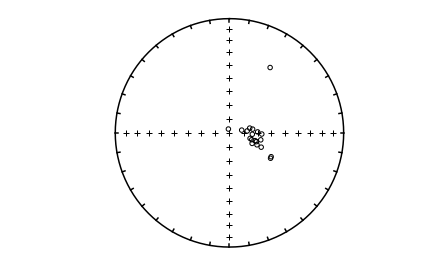

In [37]:
meas_df=pd.read_csv(input_dir+'measurements.txt',sep='\t',header=1)
ipmag.plot_net(1)
ipmag.plot_di(dec=meas_df['dir_dec'],inc=meas_df['dir_inc'])

### agm_magic

[\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#agm_magic.py)

 This program converts Micromag hysteresis files into MagIC formatted files. Because this program creates files for uploading to the MagIC database, specimens should also have sample/site/location information, which can be provided on the command line. If this information is not available, for example if this is a synthetic specimen, specify syn= True for synthetic name. 

Someone named Lima Tango has measured a synthetic specimen named myspec for hysteresis and saved the data in a file named agm_magic_example.agm in the agm_magic/agm_directory folder. The backfield IRM curve for the same specimen was saved in same directory as agm_magic_example.irm. Use the function **convert.agm()** to convert the data into a measurements.txt output file. For the backfield IRM file, set the keyword "bak" to True.  These were measured using cgs units, so be sure to set the units key word argument properly. Combine the two output files together using the instructions for [combine_magic](#combine_magic).  The agm files can be plotted using [hysteresis_magic](#hysteresis_magic) but the back-field plots are broken.  



In [38]:
help(convert.agm)

Help on function agm in module pmagpy.convert_2_magic:

agm(agm_file, dir_path='.', input_dir_path='', meas_outfile='', spec_outfile='', samp_outfile='', site_outfile='', loc_outfile='', spec_infile='', samp_infile='', site_infile='', specimen='', specnum=0, samp_con='1', location='unknown', instrument='', institution='', bak=False, syn=False, syntype='', units='cgs', fmt='new', user='')
    Convert AGM format file to MagIC file(s)
    
    Parameters
    ----------
    agm_file : str
        input file name
    dir_path : str
        working directory, default "."
    input_dir_path : str
        input file directory IF different from dir_path, default ""
    meas_outfile : str
        output measurement file name, default ""
        (default output is SPECNAME.magic)
    spec_outfile : str
        output specimen file name, default ""
        (default output is SPEC_specimens.txt)
    samp_outfile: str
        output sample file name, default ""
        (default output is SPEC_sample

In [39]:
convert.agm('agm_magic_example.agm',dir_path='data_files/convert_2_magic/agm_magic/',
            specimen='myspec',fmt='old',meas_outfile='agm.magic')

-I- writing specimens records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/agm_magic/myspec_specimens.txt
-I- 1 records written to specimens file
-I- writing samples records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/agm_magic/samples.txt
-I- 1 records written to samples file
-I- writing sites records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/agm_magic/sites.txt
-I- 1 records written to sites file
-I- writing locations records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/agm_magic/myspec_locations.txt
-I- 1 records written to locations file
-I- writing measurements records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/agm_magic/agm.magic
-I- 284 records written to measurements file


(True, 'agm.magic')

In [40]:
convert.agm('agm_magic_example.irm',dir_path='data_files/convert_2_magic/agm_magic/',
            specimen='myspec',fmt='old',meas_outfile='irm.magic')

-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/agm_magic/myspec_specimens.txt
-I- 1 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/agm_magic/samples.txt
-I- 1 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/agm_magic/sites.txt
-I- 1 records written to sites file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/agm_magic/myspec_locations.txt
-I- 1 records written to locations file
-I- writing measurements records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/agm_magic/irm.magic
-I- 41 records written to measurements file


(True, 'irm.magic')

In [41]:
infiles=['data_files/convert_2_magic/agm_magic/agm.magic','data_files/convert_2_magic/agm_magic/irm.magic']
ipmag.combine_magic(infiles,'data_files/convert_2_magic/agm_magic/measurements.txt')

-I- writing measurements records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/agm_magic/measurements.txt
-I- 325 records written to measurements file


'/Users/nebula/Python/PmagPy/data_files/convert_2_magic/agm_magic/measurements.txt'

We can look at these data using [hysteresis_magic](#hysteresis_magic):

myspec : 
 {'hysteresis_xhf': '1.77e-05', 'hysteresis_ms_moment': '2.914e+01', 'hysteresis_mr_moment': '5.493e+00', 'hysteresis_bc': '2.195e-02', 'hysteresis_bcr': '6.702e-02', 'magic_method_codes': 'LP-BCR-HDM', 'specimen': 'myspec'}


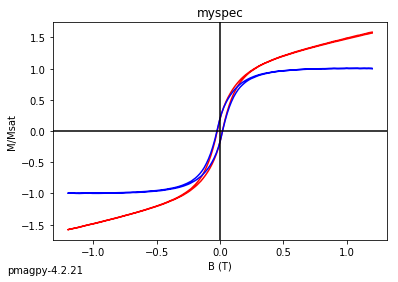

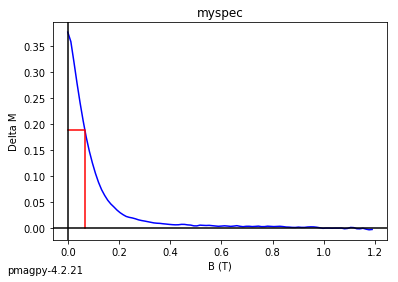

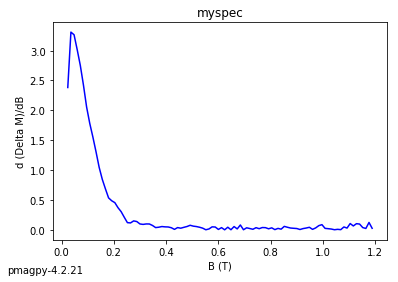

In [42]:
# read in the measurements data
meas_data=pd.read_csv('data_files/convert_2_magic/agm_magic/agm.magic',sep='\t',header=1)
# pick out the hysteresis data using the method code for hysteresis lab protocol
hyst_data=meas_data[meas_data.method_codes.str.contains('LP-HYS')]

# make the dictionary for figures that pmagplotlib likes

# make a list of specimens
specimens=hyst_data.specimen.unique()
cnt=1
for specimen in specimens:
    HDD={'hyst':cnt,'deltaM':cnt+1,'DdeltaM':cnt+2}
    spec_data=hyst_data[hyst_data.specimen==specimen]
# make a list of the field data
    B=spec_data.meas_field_dc.tolist()
# make a list o the magnetizaiton data
    M=spec_data.magn_moment.tolist()
# call the plotting function
    hpars=pmagplotlib.plot_hdd(HDD,B,M,specimen)
    hpars['specimen']=specimen
# print out the hysteresis parameters
    print (specimen,': \n',hpars)
    cnt+=3

### bgc_magic 

[\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#bgc_magic.py)

Here we convert the Berkeley Geochronology Center's AutoCore format to MagIC use **convert.bgc()**. 



In [43]:
help(convert.bgc)

Help on function bgc in module pmagpy.convert_2_magic:

bgc(mag_file, dir_path='.', input_dir_path='', meas_file='measurements.txt', spec_file='specimens.txt', samp_file='samples.txt', site_file='sites.txt', loc_file='locations.txt', append=False, location='unknown', site='', samp_con='1', specnum=0, meth_code='LP-NO', volume=12, user='', timezone='US/Pacific', noave=False)
    Convert BGC format file to MagIC file(s)
    
    Parameters
    ----------
    mag_file : str
        input file name
    dir_path : str
        working directory, default "."
    input_dir_path : str
        input file directory IF different from dir_path, default ""
    meas_file : str
        output measurement file name, default "measurements.txt"
    spec_file : str
        output specimen file name, default "specimens.txt"
    samp_file: str
        output sample file name, default "samples.txt"
    site_file : str
        output site file name, default "sites.txt"
    loc_file : str
        output locati

In [44]:
dir_path='data_files/convert_2_magic/bgc_magic/'
convert.bgc('15HHA1-2A',dir_path=dir_path)

mag_file in bgc_magic /Users/nebula/Python/PmagPy/data_files/convert_2_magic/bgc_magic/15HHA1-2A
adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 21 records written to measurements file
-I- writing specimens records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/bgc_magic/specimens.txt
-I- 1 records written to specimens file
-I- writing samples records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/bgc_magic/samples.txt
-I- 1 records written to samples file
-I- writing sites records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/bgc_magic/sites.txt
-I- 1 records written to sites file
-I- writing locations records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/bgc_magic/locations.txt
-I- 1 records written to locations file
-I- writing measurements records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/bgc_magic/measurements.txt
-I- 21 records written to measurements fi

(True,
 '/Users/nebula/Python/PmagPy/data_files/convert_2_magic/bgc_magic/measurements.txt')

And let's take a look

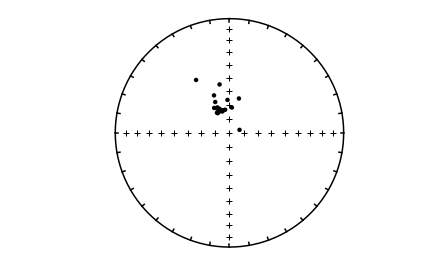

In [45]:
meas_df=pd.read_csv(dir_path+'measurements.txt',sep='\t',header=1)
ipmag.plot_net(1)
ipmag.plot_di(dec=meas_df['dir_dec'],inc=meas_df['dir_inc'])

### cit_magic

[\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#cit_magic.py)

To convert the CalTech format to MagIC, use **convert.cit()**. 

Craig Jones’ PaleoMag software package (http://cires.colorado.edu/people/jones.craig/PMag3.html) imports various file formats, including the ’CIT’ format developed for the Caltech lab and now used in magnetometer control software that ships with 2G magnetometers that utilized a vertical sample changer system. The documentation for the CIT sample format is here: http://cires.colorado.edu/people/jones.craig/PMag_Formats.html#SAM_format. Demagnetization data for each specimen are in their own file in a directory with all the data for a site or study. These files are strictly formatted with fields determined by the character number in the line. There must be a file with the suffix ‘.sam’ in the same directory as the specimen data files which gives details about the specimens and a list of the specimen measurementfiles in the directory. 

 The first line in the .sam file is a comment (in this case the site name), the second is the latitude and longitude followed by a declination correction. In these data, the declination correction was applied to the specimen orientations so the value of the declination correction is set to be 0.

For detailed description of the .sam and sample file formats, check the PaleoMag Formats website linked to above.


In [46]:
help(convert.cit)

Help on function cit in module pmagpy.convert_2_magic:

cit(dir_path='.', input_dir_path='', magfile='', user='', meas_file='measurements.txt', spec_file='specimens.txt', samp_file='samples.txt', site_file='sites.txt', loc_file='locations.txt', locname='unknown', sitename='', methods=['SO-MAG'], specnum=0, samp_con='3', norm='cc', oersted=False, noave=False, meas_n_orient='8', labfield=0, phi=0, theta=0)
    Converts CIT formated Magnetometer data into MagIC format for Analysis and contribution to the MagIC database
    
    Parameters
    -----------
    dir_path : directory to output files to (default : current directory)
    input_dir_path : directory to input files (only needed if different from dir_path!)
    magfile : magnetometer file (.sam) to convert to MagIC (required)
    user : colon delimited list of analysts (default : "")
    meas_file : measurement file name to output (default : measurements.txt)
    spec_file : specimen file name to output (default : specimens.txt)
   

Use the function **convert.cit()** to covert the CIT data files from Swanson-Hysell lab at Berkeley for the PI47 site in the data_files/convert_2_magic/cit_magic/PI47 directory. The site (PI47) was part of a data set published in Fairchild et al., (2016) (available in the MagIC database: (https://earthref.org/MagIC/11292/). The location name was “Slate Islands”, the naming convention was #2, the specimen name is specified with 1 character, we don’t wish to average replicate measurements  and they were collected by drilling and with a magnetic compass (”FS-FD",and "SO-MAG”). 

In [47]:
dir_path='data_files/convert_2_magic/cit_magic/PI47/'
convert.cit(dir_path=dir_path,
           magfile='PI47-.sam',locname="Slate Islands",specnum=1,samp_con='2',
           methods=['FS-FD','SO-MAG'],noave=True)

PI47-

adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 266 records written to measurements file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/cit_magic/PI47/specimens.txt
-I- 9 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/cit_magic/PI47/samples.txt
-I- 9 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/cit_magic/PI47/sites.txt
-I- 1 records written to sites file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/cit_magic/PI47/locations.txt
-I- 1 records written to locations file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/cit_magic/PI47/measurements.txt
-I- 266 records written to measurements file


(True, 'measurements.txt')

We can make some Zijderveld diagrams (see [zeq_magic](#zeq_magic)). 

(True, [])

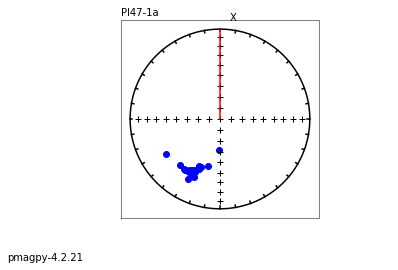

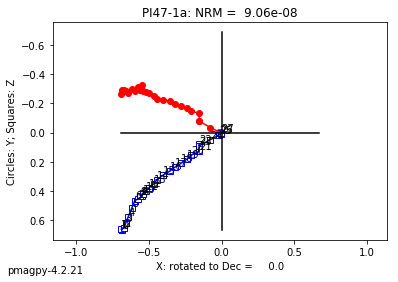

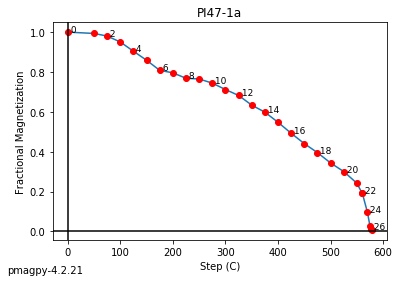

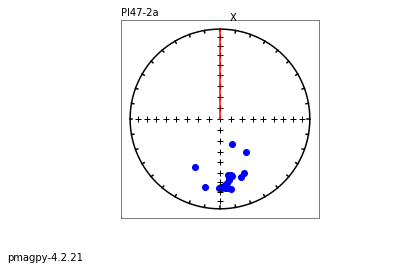

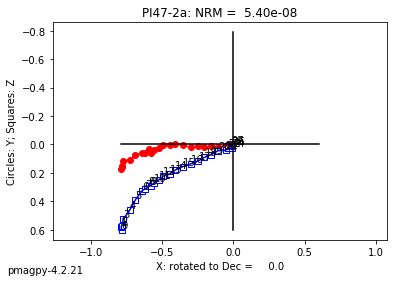

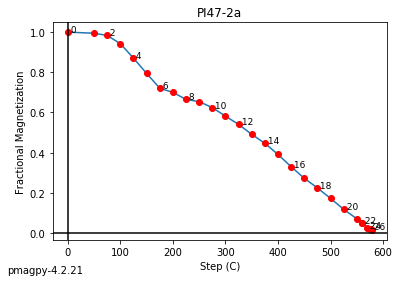

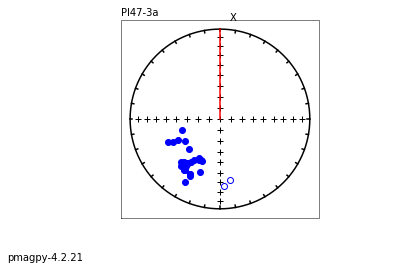

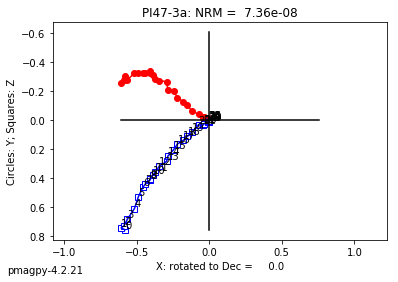

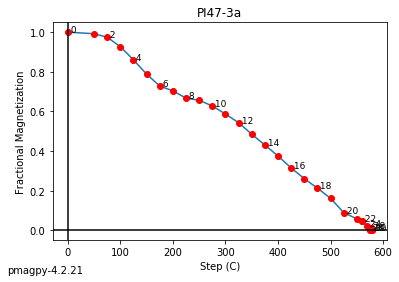

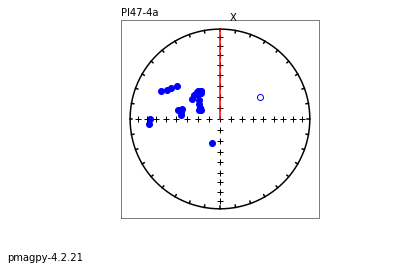

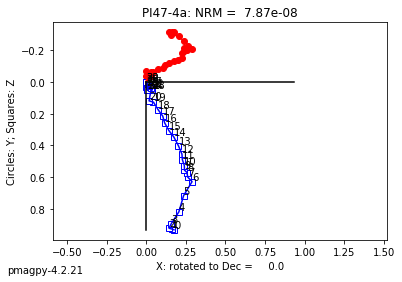

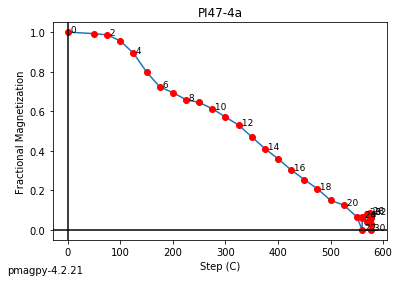

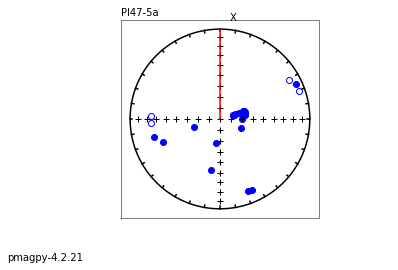

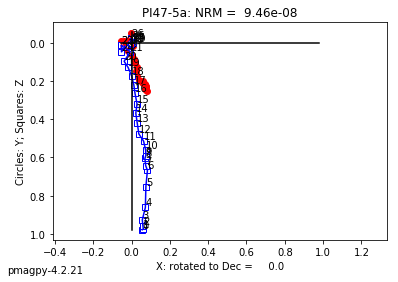

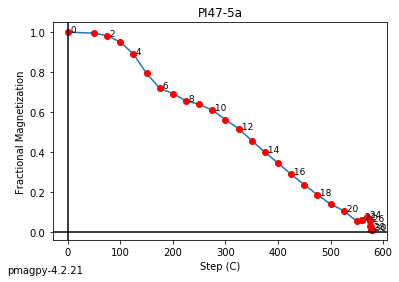

In [48]:
ipmag.zeq_magic(input_dir_path=dir_path, save_plots=False)

Use the function convert.cit() to covert the CIT data files from the USGS lab at Menlo Park. The data file is in the data_files/convert_2_magic/cit_magic/USGS/bl9-1 directory, the file name is bl9-1.sam, and the analyst was Hagstrum. The location name was “Boring volcanic field”, and this site name was set by Hagstrum to BL9001 because the site name cannot be determined from the sample name with the current available options. The samples were collected by drilling and with a magnetic compass and sun compass (”FS-FD",and "SO-MAG”), the measurement are in Oersted instead of the standard milliTesla, and we don’t wish to average replicate measurements.

In [49]:
dir_path='data_files/convert_2_magic/cit_magic/USGS/bl9-1'
convert.cit(dir_path=dir_path,
           magfile='bl9-1.sam',user='Hagstrum',locname="Boring volcanic field",
           sitename='BL9001',methods=['FS-FD','SO-SM','LT-AF-Z'], oersted=True,
           noave=True)

Boring Lava collection 2009

adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 63 records written to measurements file
-I- writing specimens records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/cit_magic/USGS/bl9-1/specimens.txt
-I- 9 records written to specimens file
-I- writing samples records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/cit_magic/USGS/bl9-1/samples.txt
-I- 9 records written to samples file
-I- writing sites records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/cit_magic/USGS/bl9-1/sites.txt
-I- 1 records written to sites file
-I- writing locations records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/cit_magic/USGS/bl9-1/locations.txt
-I- 1 records written to locations file
-I- writing measurements records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/cit_magic/USGS/bl9-1/measurements.txt
-I- 63 records written to measurements file


(True, 'measurements.txt')

We can look at the Zijderveld, etc.  Diagrams with [zeq_magic](#zeq_magic).

(True, [])

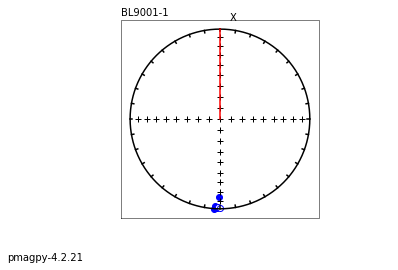

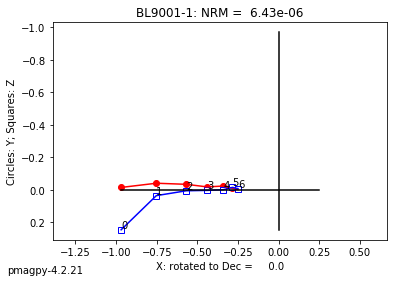

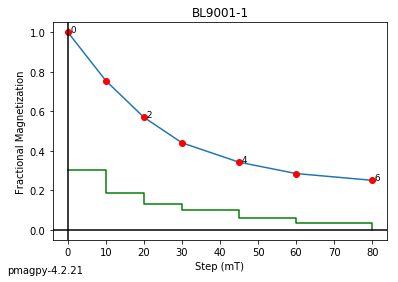

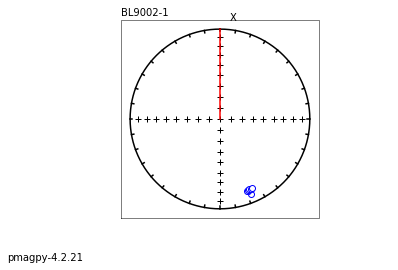

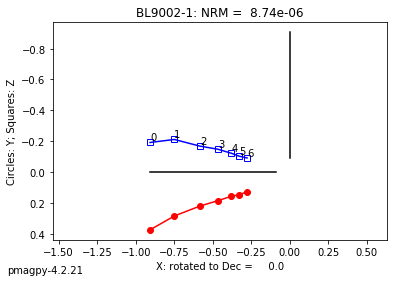

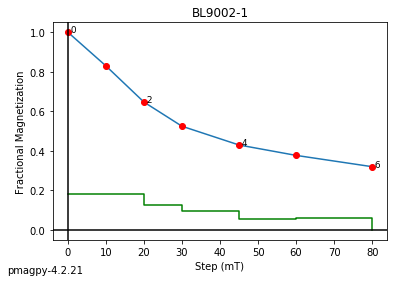

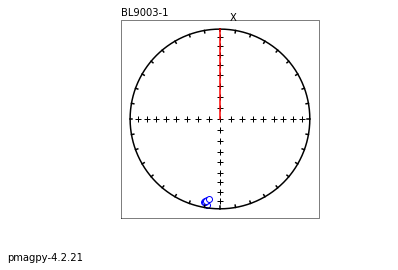

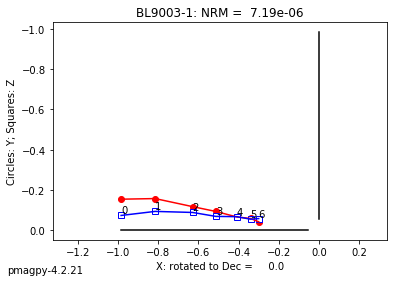

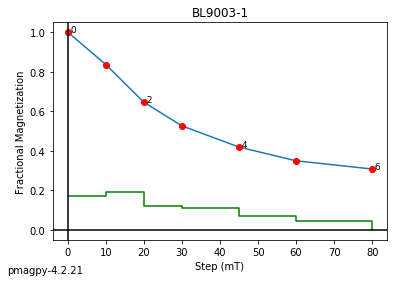

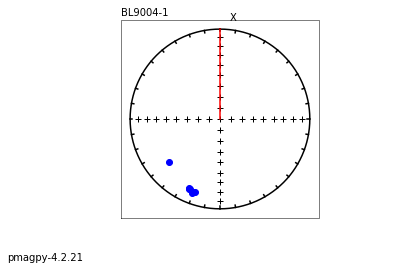

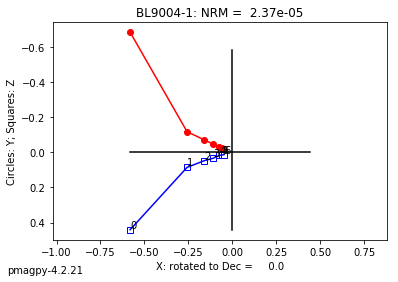

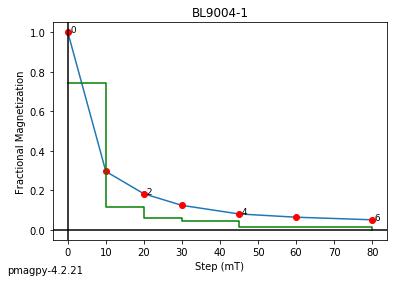

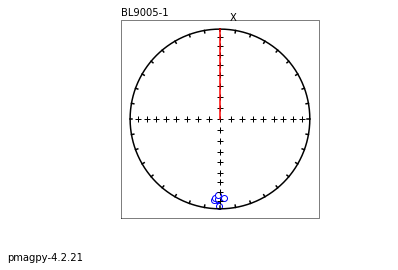

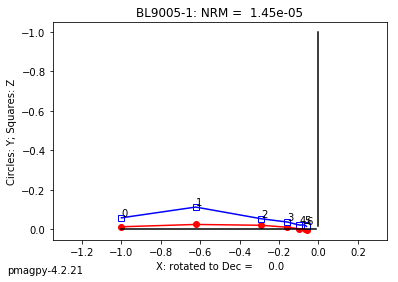

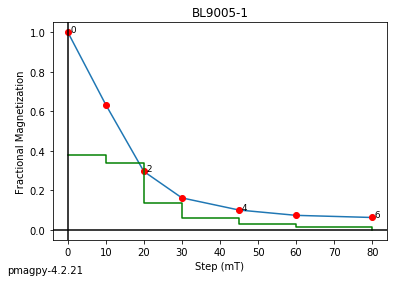

In [50]:
ipmag.zeq_magic(input_dir_path=dir_path, save_plots=False)

Use the function convert.cit() to convert the CIT data files from Ben Wiess's lab at MIT. This data was part of a set published in ESPL. "A nonmagnetic differentiated early planetary body", 
doi:10.1016/j.epsl.2017.03.026 The data can be found in MagIC at https://earthref.org/MagIC/11943

The data file is in the data_files/convert_2_magic/cit_magic/MIT/7325B directory, the file name is 7325B.sam, and the analyst was Wiess. The location name was “NWA 7325” with the site name coming from the sample name with the "1" convention. The samples are described with the method codes DE-VM, LP-DIR-T, LT-AF-Z, LT-NO, LT-T-Z, and SO-CMD-NORTH (see https://www2.earthref.org/MagIC/method-codes for full descriptions). We also don’t wish to average replicate measurements.

In [51]:
convert.cit(dir_path='data_files/convert_2_magic/cit_magic/MIT/7325B',
           magfile='7325B.sam',user='Wiess',locname="NWA 7325",samp_con='1',
           methods=['DE-VM', 'LP-DIR-T', 'LT-AF-Z', 'LT-NO', 'LT-T-Z', 'SO-CMD-NORTH'],
           noave=True)

NWA 7325 sample B7

adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 309 records written to measurements file
-I- writing specimens records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/cit_magic/MIT/7325B/specimens.txt
-I- 9 records written to specimens file
-I- writing samples records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/cit_magic/MIT/7325B/samples.txt
-I- 9 records written to samples file
-I- writing sites records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/cit_magic/MIT/7325B/sites.txt
-I- 1 records written to sites file
-I- writing locations records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/cit_magic/MIT/7325B/locations.txt
-I- 1 records written to locations file
-I- writing measurements records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/cit_magic/MIT/7325B/measurements.txt
-I- 309 records written to measurements file


(True, 'measurements.txt')

And take a look see:

(True, [])

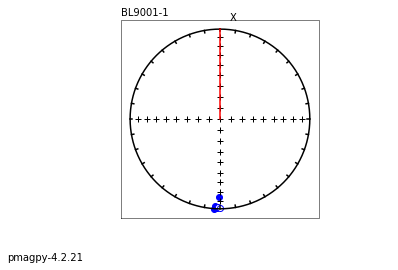

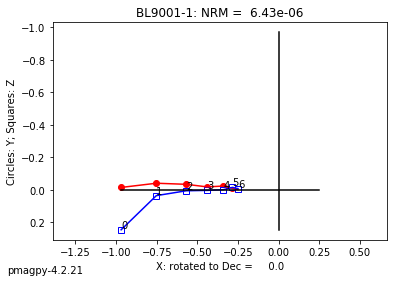

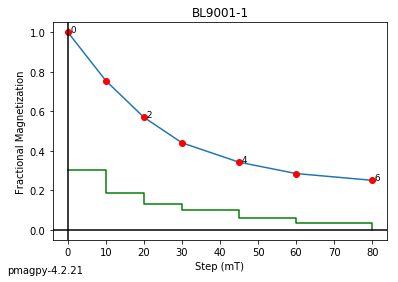

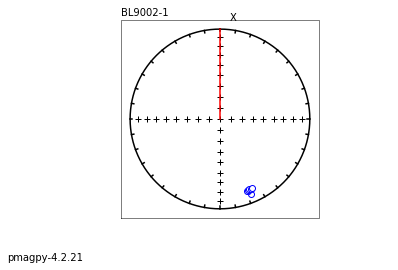

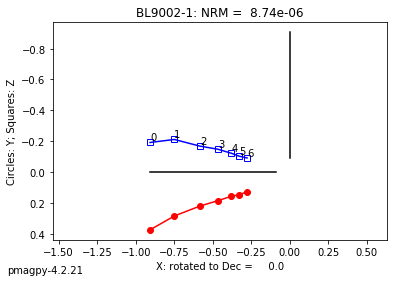

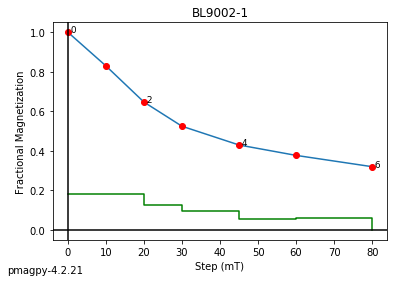

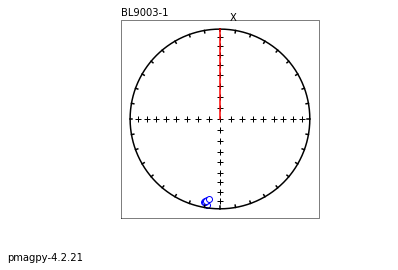

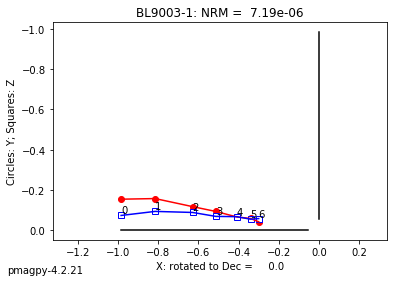

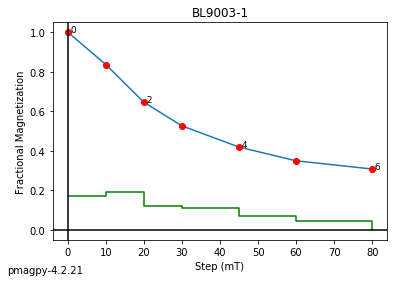

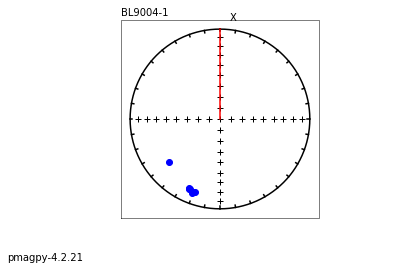

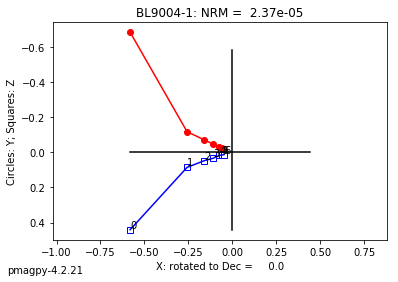

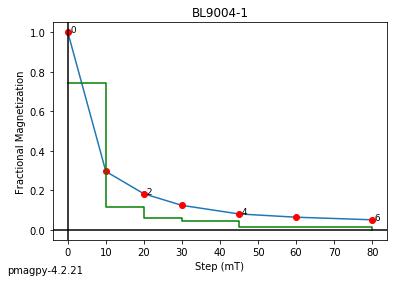

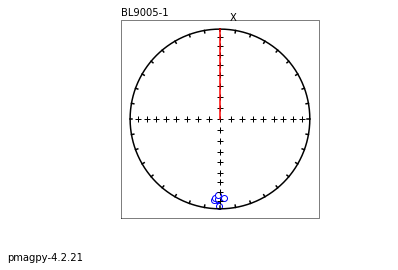

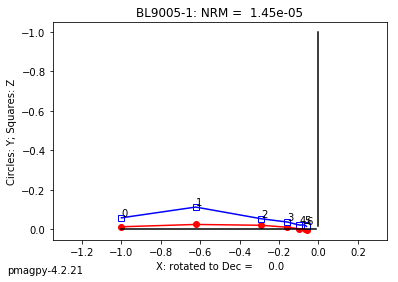

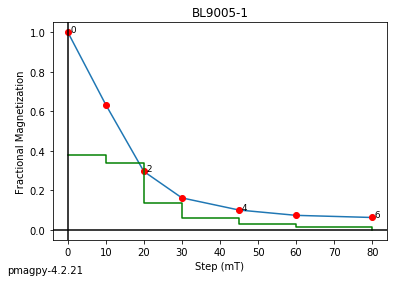

In [52]:
ipmag.zeq_magic(input_dir_path=dir_path, save_plots=False)

### generic_magic 

[\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#generic_magic.py)

If you have a data file format that is not supported, you can relabel column headers to fit the generic format as in the generic_magic example data file. 

To import the generic file format, use **convert.generic()**.


In [53]:
help(convert.generic)

Help on function generic in module pmagpy.convert_2_magic:

generic(magfile='', dir_path='.', meas_file='measurements.txt', spec_file='specimens.txt', samp_file='samples.txt', site_file='sites.txt', loc_file='locations.txt', user='', labfield=0, labfield_phi=0, labfield_theta=0, experiment='', cooling_times_list=[], sample_nc=[1, 0], site_nc=[1, 0], location='unknown', lat='', lon='', noave=False, input_dir_path='')
    Convert generic file to MagIC file(s)
    
    Parameters
    ----------
    mag_file : str
        input file name
    dir_path : str
        output directory, default "."
    meas_file : str
        output measurement file name, default "measurements.txt"
    spec_file : str
        output specimen file name, default "specimens.txt"
    samp_file: str
        output sample file name, default "samples.txt"
    site_file : str
        output site file name, default "sites.txt"
    loc_file : str
        output location file name, default "locations.txt"
    user : str
 

In [54]:
convert.generic(magfile='data_files/convert_2_magic/generic_magic/generic_magic_example.txt',
                experiment='PI',dir_path='data_files/convert_2_magic/generic_magic')

adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 23 records written to measurements file
-I- writing specimens records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/generic_magic/specimens.txt
-I- 2 records written to specimens file
-I- writing samples records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/generic_magic/samples.txt
-I- 2 records written to samples file
-I- writing sites records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/generic_magic/sites.txt
-I- 2 records written to sites file
-I- writing locations records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/generic_magic/locations.txt
-I- 1 records written to locations file
-I- writing measurements records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/generic_magic/measurements.txt
-I- 23 records written to measurements file


(True, 'measurements.txt')

(True, [])

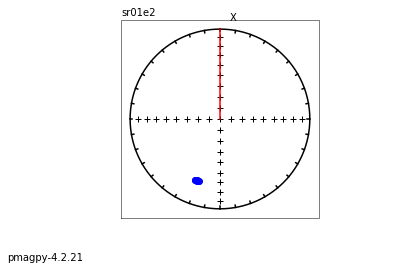

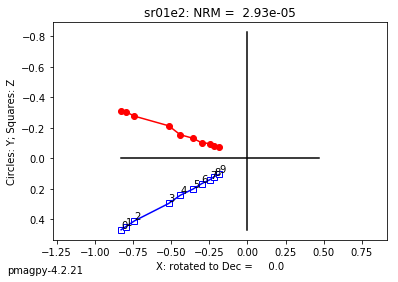

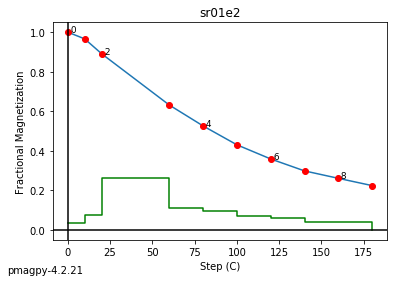

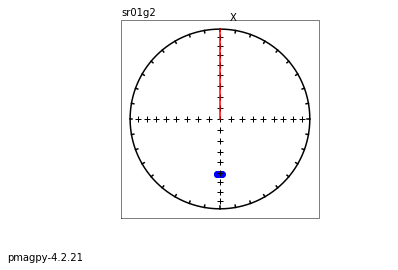

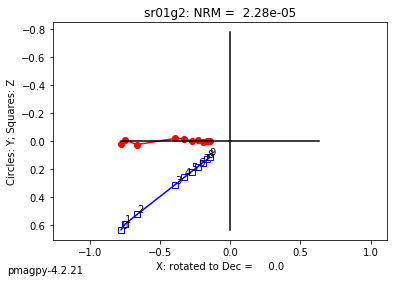

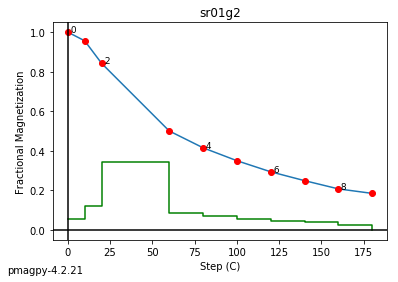

In [55]:
# let's take a look
dir_path='data_files/convert_2_magic/generic_magic/'
ipmag.zeq_magic(input_dir_path=dir_path, save_plots=False)

### huji_magic 

[\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#huji_magic.py)

To import the Hebrew University, Jerusalem, Israel file format to MagIC, use **convert.huji()**.   

In [56]:
help(convert.huji)

Help on function huji in module pmagpy.convert_2_magic:

huji(magfile='', dir_path='.', input_dir_path='', datafile='', codelist='', meas_file='measurements.txt', spec_file='specimens.txt', samp_file='samples.txt', site_file='sites.txt', loc_file='locations.txt', user='', specnum=0, samp_con='1', labfield=0, phi=0, theta=0, location='', CR_cooling_times=None, noave=False)
    Convert HUJI format file to MagIC file(s)
    
    Parameters
    ----------
    magfile : str
       input file name
    dir_path : str
        working directory, default "."
    input_dir_path : str
        input file directory IF different from dir_path, default ""
    datafile : str
       HUJI datafile with sample orientations, default ""
    codelist : str
        colon-delimited protocols, include all that apply
        see info below
    meas_file : str
        output measurement file name, default "measurements.txt"
    spec_file : str
        output specimen file name, default "specimens.txt"
    samp_fi

In [57]:
dir_path='data_files/convert_2_magic/huji_magic/'
convert.huji(dir_path=dir_path,
             magfile='Massada_AF_HUJI_new_format.txt',codelist='T')

-W- Identical treatments in file Massada_AF_HUJI_new_format.txt magfile line 818: specimen M5-119E, treatment 0 ignoring the first. 
-I- done reading file Massada_AF_HUJI_new_format.txt
adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 616 records written to measurements file
-I- writing specimens records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/huji_magic/specimens.txt
-I- 56 records written to specimens file
-I- writing samples records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/huji_magic/samples.txt
-I- 56 records written to samples file
-I- writing sites records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/huji_magic/sites.txt
-I- 29 records written to sites file
-I- writing locations records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/huji_magic/locations.txt
-I- 1 records written to locations file
-I- writing measurements records to /Users/nebula/Python/PmagP

(True, 'measurements.txt')

(True, [])

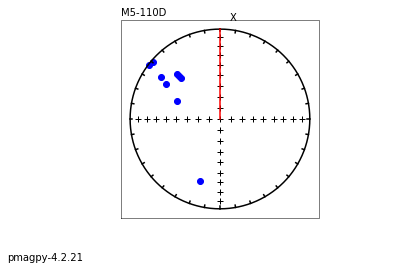

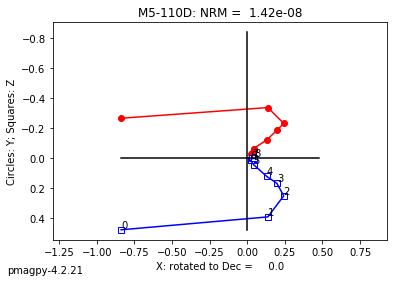

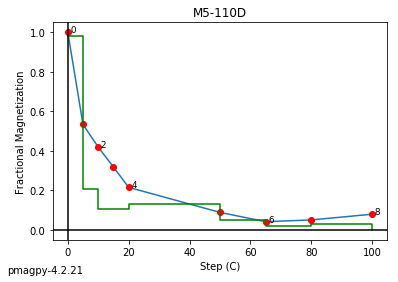

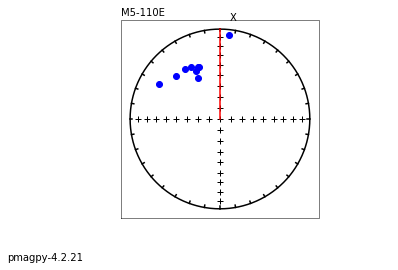

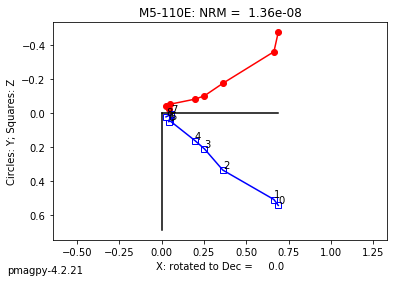

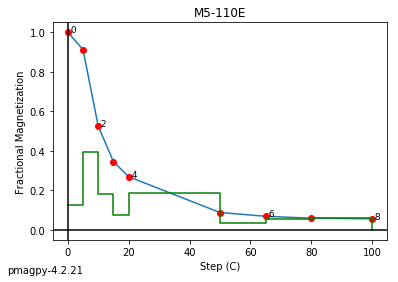

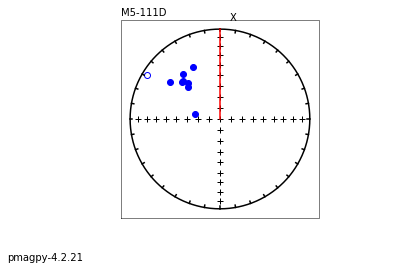

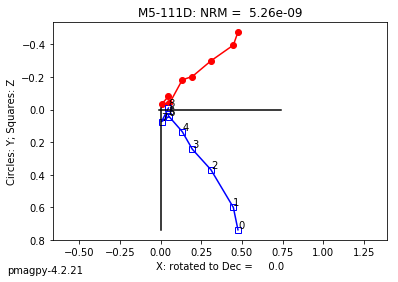

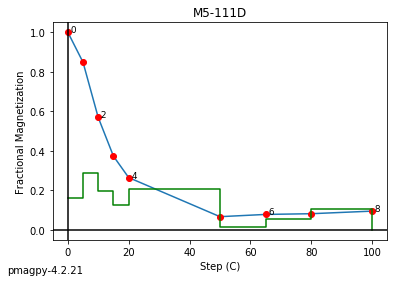

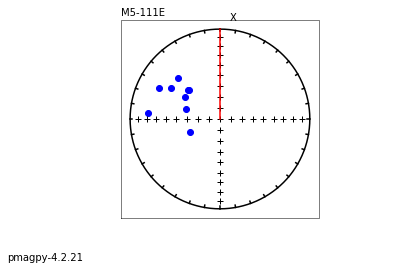

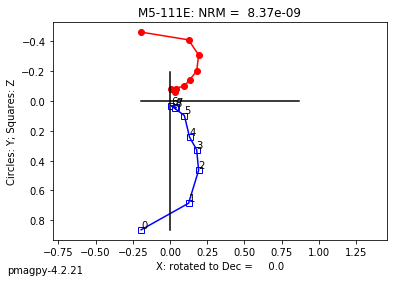

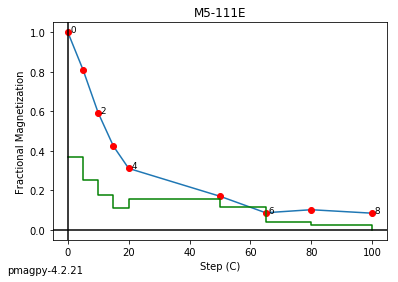

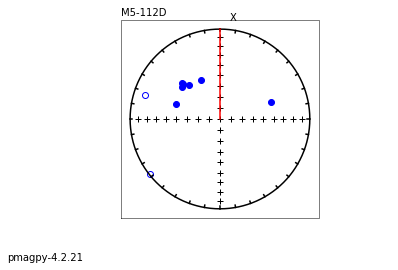

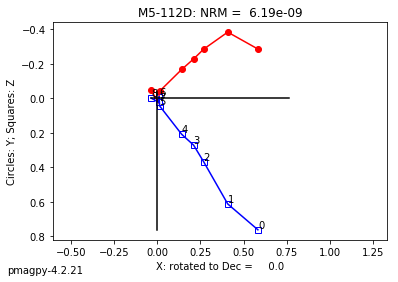

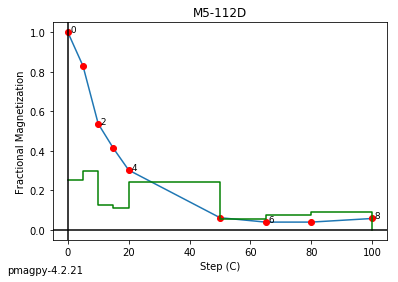

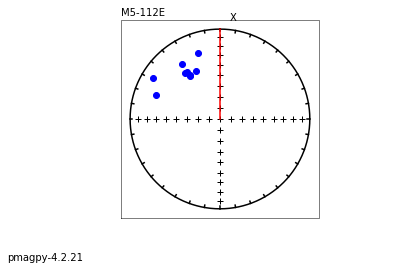

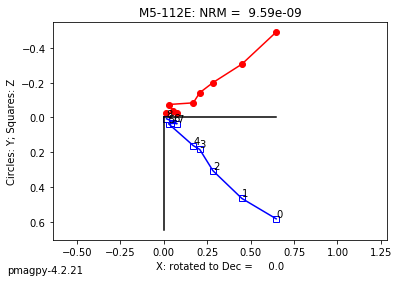

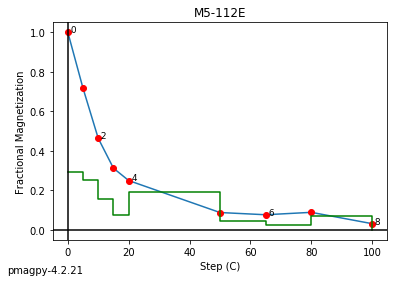

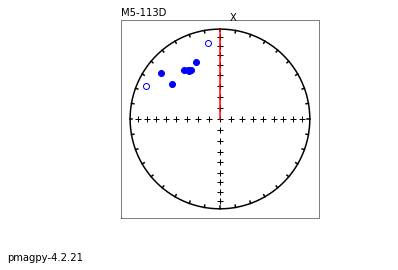

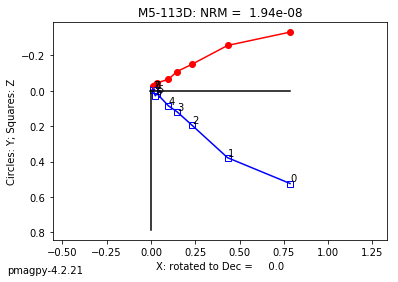

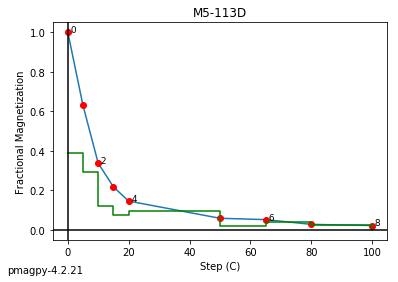

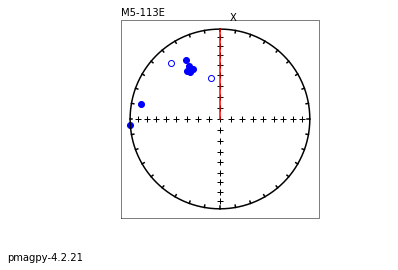

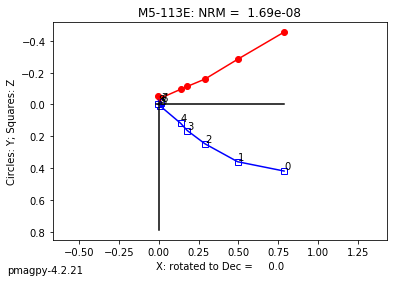

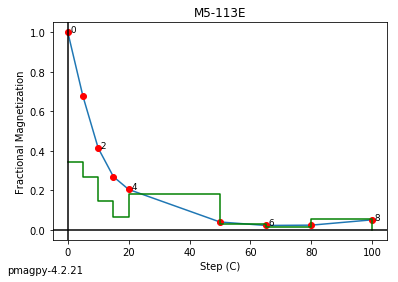

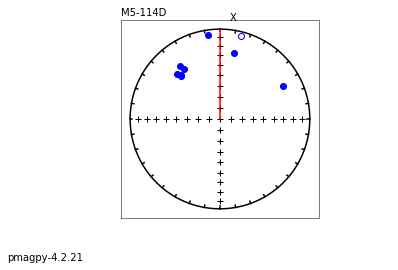

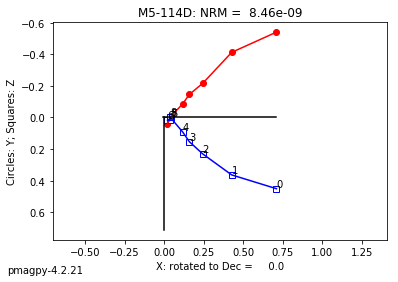

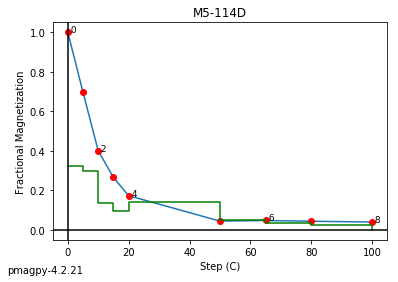

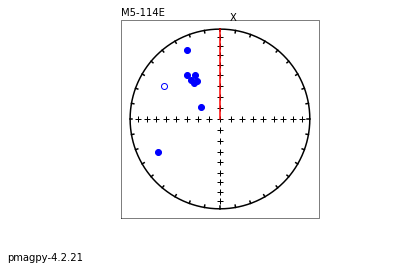

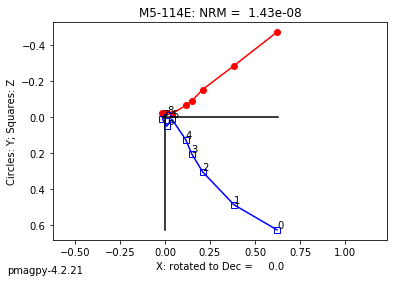

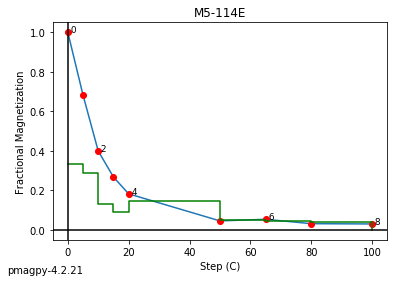

In [58]:
ipmag.zeq_magic(input_dir_path=dir_path, save_plots=False, n_plots=10)

### huji_sample_magic


[\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#huji_sample_magic.py)

To convert a Hebrew University Jersalem, Israel sample format to MagIC, use **convert.huji_sample()**.  

In [59]:
help(convert.huji_sample)

Help on function huji_sample in module pmagpy.convert_2_magic:

huji_sample(orient_file, meths='FS-FD:SO-POM:SO-SUN', location_name='unknown', samp_con='1', ignore_dip=True, data_model_num=3, samp_file='samples.txt', site_file='sites.txt', dir_path='.', input_dir_path='')
    Convert HUJI sample file to MagIC file(s)
    
    Parameters
    ----------
    orient_file : str
        input file name
    meths : str
       colon-delimited sampling methods, default FS-FD:SO-POM:SO-SUN
       for more options, see info below
    location : str
        location name, default "unknown"
    samp_con : str
        sample/site naming convention, default '1', see info below
    ignore_dip : bool
        set sample az/dip to 0, default True
    data_model_num : int
        MagIC data model 2 or 3, default 3
    samp_file : str
        sample file name to output (default : samples.txt)
    site_file : str
        site file name to output (default : site.txt)
    dir_path : str
        output directo

In [60]:
convert.huji_sample('magdelkrum_datafile.txt',
                   dir_path='data_files/convert_2_magic/huji_magic/')

-I- reading in: /Users/nebula/Python/PmagPy/data_files/convert_2_magic/huji_magic/magdelkrum_datafile.txt
57  records written to file  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/huji_magic/samples.txt
57  records written to file  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/huji_magic/sites.txt
Sample info saved in  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/huji_magic/samples.txt
Site info saved in  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/huji_magic/sites.txt


(True,
 '/Users/nebula/Python/PmagPy/data_files/convert_2_magic/huji_magic/samples.txt')

In [61]:
help(ipmag.combine_magic)

Help on function combine_magic in module pmagpy.ipmag:

combine_magic(filenames, outfile, data_model=3, magic_table='measurements', output_dir_path='.', input_dir_path='')
    Takes a list of magic-formatted files, concatenates them, and creates a
    single file. Returns output filename if the operation was successful.
    
    Parameters
    -----------
    filenames : list of MagIC formatted files
    outfile : name of output file
    data_model : data model number (2.5 or 3), default 3
    magic_table : name of magic table, default 'measurements'
    
    Returns
    ----------
    outfile name if success, False if failure



### jr6_jr6_magic

[\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#jr6_jr6_magic.py)

The AGICO JR6 spinner magnetometer has two output formats, the .jr6 and the .txt.  Here we illustrate the conversion of the .jr6 format.  There are data from two different studies in the example folder.  One (from Anita di Chiara) has the suffix '.JR6' and the other (from Roi Granot) are lower case (.jr6'). Each file has the data from a single specimen's experiment.  So, we can convert Anita's data to a series of MagIC formatted measurement files, combine them with [ipmag.combine_magic](#ipmag.combine_magic) and look at them with Demag GUI (on the command line) or [zeq_magic](#zeq_magic) within the notebook. 


In [62]:
help(convert.jr6_jr6)

Help on function jr6_jr6 in module pmagpy.convert_2_magic:

jr6_jr6(mag_file, dir_path='.', input_dir_path='', meas_file='measurements.txt', spec_file='specimens.txt', samp_file='samples.txt', site_file='sites.txt', loc_file='locations.txt', specnum=1, samp_con='1', location='unknown', lat='', lon='', noave=False, meth_code='LP-NO', volume=12, JR=False, user='')
    Convert JR6 .jr6 files to MagIC file(s)
    
    Parameters
    ----------
    mag_file : str
        input file name
    dir_path : str
        working directory, default "."
    input_dir_path : str
        input file directory IF different from dir_path, default ""
    meas_file : str
        output measurement file name, default "measurements.txt"
    spec_file : str
        output specimen file name, default "specimens.txt"
    samp_file: str
        output sample file name, default "samples.txt"
    site_file : str
        output site file name, default "sites.txt"
    loc_file : str
        output location file name,


Let's start with Anita's files

In [63]:
dir_path='data_files/convert_2_magic/jr6_magic/'
files=os.listdir(dir_path)
meas_files,spec_files,samp_files,site_files=[],[],[],[]
for file in files:
    if '.JR6' in file:
        print (file)
        stem=file.split('.')[0]
        meas_file=stem+'_measurements.txt' # make a unique measurements file
        spec_file=stem+'_specimens.txt'
        samp_file=stem+'_samples.txt'
        site_file=stem+'_sites.txt'
        convert.jr6_jr6(file,dir_path=dir_path,
                        meas_file=meas_file,spec_file=spec_file,samp_file=samp_file,
                        site_file=site_file,user='Anita')
        meas_files.append(dir_path+meas_file) # save the file name to a list
        spec_files.append(dir_path+spec_file)
        samp_files.append(dir_path+samp_file)
        site_files.append(dir_path+site_file)

# combine the files
ipmag.combine_magic(meas_files,dir_path+'measurements.txt')
ipmag.combine_magic(spec_files,dir_path+'specimens.txt',magic_table='specimens')
ipmag.combine_magic(samp_files,dir_path+'samples.txt',magic_table='samples')
ipmag.combine_magic(site_files,dir_path+'sites.txt',magic_table='sites')


SML02.JR6
adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 104 records written to measurements file
-I- writing specimens records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/jr6_magic/SML02_specimens.txt
-I- 15 records written to specimens file
-I- writing samples records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/jr6_magic/SML02_samples.txt
-I- 2 records written to samples file
-I- writing sites records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/jr6_magic/SML02_sites.txt
-I- 1 records written to sites file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/jr6_magic/locations.txt
-I- 1 records written to locations file
-I- writing measurements records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/jr6_magic/SML02_measurements.txt
-I- 104 records written to measurements file
SML03.JR6
adding measurement column to measurements table!
-I- overwriting

'/Users/nebula/Python/PmagPy/data_files/convert_2_magic/jr6_magic/sites.txt'

(True, [])

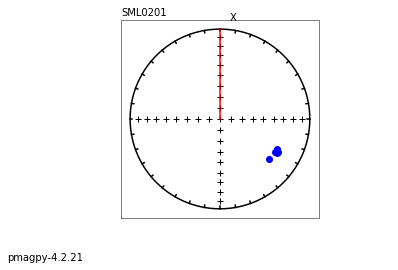

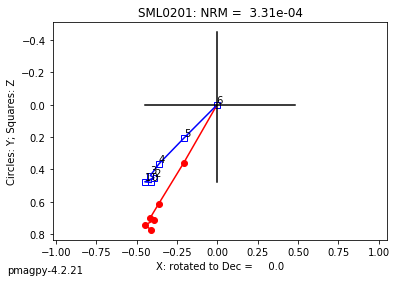

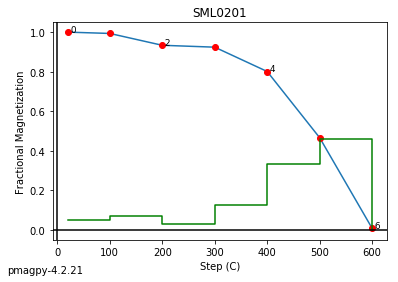

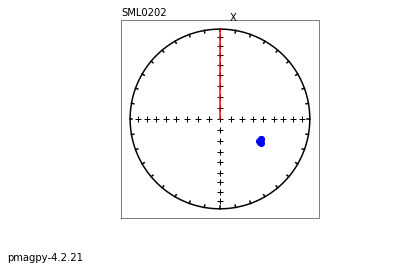

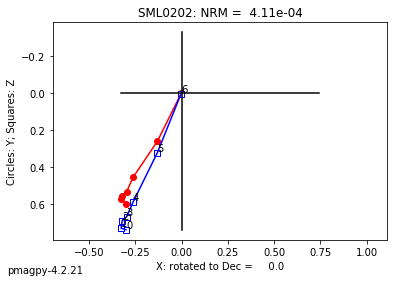

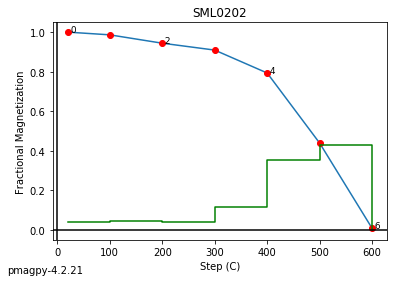

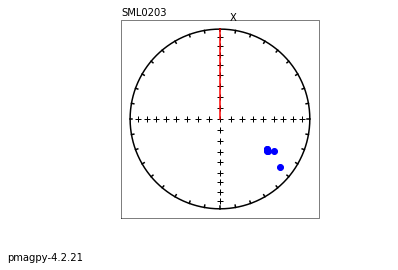

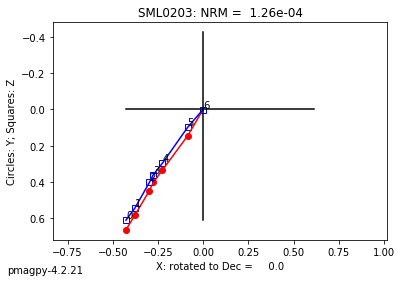

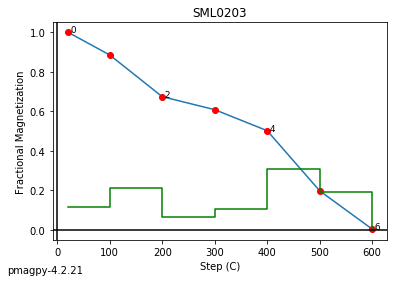

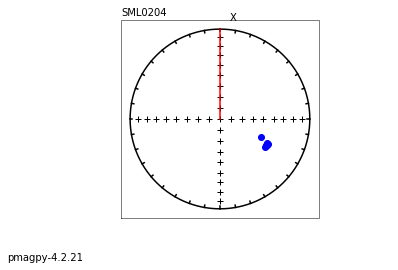

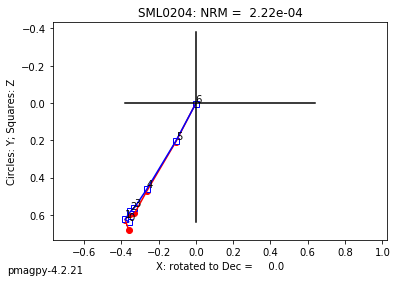

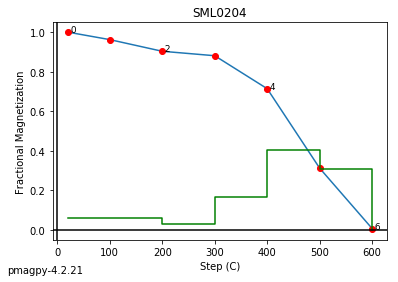

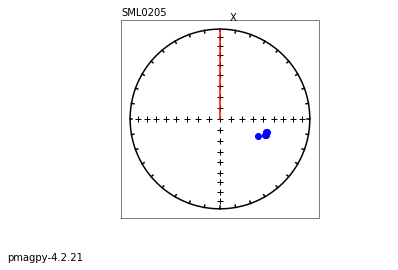

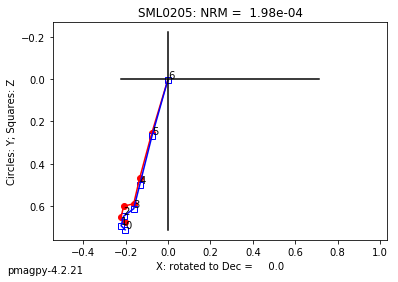

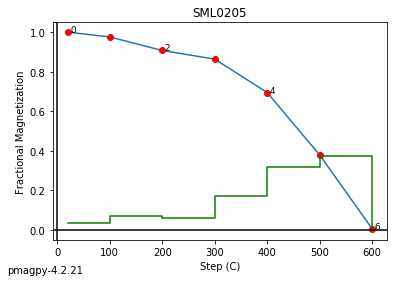

In [64]:
ipmag.zeq_magic(input_dir_path=dir_path, save_plots=False)

Now we can do Roi's files

In [65]:
dir_path='data_files/convert_2_magic/jr6_magic/'
files=os.listdir(dir_path)
meas_files,spec_files,samp_files,site_files=[],[],[],[]
for file in files:
    if file.endswith('.jr6'):
        stem=file.split('.')[0]
        meas_file=stem+'_measurements.txt' # make a unique measurements file
        spec_file=stem+'_specimens.txt'
        samp_file=stem+'_samples.txt'
        site_file=stem+'_sites.txt'
        convert.jr6_jr6(file,dir_path=dir_path,
                        meas_file=meas_file,spec_file=spec_file,samp_file=samp_file,
                        site_file=site_file,user='Roi')
        meas_files.append(dir_path+meas_file) # save the file name to a list
        spec_files.append(dir_path+spec_file)
        samp_files.append(dir_path+samp_file)
        site_files.append(dir_path+site_file)

# combine the files
ipmag.combine_magic(meas_files,dir_path+'measurements.txt')
ipmag.combine_magic(spec_files,dir_path+'specimens.txt',magic_table='specimens')
ipmag.combine_magic(samp_files,dir_path+'samples.txt',magic_table='samples')
ipmag.combine_magic(site_files,dir_path+'sites.txt',magic_table='sites')


adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 499 records written to measurements file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/jr6_magic/TRM_specimens.txt
-I- 42 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/jr6_magic/TRM_samples.txt
-I- 19 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/jr6_magic/TRM_sites.txt
-I- 10 records written to sites file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/jr6_magic/locations.txt
-I- 1 records written to locations file
-I- writing measurements records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/jr6_magic/TRM_measurements.txt
-I- 499 records written to measurements file
measurement type unknown -01A
adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements

'/Users/nebula/Python/PmagPy/data_files/convert_2_magic/jr6_magic/sites.txt'

(True, [])

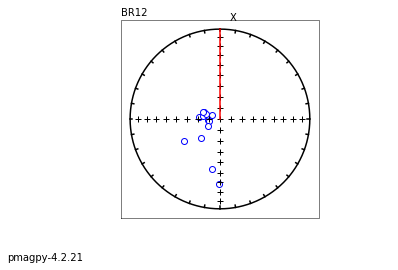

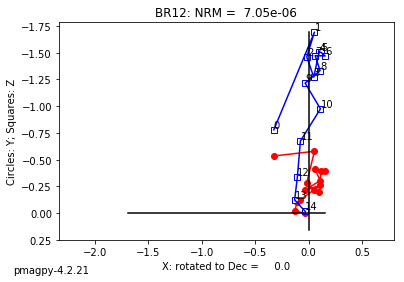

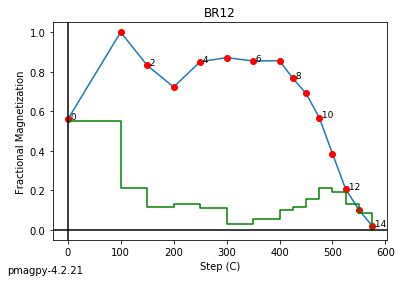

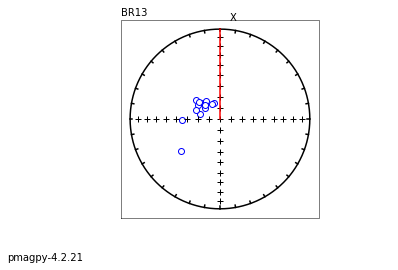

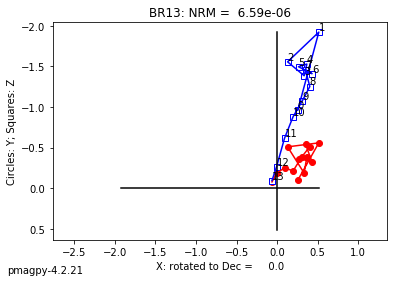

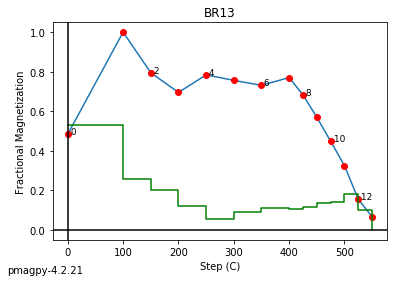

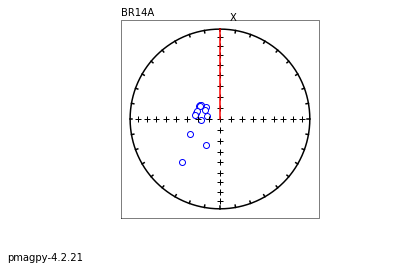

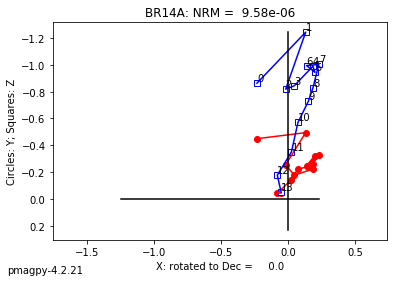

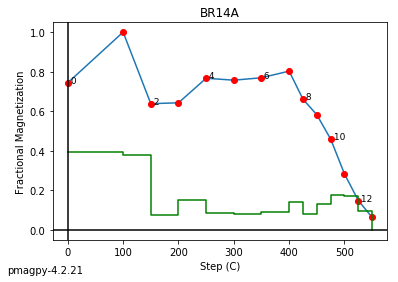

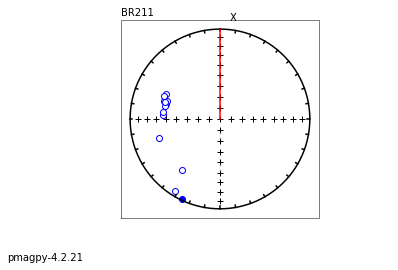

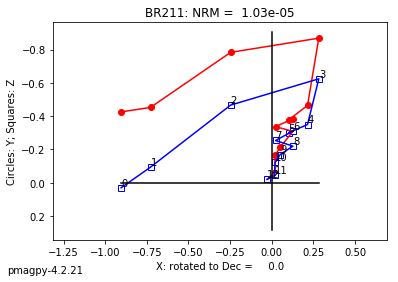

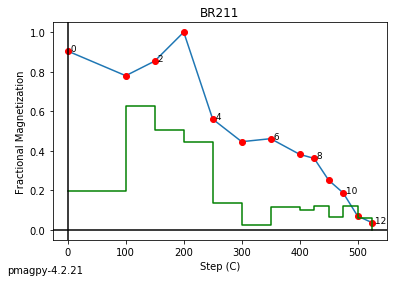

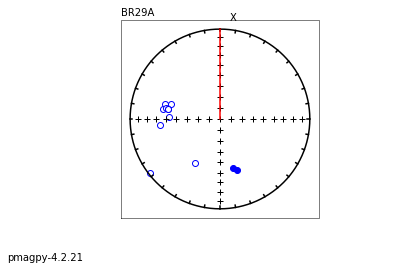

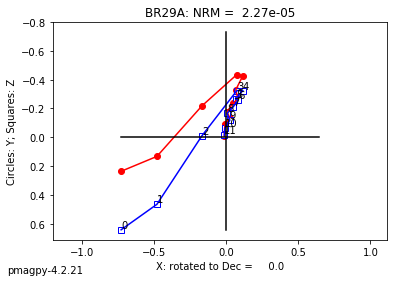

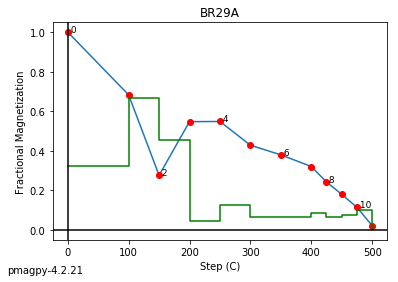

In [66]:
ipmag.zeq_magic(input_dir_path=dir_path, save_plots=False)

### jr6_txt_magic

[\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#jr6_txt_magic.py)

We can repeat the exercise for the JR6 .txt format using **convert.jr6_txt()**.  

In [67]:
help(convert.jr6_txt)

Help on function jr6_txt in module pmagpy.convert_2_magic:

jr6_txt(mag_file, dir_path='.', input_dir_path='', meas_file='measurements.txt', spec_file='specimens.txt', samp_file='samples.txt', site_file='sites.txt', loc_file='locations.txt', user='', specnum=1, samp_con='1', location='unknown', lat='', lon='', noave=False, volume=12, timezone='UTC', meth_code='LP-NO')
    Converts JR6 .txt format files to MagIC measurements format files.
    
    Parameters
    ----------
    mag_file : str
        input file name
    dir_path : str
        working directory, default "."
    input_dir_path : str
        input file directory IF different from dir_path, default ""
    meas_file : str
        output measurement file name, default "measurements.txt"
    spec_file : str
        output specimen file name, default "specimens.txt"
    samp_file: str
        output sample file name, default "samples.txt"
    site_file : str
        output site file name, default "sites.txt"
    loc_file : str
 

There are only data from Roi Granot in this format. The measurement values should be identical to the **convert.jr6_jr6()** function on .jr6 files with the same stem. Additional columns will be found when converting the .JR6 format as that format contains more information than the .txt files.

In [68]:
dir_path='data_files/convert_2_magic/jr6_magic/'
files=['AF.txt','TRM.txt','AP12.txt']
meas_files,spec_files,samp_files,site_files=[],[],[],[]
for file in files:
        print (file)
        stem=file.split('.')[0]
        meas_file=stem+'_measurements.txt' # make a unique measurements file
        spec_file=stem+'_specimens.txt'
        samp_file=stem+'_samples.txt'
        site_file=stem+'_sites.txt'
        convert.jr6_txt(file,dir_path=dir_path,
                        meas_file=meas_file,spec_file=spec_file,samp_file=samp_file,
                        site_file=site_file,user='Roi')
        meas_files.append(dir_path+meas_file) # save the file name to a list
        spec_files.append(dir_path+spec_file)
        samp_files.append(dir_path+samp_file)
        site_files.append(dir_path+site_file)

# combine the files
ipmag.combine_magic(meas_files,dir_path+'measurements.txt')
ipmag.combine_magic(spec_files,dir_path+'specimens.txt',magic_table='specimens')
ipmag.combine_magic(samp_files,dir_path+'samples.txt',magic_table='samples')
ipmag.combine_magic(site_files,dir_path+'sites.txt',magic_table='sites')

AF.txt
-I- Using less strict decoding for /Users/nebula/Python/PmagPy/data_files/convert_2_magic/jr6_magic/AF.txt, output may have formatting errors
adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 655 records written to measurements file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/jr6_magic/AF_specimens.txt
-I- 57 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/jr6_magic/AF_samples.txt
-I- 17 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/jr6_magic/AF_sites.txt
-I- 10 records written to sites file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/jr6_magic/locations.txt
-I- 1 records written to locations file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/jr6_magic/AF_measurements.txt
-I- 655 records written to measurements file
TRM.txt
-I

'/Users/nebula/Python/PmagPy/data_files/convert_2_magic/jr6_magic/sites.txt'

No plots could be created for specimen: AP12-01A
No plots could be created for specimen: AP12-02A
No plots could be created for specimen: AP12-03A


(True, [])

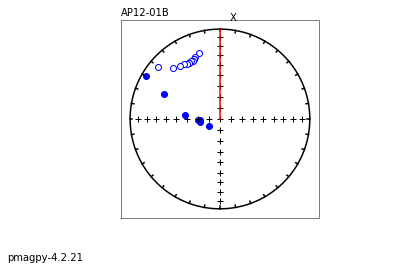

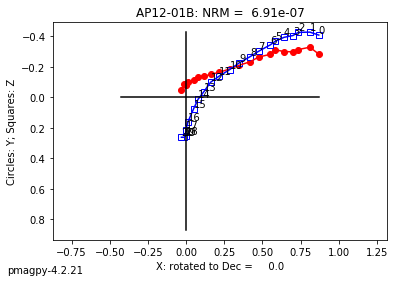

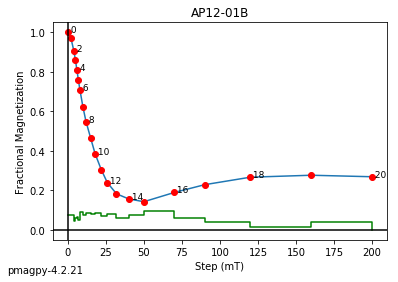

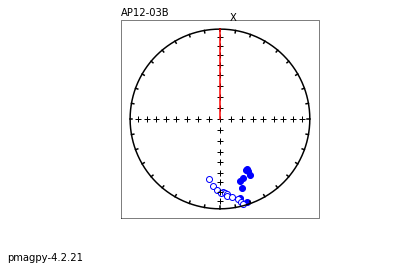

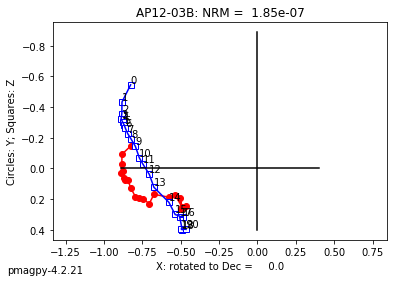

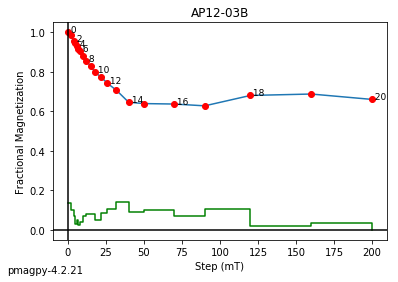

In [69]:
ipmag.zeq_magic(meas_file='AP12_measurements.txt',input_dir_path=dir_path, save_plots=False)

### k15_magic

[\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#k15_magic.py)

Someone took a set of samples from a dike margin in the Troodos Ophiolite and measured their anisotropy of magnetic susceptibility on an a Kappabridge KLY 2.0 instrument in the SIO laboratory.  An example of the  data file format is in k15_magic.  

The first line of each set of four has the specimen name, azimuth, plunge, and bedding strike and dip the next three lines are sets of five measurements in the 15 positions recommended by Jelinek (1977): 


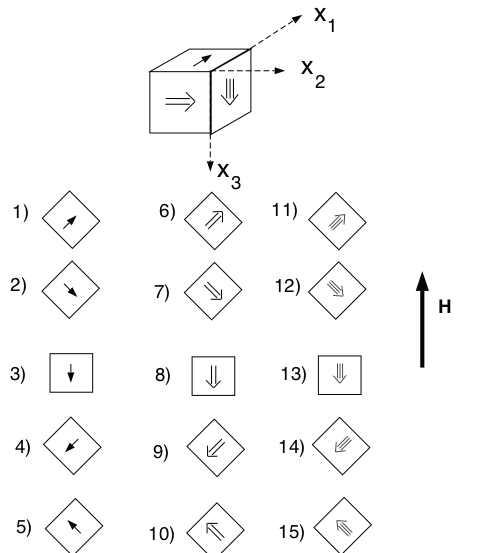

In [70]:
Image('data_files/Figures/meas15.png')

The 15 measurements for each specimen, along with orientation information and the specimen name were saved in the file data_files/k15_magic/k15_example.dat. 

To convert 15 measurement anisotropy of magnetic susceptibility file format to MagIC,   use **convert.k15()**. 

In [71]:
help(convert.k15)

Help on function k15 in module pmagpy.convert_2_magic:

k15(k15file, dir_path='.', input_dir_path='', meas_file='measurements.txt', aniso_outfile='specimens.txt', samp_file='samples.txt', result_file='rmag_anisotropy.txt', specnum=0, sample_naming_con='1', location='unknown', data_model_num=3)
    converts .k15 format data to MagIC  format.
    assumes Jelinek Kappabridge measurement scheme.
    
    Parameters
    ----------
    k15file : str
        input file name
    dir_path : str
        output file directory, default "."
    input_dir_path : str
        input file directory IF different from dir_path, default ""
    meas_file : str
        output measurement file name, default "measurements.txt"
    aniso_outfile : str
        output specimen file name, default "specimens.txt"
    samp_file: str
        output sample file name, default "samples.txt"
    aniso_results_file : str
        output result file name, default "rmag_results.txt", data model 2 only
    specnum : int
     

In [72]:
convert.k15('k15_example.dat',dir_path='data_files/convert_2_magic/k15_magic/',
            location='Troodos Ophiolite')

8  records written to file  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/k15_magic/samples.txt
48  records written to file  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/k15_magic/specimens.txt
120  records written to file  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/k15_magic/measurements.txt
Data saved to: /Users/nebula/Python/PmagPy/data_files/convert_2_magic/k15_magic/measurements.txt, /Users/nebula/Python/PmagPy/data_files/convert_2_magic/k15_magic/specimens.txt, /Users/nebula/Python/PmagPy/data_files/convert_2_magic/k15_magic/samples.txt


(True,
 '/Users/nebula/Python/PmagPy/data_files/convert_2_magic/k15_magic/measurements.txt')

In [73]:
ipmag.aniso_magic_nb(infile='specimens.txt',dir_path='data_files/convert_2_magic/k15_magic/') 

1  saved in  Troodos Ophiolite_s_aniso-data.png
2  saved in  Troodos Ophiolite_s_aniso-conf.png


(True,
 ['Troodos Ophiolite_s_aniso-data.png', 'Troodos Ophiolite_s_aniso-conf.png'])

### kly4s_magic

[\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#kly4s_magic.py)

 The program AMSSpin available for downloading from http://earthref.org/ERDA/940/ generates data for the Kappabridge KLY4S spinning magnetic susceptibility instrument as described by Gee et al. (2008).



Output files are in the format of the file KLY4S_magic_example.dat (found in the measurement_import/kly4s_magic folder). 

The columns in the example file are:

Specimen S_1 S_2 S_3 S_4 S_5 S_6 χb(μSI) date time user




To convert the Agico Kappabridge KLY4S files generated by the SIO labview program (written by Jeff Gee), use **convert.kly4s()**. 
This function will create the files needed by the MagIC database and the data can be plotted using [aniso_magic](#aniso_magic).   If you were to import the sample files from the LIMS data base for these samples, you could plot them versus depth, or as equal area projections using **ani_depthplot** and **aniso_magic** respectively. 


In [74]:
help(convert.kly4s)

Help on function kly4s in module pmagpy.convert_2_magic:

kly4s(infile, specnum=0, locname='unknown', inst='SIO-KLY4S', samp_con='1', or_con='3', user='', measfile='measurements.txt', aniso_outfile='rmag_anisotropy.txt', samp_infile='', spec_infile='', spec_outfile='specimens.txt', azdip_infile='', dir_path='.', input_dir_path='', data_model_num=3, samp_outfile='samples.txt', site_outfile='sites.txt')
     converts files generated by SIO kly4S labview program to MagIC formated
    
     Parameters
     ----------
     infile :  str
         input file name
     specnum : int
         number of characters to designate a specimen, default 0
     locname : str
         location name, default "unknown"
     samp_con : str
         sample/site naming convention, default '1', see info below
     or_con : number
         orientation convention, default '3', see info below
     user : str
         user name, default ""
     measfile : str
         output measurement file name, default "measure

In [75]:
convert.kly4s('KLY4S_magic_example.dat',
              dir_path='data_files/convert_2_magic/kly4s_magic/')

anisotropy data added to specimen records
52  records written to file  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/kly4s_magic/specimens.txt
specimen information written to new file: /Users/nebula/Python/PmagPy/data_files/convert_2_magic/kly4s_magic/specimens.txt
26  records written to file  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/kly4s_magic/measurements.txt
measurement data saved in  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/kly4s_magic/measurements.txt
26  records written to file  samples.txt
26  records written to file  sites.txt


(True,
 '/Users/nebula/Python/PmagPy/data_files/convert_2_magic/kly4s_magic/measurements.txt')

In [76]:
ipmag.aniso_magic_nb(infile='specimens.txt',dir_path='data_files/convert_2_magic/kly4s_magic/') 

1  saved in  unknown_s_aniso-data.png
2  saved in  unknown_s_aniso-conf.png


(True, ['unknown_s_aniso-data.png', 'unknown_s_aniso-conf.png'])

### ldeo_magic

[\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#ldeo_magic.py)

To convert Lamont-Doherty Earth Observatory data files to MagIC, use **convert.ldeo()**. 

NB:  this doesn't seem to work properly at all.  

In [77]:
help(convert.ldeo)

Help on function ldeo in module pmagpy.convert_2_magic:

ldeo(magfile, dir_path='.', input_dir_path='', meas_file='measurements.txt', spec_file='specimens.txt', samp_file='samples.txt', site_file='sites.txt', loc_file='locations.txt', specnum=0, samp_con='1', location='unknown', codelist='', coil='', arm_labfield=5e-05, trm_peakT=873.0, peakfield=0, labfield=0, phi=0, theta=0, mass_or_vol='v', noave=0)
    converts Lamont Doherty Earth Observatory measurement files to MagIC data base model 3.0
    
    Parameters
    _________
    magfile : input measurement file
    dir_path : output directory path, default "."
    input_dir_path : input file directory IF different from dir_path, default ""
    meas_file : output file measurement file name, default "measurements.txt"
    spec_file : output file specimen file name, default "specimens.txt"
    samp_file : output file sample file name, default "samples.txt"
    site_file : output file site file name, default "sites.txt"
    loc_file : ou

In [78]:
convert.ldeo('ldeo_magic_example.dat',codelist='AF',
             dir_path='data_files/convert_2_magic/ldeo_magic/')

adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 503 records written to measurements file
-I- writing specimens records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/ldeo_magic/specimens.txt
-I- 35 records written to specimens file
-I- writing samples records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/ldeo_magic/samples.txt
-I- 35 records written to samples file
-I- writing sites records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/ldeo_magic/sites.txt
-I- 35 records written to sites file
-I- writing locations records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/ldeo_magic/locations.txt
-I- 1 records written to locations file
-I- writing measurements records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/ldeo_magic/measurements.txt
-I- 503 records written to measurements file


(True,
 '/Users/nebula/Python/PmagPy/data_files/convert_2_magic/ldeo_magic/measurements.txt')

(True, [])

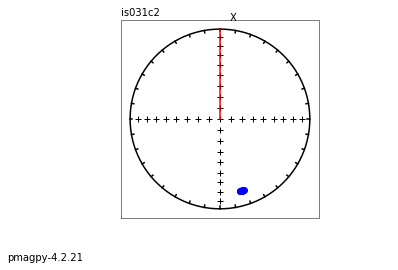

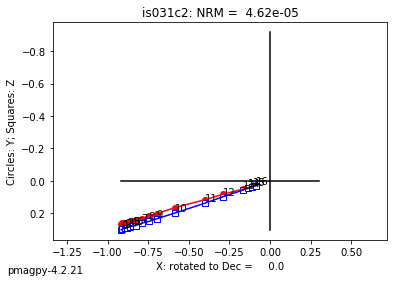

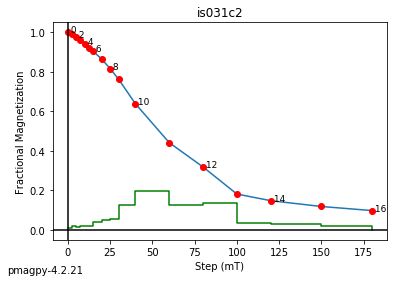

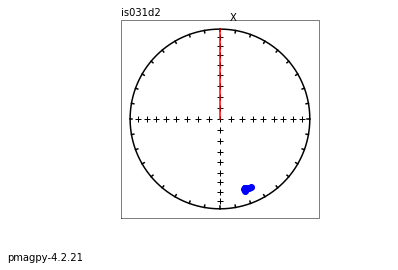

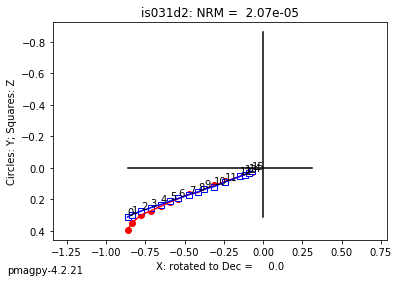

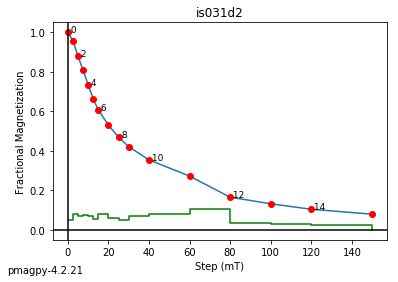

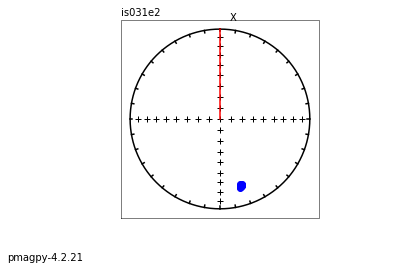

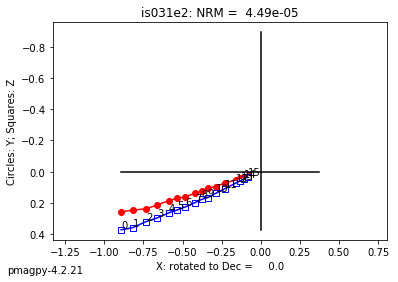

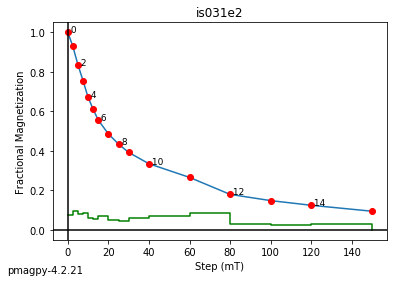

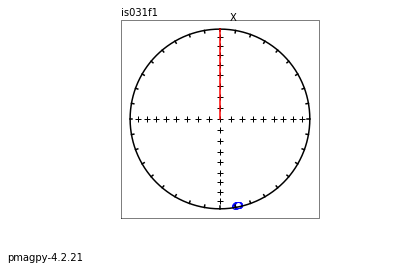

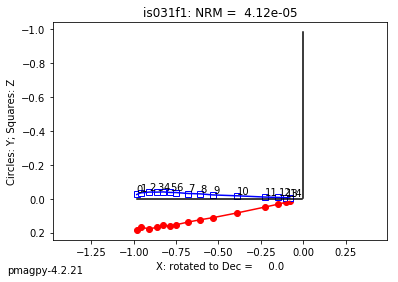

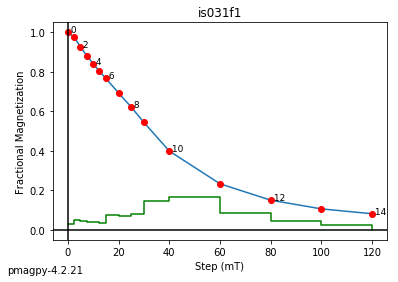

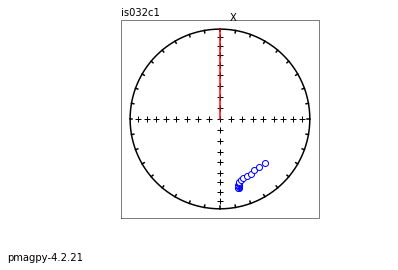

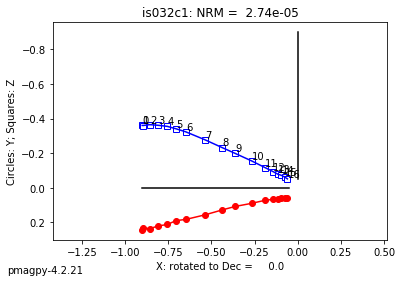

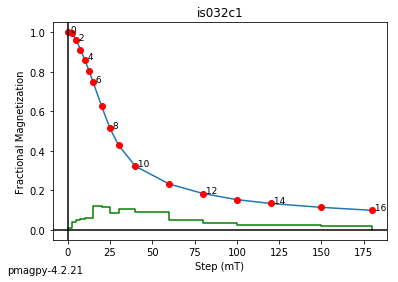

In [79]:
ipmag.zeq_magic(input_dir_path='data_files/convert_2_magic/ldeo_magic/', save_plots=False)

### livdb_magic 

[\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#livdb_magic.py)

To convert the Liverpool university database  format to MagIC use **convert.livdb()**.  

Here we have several experiment types as examples as examples.  



In [80]:
help(convert.livdb)

Help on function livdb in module pmagpy.convert_2_magic:

livdb(input_dir_path, output_dir_path='.', meas_out='measurements.txt', spec_out='specimens.txt', samp_out='samples.txt', site_out='sites.txt', loc_out='locations.txt', samp_name_con='sample=specimen', samp_num_chars=0, site_name_con='site=sample', site_num_chars=0, location_name='', data_model_num=3)
    Search input directory for Livdb .csv or .livdb files
    and convert them to MagIC format.
    Input directory should contain only input files for one location.
    
    Parameters
    ----------
    input_dir_path : str
        input directory with .csv or .livdb files to import
    output_dir_path : str
        directory to output files, default "."
    meas_out : str
        output measurement file name, default "measurements.txt"
    spec_out : str
        output specimen file name, default "specimens.txt"
    samp_out: str
        output sample file name, default "samples.txt"
    site_out : str
        output site file n

Here's an example for an IZZI style, thermal experiment:

In [81]:
convert.livdb('data_files/convert_2_magic/livdb_magic/TH_IZZI+/',
             output_dir_path='data_files/convert_2_magic/livdb_magic/TH_IZZI+',
             site_name_con=2,site_num_chars=3)

Open file:  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/TH_IZZI+/ATPI_Thellier.livdb
Found a repeating measurement at line 18, sample ATPIPV26-15A. taking the last one
Found a repeating measurement at line 19, sample ATPIPV31-7B . taking the last one
659  records written to file  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/TH_IZZI+/measurements.txt
27  records written to file  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/TH_IZZI+/specimens.txt
-I- Removing non-MagIC column names from measurements: location sample site 

-I- Removing non-MagIC column names from specimens: location height site 

-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/TH_IZZI+/measurements.txt
-I- 659 records written to measurements file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/TH_IZZI+/specimens.txt
-I- 27 records written to specimens file
-I- overwriting /Users/nebula/

(True,
 '/Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/TH_IZZI+/measurements.txt')

ATPIPV04-1A
ATPIPV04-6A
ATPIPV04-7N
ATPIPV14-1A
ATPIPV14-2A


(True, [])

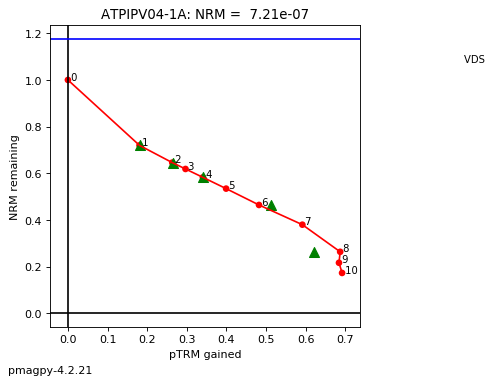

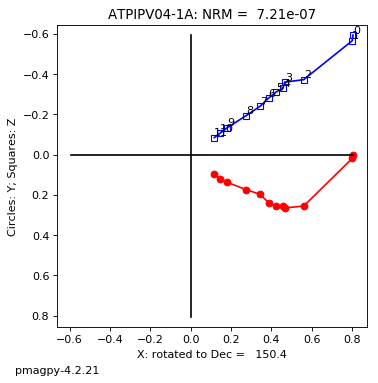

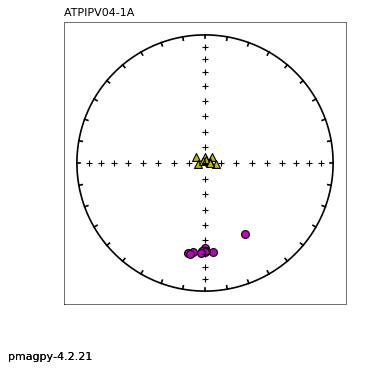

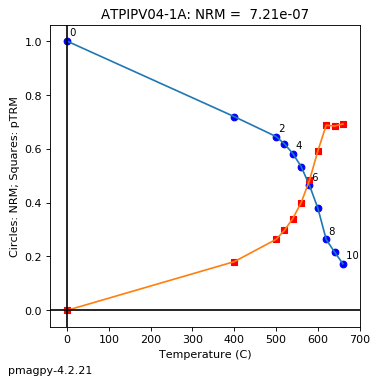

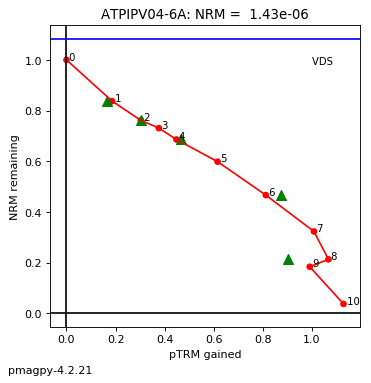

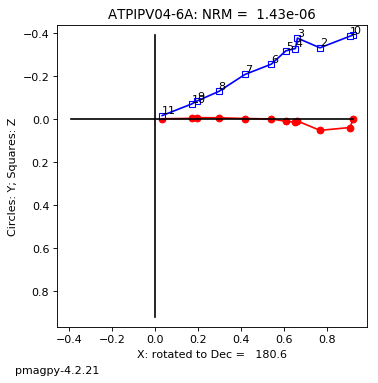

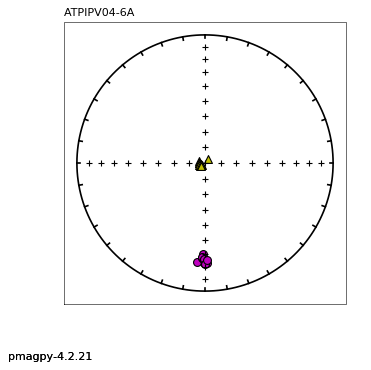

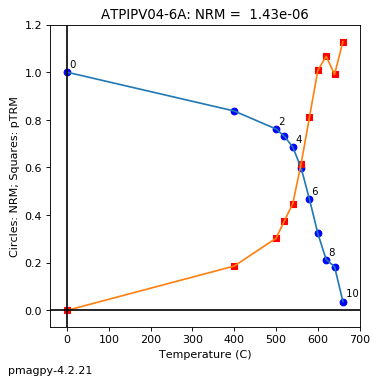

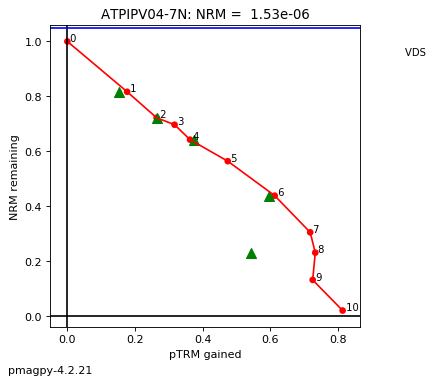

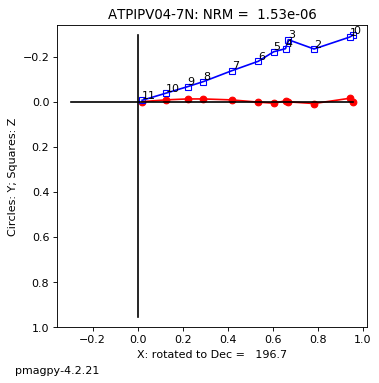

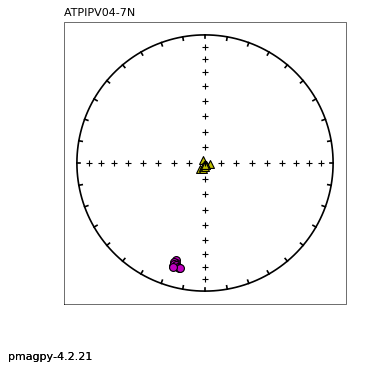

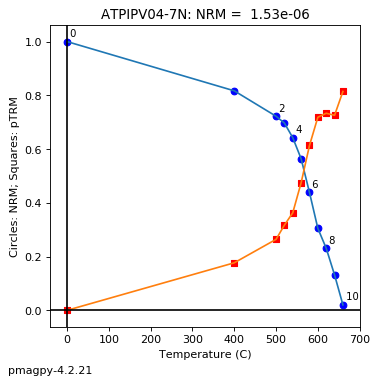

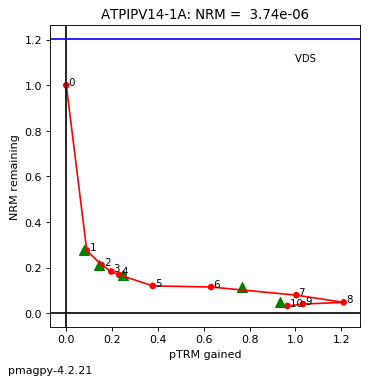

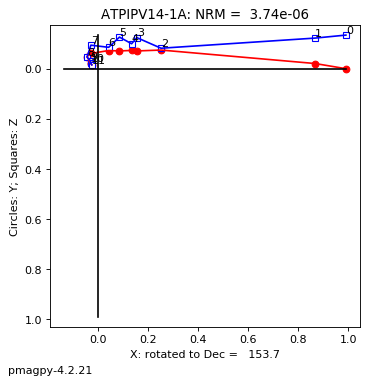

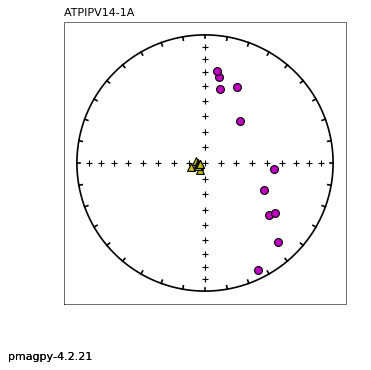

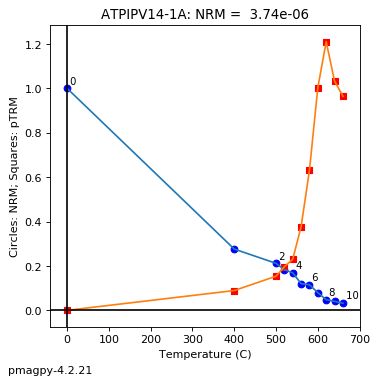

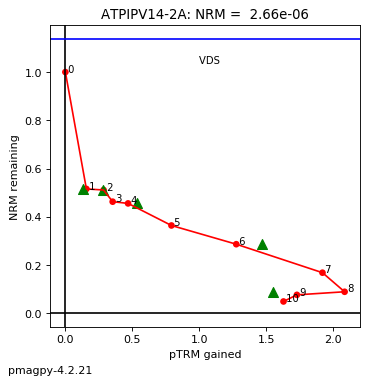

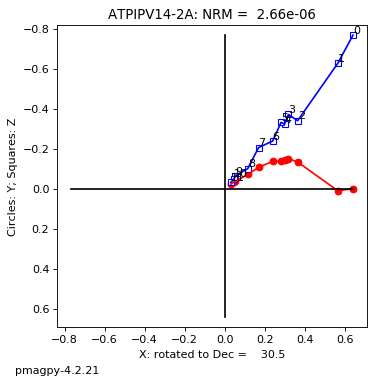

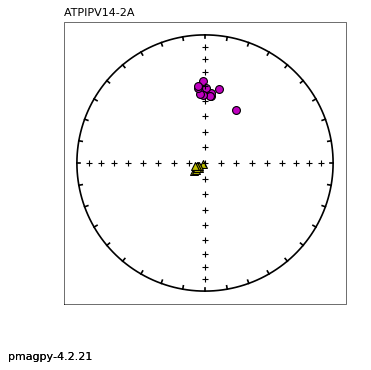

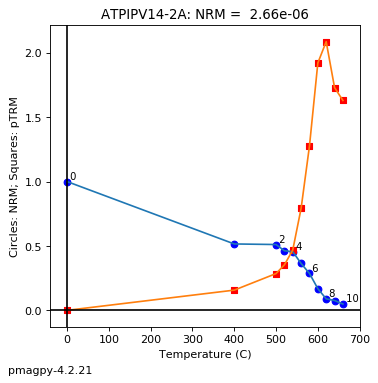

In [82]:
ipmag.thellier_magic(input_dir_path='data_files/convert_2_magic/livdb_magic/TH_IZZI+', 
                     save_plots=False, interactive=False, n_specs=5)

here's one for microwave "C+" experiment

In [83]:
convert.livdb('data_files/convert_2_magic/livdb_magic/MW_C+/',
             output_dir_path='data_files/convert_2_magic/livdb_magic/MW_C+',
             site_name_con=2,site_num_chars=3)

Open file:  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW_C+/CHEV.livdb
23  records written to file  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW_C+/measurements.txt
1  records written to file  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW_C+/specimens.txt
-I- Removing non-MagIC column names from measurements: location sample site 

-I- Removing non-MagIC column names from specimens: location height site 

-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW_C+/measurements.txt
-I- 23 records written to measurements file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW_C+/specimens.txt
-I- 1 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW_C+/samples.txt
-I- 1 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW

(True,
 '/Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW_C+/measurements.txt')

An example for both microwave IZZI and C++:

In [84]:
convert.livdb('data_files/convert_2_magic/livdb_magic/MW_IZZI+andC++/',
             output_dir_path='data_files/convert_2_magic/livdb_magic/MW_IZZI+andC++',
             samp_name_con='2', samp_num_chars=1,site_name_con=2,site_num_chars=1)

Open file:  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW_IZZI+andC++/NVPA.livdb
-W- WARNING sample NVPADC18A2 treatment= 13. Step Type is O but the program assumes LT-M-I
-W- WARNING sample NVPADC18A2 treatment= 13. Step Type is O but the program assumes LT-M-I
-W- WARNING sample NVPADC18A2 treatment= 13. Step Type is Z but the program assumes LT-PMRM-MD
-W- livdb.py does not support this experiment type yet.
    Please report your issue on https://github.com/PmagPy/PmagPy/issues
-W- WARNING sample NVPATF16C2 treatment= 1. Step Type is Z but the program assumes LT-M-I
-W- WARNING sample NVPATF16C2 treatment= 3. Step Type is I but the program assumes LT-M-Z
-W- WARNING sample NVPATF16C2 treatment= 3. Step Type is Z but the program assumes LT-M-I
-W- WARNING sample NVPATF16C2 treatment= 2. Step Type is P but the program assumes LT-PMRM-MD
-W- WARNING sample NVPATF16C2 treatment= 4. Step Type is Z but the program assumes LT-M-I
-W- WARNING sample NVPATF16C2 treatm

(True,
 '/Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW_IZZI+andC++/measurements.txt')

An example for both microwave OT+:

In [85]:
convert.livdb('data_files/convert_2_magic/livdb_magic/MW_OT+/',
             output_dir_path='data_files/convert_2_magic/livdb_magic/MW_OT+',
             site_name_con=2,site_num_chars=3)

Open file:  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW_OT+/16-1.livdb
45  records written to file  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW_OT+/measurements.txt
1  records written to file  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW_OT+/specimens.txt
-I- Removing non-MagIC column names from measurements: location sample site 

-I- Removing non-MagIC column names from specimens: location height site 

-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW_OT+/measurements.txt
-I- 45 records written to measurements file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW_OT+/specimens.txt
-I- 1 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW_OT+/samples.txt
-I- 1 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_ma

(True,
 '/Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW_OT+/measurements.txt')

And an example for MW_P experiments.   

In [86]:
convert.livdb('data_files/convert_2_magic/livdb_magic/MW_P/',
             output_dir_path='data_files/convert_2_magic/livdb_magic/MW_P',
             site_name_con=2,site_num_chars=3)

Open file:  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW_P/perp.csv
73  records written to file  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW_P/measurements.txt
4  records written to file  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW_P/specimens.txt
-I- Removing non-MagIC column names from measurements: location sample site 

-I- Removing non-MagIC column names from specimens: location height site 

-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW_P/measurements.txt
-I- 73 records written to measurements file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW_P/specimens.txt
-I- 4 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW_P/samples.txt
-I- 4 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW_P/sites

(True,
 '/Users/nebula/Python/PmagPy/data_files/convert_2_magic/livdb_magic/MW_P/measurements.txt')

Now you can look at these data (except for MW_P) with thellier_gui or [thellier_magic](#thellier_magic).

### mst_magic

[\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#mst_magic.py)

To convert a Curie Temperature experiment to MagIC, use **convert.mst()**.  The data file format should be a space delimited file with temperature and magnetization couplets.   

In [87]:
help(convert.mst)

Help on function mst in module pmagpy.convert_2_magic:

mst(infile, spec_name='unknown', dir_path='.', input_dir_path='', meas_file='measurements.txt', samp_infile='samples.txt', user='', specnum=0, samp_con='1', labfield=0.5, location='unknown', syn=False, data_model_num=3)
    Convert MsT data (T,M) to MagIC measurements format files
    
    Parameters
    ----------
    infile : str
        input file name
    specimen : str
        specimen name, default "unknown"
    dir_path : str
        working directory, default "."
    input_dir_path : str
        input file directory IF different from dir_path, default ""
    meas_file : str
        output measurement file name, default "measurements.txt"
    samp_infile : str
        existing sample infile (not required), default "samples.txt"
    user : str
        user name, default ""
    specnum : int
        number of characters to designate a specimen, default 0
    samp_con : str
        sample/site naming convention, default '1', s

In [88]:
convert.mst('curie_example.dat',samp_con="5",
           dir_path='data_files/convert_2_magic/mst_magic/')

560  records written to file  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/mst_magic/measurements.txt
results put in  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/mst_magic/measurements.txt
-I- writing specimens records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/mst_magic/specimens.txt
-I- 1 records written to specimens file
-I- writing samples records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/mst_magic/samples.txt
-I- 1 records written to samples file
-I- writing sites records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/mst_magic/sites.txt
-I- 1 records written to sites file
-I- writing locations records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/mst_magic/locations.txt
-I- 1 records written to locations file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/mst_magic/samples.txt
-I- 1 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magi

(True,
 '/Users/nebula/Python/PmagPy/data_files/convert_2_magic/mst_magic/measurements.txt')

We can now use [curie](#curie) to plot the data. 

second derivative maximum is at T=205


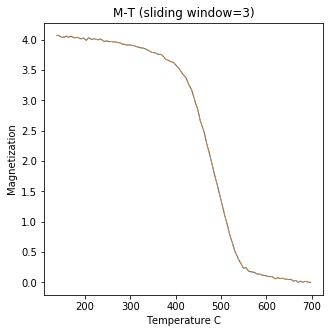

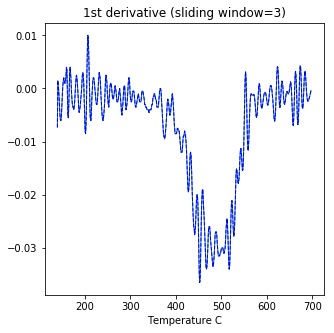

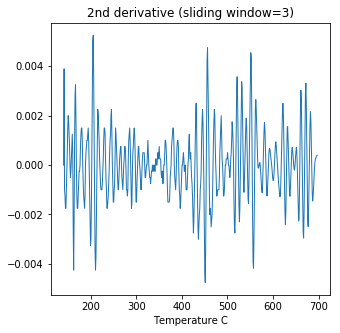

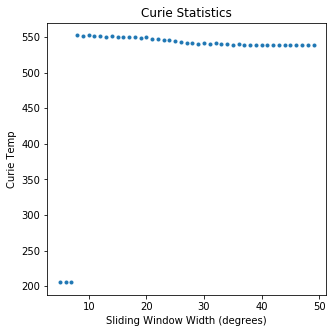

In [89]:
ipmag.curie(path_to_file='data_files/convert_2_magic/mst_magic/',file_name='measurements.txt',magic=True)

### pmd_magic 

[\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#pmd_magic.py)

 This format is the one used to import .PMD formatted magnetometer files (used for example in the PaleoMac software of Cogné, 2003) into the MagIC format. (See http://www.ipgp.fr/~cogne/pub/paleomac/PMhome.html for the PaleoMac home page. The version of these files that **pmd_magic** expects (UCSC version) contains demagnetization data for a single specimen and has a format as in the example file in ../measurement_import/pmd_magic/PMD/ss0207a.pmd


The first line is a comment line. The second line has the specimen name, the core azimuth (a=) and plunge (b=) which are assumed to be the lab arrow azimuth and plunge (Orientation scheme #4)D. The third line is a header explaining the columns in the file.

Use **convert.pmd()**  to convert the file ss0101a.pmd in the directory ’PMD’ in the ’pmd_magic’ folder of the measurement_import directory in the example data_files directory. These were taken at a location named ’Summit Springs’ and have a naming convention of the type XXXX[YYY], where YYY is sample designation with Z characters from site XXX, or naming convention # 4-2. A single character distinguishes the specimen from the sample (specnum=1). All samples were oriented with a magnetic compass. 

In [90]:
help(convert.pmd)

Help on function pmd in module pmagpy.convert_2_magic:

pmd(mag_file, dir_path='.', input_dir_path='', meas_file='measurements.txt', spec_file='specimens.txt', samp_file='samples.txt', site_file='sites.txt', loc_file='locations.txt', lat='', lon='', specnum=0, samp_con='1', location='unknown', noave=0, meth_code='LP-NO')
    converts PMD (Enkin)  format files to MagIC format files
    
    Parameters
    ----------
    mag_file : str
        input file name, required
    dir_path : str
        working directory, default "."
    input_dir_path : str
        input file directory IF different from dir_path, default ""
    spec_file : str
        output specimen file name, default "specimens.txt"
    samp_file: str
        output sample file name, default "samples.txt"
    site_file : str
        output site file name, default "sites.txt"
    loc_file : str
        output location file name, default "locations.txt"
    lat : float or str
        latitude, default ""
    lon : float or str


In [91]:
convert.pmd('ss0207a.pmd',dir_path='data_files/convert_2_magic/pmd_magic/PMD/',
           samp_con='4-2',location='Summit Springs',specnum=1)

adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 8 records written to measurements file
-I- writing specimens records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/pmd_magic/PMD/specimens.txt
-I- 1 records written to specimens file
-I- writing samples records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/pmd_magic/PMD/samples.txt
-I- 1 records written to samples file
-I- writing sites records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/pmd_magic/PMD/sites.txt
-I- 1 records written to sites file
-I- writing locations records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/pmd_magic/PMD/locations.txt
-I- 1 records written to locations file
-I- writing measurements records to /Users/nebula/Python/PmagPy/data_files/convert_2_magic/pmd_magic/PMD/measurements.txt
-I- 8 records written to measurements file


(True,
 '/Users/nebula/Python/PmagPy/data_files/convert_2_magic/pmd_magic/PMD/measurements.txt')

### sio_magic

[\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#sio_magic.py)

This program allows conversion of the SIO format magnetometer files to the MagIC common measurements format. The columns in the example data file are: 

Specimen treatment intensity declination inclination optional_string 

The treatment field is the temperature (in centigrade), the AF field (in mT), the impulse field strength, etc. For special experiments like IRM acquisition, the coil number of the popular ASC impulse magnetizer can be specified if the treatment steps are in volts. The position for anisotropy experiments or whether the treatment is “in-field” or in zero field also require special formatting. The units of the intensity field are in cgs and the directions are relative to the ‘lab arrow’ on the specimen. Here are some examples of commonly used specimens and conversions from field arrow to lab arrow. 

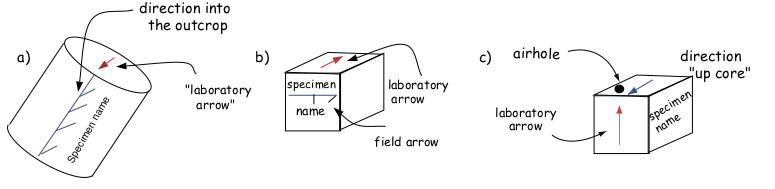

In [92]:
Image('data_files/Figures/samples.png')

As an example, we use data from Sbarbori et al. (2009) done on a set of samples from the location “Socorro”, including AF, thermal, and thellier experimental data. These were saved in sio_af_example.dat, sio_thermal_example.dat, and sio_thellier_example.dat respectively. The lab field for the thellier experiment was 25 μT and was applied along the specimen’s Z axis (phi=0,theta=90).] 

We can convert the example files into measurement formatted files with names like af_measurements.txt, etc. using the function **convert.sio()**.   Then combine them together following the instructions for  [combine_magic](#combine_magic).   

In [93]:
help(convert.sio)

Help on function sio in module pmagpy.convert_2_magic:

sio(mag_file, dir_path='.', input_dir_path='', meas_file='measurements.txt', spec_file='specimens.txt', samp_file='samples.txt', site_file='sites.txt', loc_file='locations.txt', samp_infile='', institution='', syn=False, syntype='', instrument='', labfield=0, phi=0, theta=0, peakfield=0, specnum=0, samp_con='1', location='unknown', lat='', lon='', noave=False, codelist='', cooling_rates='', coil='', timezone='UTC', user='')
    converts Scripps Institution of Oceanography measurement files to MagIC data base model 3.0
    
    Parameters
    _________
    magfile : input measurement file
    dir_path : output directory path, default "."
    input_dir_path : input file directory IF different from dir_path, default ""
    meas_file : output file measurement file name, default "measurements.txt"
    spec_file : output file specimen file name, default "specimens.txt"
    samp_file : output file sample file name, default "samples.tt"
 

In [94]:
convert.sio('sio_af_example.dat',dir_path='data_files/convert_2_magic/sio_magic/',
           specnum=1,location='Isla Soccoro',codelist='AF',samp_con='1',
           meas_file='af_measurements.txt',spec_file='af_specimens.txt',
           samp_file='af_samples.txt',site_file='af_sites.txt')

adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 14 records written to measurements file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/sio_magic/af_specimens.txt
-I- 1 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/sio_magic/af_samples.txt
-I- 1 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/sio_magic/af_sites.txt
-I- 1 records written to sites file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/sio_magic/locations.txt
-I- 1 records written to locations file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/sio_magic/af_measurements.txt
-I- 14 records written to measurements file


(True,
 '/Users/nebula/Python/PmagPy/data_files/convert_2_magic/sio_magic/af_measurements.txt')

In [95]:
convert.sio('sio_thermal_example.dat',dir_path='data_files/convert_2_magic/sio_magic/',
            specnum=1,location='Isla Soccoro',codelist='T',
            meas_file='thermal_measurements.txt',spec_file='thermal_specimens.txt',
            samp_file='thermal_samples.txt',site_file='thermal_sites.txt')

adding measurement column to measurements table!
-I- overwriting /Users/nebula/Python/PmagPy/measurements.txt
-I- 22 records written to measurements file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/sio_magic/thermal_specimens.txt
-I- 1 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/sio_magic/thermal_samples.txt
-I- 1 records written to samples file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/sio_magic/thermal_sites.txt
-I- 1 records written to sites file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/sio_magic/locations.txt
-I- 1 records written to locations file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/sio_magic/thermal_measurements.txt
-I- 22 records written to measurements file


(True,
 '/Users/nebula/Python/PmagPy/data_files/convert_2_magic/sio_magic/thermal_measurements.txt')

And combine them together... 

In [96]:
# combine the measurements files
measfiles=['data_files/convert_2_magic/sio_magic/af_measurements.txt',
           'data_files/convert_2_magic/sio_magic/thermal_measurements.txt']
ipmag.combine_magic(measfiles,'data_files/convert_2_magic/sio_magic/measurements.txt')

specfiles=['data_files/convert_2_magic/sio_magic/af_specimens.txt',
           'data_files/convert_2_magic/sio_magic/thermal_specimens.txt']
ipmag.combine_magic(specfiles,'data_files/convert_2_magic/sio_magic/specimens.txt', magic_table='specimens')

sitefiles=['data_files/convert_2_magic/sio_magic/af_sites.txt',
           'data_files/convert_2_magic/sio_magic/thermal_sites.txt']
ipmag.combine_magic(sitefiles,'data_files/convert_2_magic/sio_magic/sites.txt',magic_table='sites')


-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/sio_magic/measurements.txt
-I- 36 records written to measurements file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/sio_magic/specimens.txt
-I- 2 records written to specimens file
-I- overwriting /Users/nebula/Python/PmagPy/data_files/convert_2_magic/sio_magic/sites.txt
-I- 1 records written to sites file


'/Users/nebula/Python/PmagPy/data_files/convert_2_magic/sio_magic/sites.txt'

### sufar4_magic

[\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#sufar4_asc_magic.py)

The AGICO program SUFAR creates ascii txt files as output.  **convert.sufar4()** will convert these to the MagIC format.

In [97]:
help(convert.sufar4)

Help on function sufar4 in module pmagpy.convert_2_magic:

sufar4(ascfile, meas_output='measurements.txt', aniso_output='rmag_anisotropy.txt', spec_infile=None, spec_outfile='specimens.txt', samp_outfile='samples.txt', site_outfile='sites.txt', specnum=0, sample_naming_con='1', user='', locname='unknown', instrument='', static_15_position_mode=False, dir_path='.', input_dir_path='', data_model_num=3)
    Converts ascii files generated by SUFAR ver.4.0 to MagIC files
    
    Parameters
    ----------
    ascfile : str
        input ASC file, required
    meas_output : str
        measurement output filename, default "measurements.txt"
    aniso_output : str
        anisotropy output filename, MagIC 2 only, "rmag_anisotropy.txt"
    spec_infile : str
        specimen infile, default None
    spec_outfile : str
        specimen outfile, default "specimens.txt"
    samp_outfile : str
        sample outfile, default "samples.txt"
    site_outfile : str
        site outfile, default "sites.

In [98]:
convert.sufar4('sufar4-asc_magic_example.txt',dir_path='data_files/convert_2_magic/sufar_asc_magic/',
              sample_naming_con='5',locname='U1356A')

290  records written to file  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/sufar_asc_magic/measurements.txt
bulk measurements put in  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/sufar_asc_magic/measurements.txt
728  records written to file  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/sufar_asc_magic/specimens.txt
specimen/anisotropy info put in  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/sufar_asc_magic/specimens.txt
148  records written to file  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/sufar_asc_magic/samples.txt
sample info put in  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/sufar_asc_magic/samples.txt
148  records written to file  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/sufar_asc_magic/sites.txt
site info put in  /Users/nebula/Python/PmagPy/data_files/convert_2_magic/sufar_asc_magic/sites.txt


(True,
 '/Users/nebula/Python/PmagPy/data_files/convert_2_magic/sufar_asc_magic/measurements.txt')

Now we can test it out with, for example, [ipmag.aniso_magic_nb()](#aniso_magic)

In [ ]:
ipmag.aniso_magic_nb(infile='data_files/convert_2_magic/sufar_asc_magic/specimens.txt')

### tdt_magic

[\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#tdt_magic.py)

Convertions of the Thellier Tool format of Leonhardt et al., 2004 can be done with **convert.tdt()**.  THERE IS A PROBLEM WITH THE XXX.4 TREATMENT STEP CONVERSION.  

In [ ]:
help(convert.tdt)

In [ ]:
convert.tdt('data_files/convert_2_magic/tdt_magic/')

### utrecht_magic

[\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#utrecht_magic.py)


In [ ]:
help(convert.utrecht)

In [ ]:
convert.utrecht('Utrecht_Example.af',dir_path='data_files/convert_2_magic/utrecht_magic',
               specnum=0,samp_con='3')

### orientation_magic

[\[Preparing for MagIC\]](https://earthref.org/PmagPy/cookbook/#QQ2-1-25) [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#orientation_magic.py)

**orientation_magic** is meant to import the field book data as entered into the format like in  orientation_example.txt into the MagIC format samples, sites and location tables.  
Click [here](https://earthref.org/PmagPy/cookbook/#field_info)  for details about the orient.txt file format. The example file used here has field information for a few sites. The samples were oriented with a Pomeroy orientation device (the default) and it is desirable to calculate the magnetic declination from the IGRF at the time of sampling (also the default). Sample names follow the rule that the sample is designated by a letter at the end of the site name (convention \#1 - which is also the default). We can do this from within a notebook by calling  **ipmag.orientation_magic()**.


In [ ]:
help(ipmag.orientation_magic)

 We need to know which orientation convention was used to take the samples (it was with a Pomeroy, so, the default).  We want to use the igrf calculated magnetic declination at each site (so dec_correction_con=1, the default).  These samples were collected in Antarctica with a local time of GMT+13, so we need to subtract 13 hours so hours_from_gmt should be 13.  we are using data model 3.0 for this notebook, so data_model=3.  Also, input_dir_path and output_dir_path are both ../orientation_magic.  

In [ ]:
ipmag.orientation_magic(input_dir_path='data_files/orientation_magic',orient_file='orient_example.txt',
                        hours_from_gmt=13,data_model=3,output_dir_path='data_files/orientation_magic')

### azdip_magic

[\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#azdip_magic.py)

Many paleomagnetists save orientation information in files in this format: Sample Azimuth Plunge Strike Dip (AZDIP format), where the Azimuth and Plunge are the declination and inclination of the drill direction and the strike and dip are the attitude of the sampled unit (with dip to the right of strike). Of course there are many ways to think about sample orientation and the MagIC database convention is to store the direction of the X coordinate of the specimen measurements. To convert an AzDip formatted file (example in data_files/azdip_magic/azdip_magic_example.dat), we can use **ipmag.azdip_magic()**.  





In [ ]:
help(ipmag.azdip_magic)

The method_codes are important. If you don't specify any sample orientation method, for example, the program will assume that they are unoriented.  Pick the appropriate method codes for field sampling (FS-) and sample orientation (SO-) from the lists here:  https://www2.earthref.org/MagIC/method-codes



In [ ]:
ipmag.azdip_magic(orient_file='azdip_magic_example.dat',input_dir='data_files/azdip_magic/',
                  output_dir='data_files/azdip_magic/', method_codes='FS-FD:SO-MAG')

# PmagPy

### aarm_magic

[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#aarm_magic.py)

Anisotropy of anhysteretic or other remanence can be converted to a tensor and used to correct natural remanence data for the effects of anisotropy remanence acquisition. For example, directions may be deflected from the geomagnetic field direction or intensities may be biased by strong anisotropies in the magnetic fabric of the specimen. By imparting an anhysteretic or thermal remanence in many specific orientations, the anisotropy of remanence acquisition can be characterized and used for correction. We do this for anisotropy of anhysteretic remanence (AARM) by imparting an ARM in 9, 12 or 15 positions. Each ARM must be preceded by an AF demagnetization step. The 15 positions are shown in the [k15_magic](#k15_magic) example.

For the 9 position scheme, **aarm_magic** assumes that the AARMs are imparted in positions 1,2,3, 6,7,8, 11,12,13. Someone (a.k.a. Josh Feinberg) has kindly made the measurements and saved them an SIO formatted measurement file named aarm_magic_example.dat in the datafile directory called aarm_magic. Note the special format of these files - the treatment column (column #2) has the position number (1,2,3,6, etc.) followed by either a “00” for the obligatory zero field baseline step or a “10” for the in-field step. These could also be ‘0‘ and ‘1’.

We need to first import these into the measurements format and then calculate the anisotropy tensors. These can then be plotted or used to correct paleointensity or directional data for anisotropy of remanence.

So, first follow the instructions in  [sio_magic](#sio_magic) to import the AARM data into the MagIC format. The DC field was 50 μT, the peak AC field was 180 mT, the location was "Bushveld" and the lab protocol was AF and Anisotropy. The naming convention used Option # 3 (see help menu).

Then we need  to calculate the best-fit tensor and write them out to the specimens.txt MagIC tables which can be used to correct remanence data for anisotropy. 

The **aarm_magic** program takes a measurements.txt formatted file with anisotropy of ARM data in it and calculates the tensors, rotates it into the desired coordinate system and stores the data in a specimens.txt format file.  To do this in a notebook, use **ipmag.aarm_magic()**.  

In [ ]:
convert.sio('arm_magic_example.dat',dir_path='data_files/aarm_magic/',specnum=3,
           location='Bushveld',codelist='AF:ANI',samp_con='3',
           meas_file='aarm_measurements.txt',peakfield=180,labfield=50, phi=-1, theta=-1)

In [ ]:
help(ipmag.aarm_magic)

In [ ]:
ipmag.aarm_magic('aarm_measurements.txt',dir_path='data_files/aarm_magic/')

In [ ]:
ipmag.aniso_magic_nb(infile='data_files/aarm_magic/specimens.txt')

In [ ]:
help(ipmag.aniso_magic_nb)

## angle

[\[Essentials Appendix A.3.4\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap1.html#x20-215000A.3.4) [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#angle.py)


**angle** calculates the angle $\alpha$ between two declination,inclination pairs. It reads in the directions from the command line or from a file and calls **pmag.angle()** to do the calculation.  

There are several ways to use this from the notebook - one loading the data into a Pandas dataframe, then convert to the desired arrays, or load directly into a **Numpy** array of desired shape.  

In [ ]:
help(pmag.angle)

In [ ]:
# Pandas way:
di=pd.read_csv('data_files/angle/angle.dat',delim_whitespace=True,header=None)
#rename column headers
di.columns=['Dec1','Inc1','Dec2','Inc2']


Here's the sort of data  in the file: 

In [ ]:
di.head()

Now we will use **pmag.angle()** to calculate the angles.  

In [ ]:
# call pmag.angle
pmag.angle(di[['Dec1','Inc1']].values,di[['Dec2','Inc2']].values)

Here is the other (equally valid) way using **np.loadtext()**.

In [ ]:
# Numpy way:
di=np.loadtxt('data_files/angle/angle.dat').transpose() # read in file
D1=di[0:2].transpose() # assign to first array
D2=di[2:].transpose() # assign to second array
pmag.angle(D1,D2) # call pmag.angle

You can always save your output using **np.savetxt()**.   

In [ ]:
angles=pmag.angle(D1,D2) # assign the returned array to angles

### ani_depthplot


[\[Essentials Chapter 13\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch13.html#x15-15600013) [\[MagIC Database\]](https://earthref.org/MagIC) [\[command_line_version\]](http://pmagpy.github.io/PmagPy-cli.html#ani_depthplot.py)

 Anisotropy data can be plotted versus depth. The program **ani_depthplot** uses MagIC formatted data tables. Bulk susceptibility measurements can also be plotted if they are available in a **measurements.txt** formatted file.

In this example, we will use the data from Tauxe et al. (2015, doi:10.1016/j.epsl.2014.12.034) measured on samples obtained during Expedition 318 of the International Ocean Drilling Program. To get the entire dataset, go to the MagIC data base at: https://www2.earthref.org/MagIC/doi/10.1016/j.epsl.2014.12.034.  Download the data set and unpack it with [ipmag.download_magic](#download_magic).


We will use the **ipmag.ani_depthplot()** version of this program.

In [ ]:
help(ipmag.ani_depthplot)

And here we go:

In [ ]:
ipmag.ani_depthplot(dir_path='data_files/ani_depthplot');

### aniso_magic


[\[Essentials Chapter 13\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch13.html#x15-15600013) [\[MagIC Database\]](https://earthref.org/MagIC) [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#aniso_magic.py)

 Samples were collected from the eastern margin a dike oriented with a bedding pole declination of 110∘ and dip of 2∘. The data have been imported into a MagIC (data model 3) formatted file named dike_specimens.txt.

We will make a plot of the data using **ipmag.aniso_magic_nb()**, using the site parametric bootstrap option and plot out the bootstrapped eigenvectors. We will also draw on the trace of the dike.



In [ ]:
help(ipmag.aniso_magic_nb)

In [ ]:
ipmag.aniso_magic_nb(infile='dike_specimens.txt',dir_path='data_files/aniso_magic',
       iboot=1,ihext=0,ivec=1,PDir=[120,10],ipar=1, save_plots=False) # compare dike directions with plane of dike with pole of 120,10

 The specimen eigenvectors are plotted in the top diagram with the usual convention that squares are the V$_1$ directions, triangles are the V$_2$ directions and circles are the V$_3$ directions. All directions are plotted on the lower hemisphere. The bootstrapped eigenvectors are shown in the middle diagram. Cumulative distributions of the bootstrapped eigenvalues are shown in the bottom plot with the 95% confidence bounds plotted as vertical lines. It appears that the magma was moving in the northern and slightly up direction along the dike.

There are more options to **ipmag.aniso_magic_nb()** that come in handy. In particular, one often wishes to test if a particular fabric is isotropic (the three eigenvalues cannot be distinguished), or if a particular eigenvector is parallel to some direction. For example, undisturbed sedimentary fabrics are oblate (the maximum and intermediate directions cannot be distinguished from one another, but are distinct from the minimum) and the eigenvector associated with the minimum eigenvalue is vertical. These criteria can be tested using the distributions of bootstrapped eigenvalues and eigenvectors.

The following session illustrates how this is done, using the data in the test file sed_specimens.txt in the aniso_magic directory. 

In [ ]:
ipmag.aniso_magic_nb(infile='sed_specimens.txt',dir_path='data_files/aniso_magic',
       iboot=1,ihext=0,ivec=1,Dir=[0,90],vec=3,ipar=1, save_plots=False) # parametric bootstrap and compare V3 with vertical

The top three plots are as in the dike example before, showing a clear triaxial fabric (all three eigenvalues and associated eigenvectors are distinct from one another. In the lower three plots we have the distributions of the three components of the chosen axis, V$_3$, their 95% confidence bounds (dash lines) and the components of the designated direction (solid line). This direction is also shown in the equal area projection above as a red pentagon. The minimum eigenvector is not vertical in this case. 

NOTE TO SELF:  Add in 'by site' or 'by sample' as in dmag_magic.  

## apwp

[\[Essentials Chapter 16\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch16.html#x15-15600016)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#apwp.py)

The program **apwp** calculates paleolatitude, declination, inclination from a pole latitude and longitude based on the paper Besse and Courtillot (2002; see [Essentials Chapter 16](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch16.html#x15-15600016)   for complete discussion). Here we will  calculate the expected direction for 100 million year old rocks at a locality in La Jolla Cove (Latitude: 33$^{\circ}$N, Longitude 117$^{\circ}$W). Assume that we are on the North American Plate! (Note that there IS no option for the Pacific plate in the program **apwp**, and that La Jolla was on the North American plate until a few million years ago (6?). 


Within the notebook we will call **pmag.apwp**.


In [ ]:
help(pmag.apwp)

In [ ]:
# here are the desired plate, latitude, longitude and age:
data=['NA',33,-117,100] # North American plate, lat and lon of San Diego at 100 Ma
pmag.apwp(data,print_results=True)

## atrm_magic

[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#atrm_magic.py)

Anisotropy of thermal remanence (ATRM) is similar to anisotropy of anhysteretic remanence (AARM) and the procedure for obtaining the tensor is also similar. Therefore, the **atrm_magic** is quite similar to [aarm_magic](#aarm_magic). However, the SIO lab procedures for the two experiments are somewhat different. In the ATRM experiment, there is a single, zero field step at the chosen temperature which is used as a baseline. We use only six positions (as opposed to nine for AARM) because of the additional risk of alteration at each temperature step. The positions are also different:



In [ ]:
Image('data_files/Figures/atrm_meas.png')

The file atrm_magic_example.dat in the data_files/atrm_magic directory is an SIO formatted data file containing ATRM measurement data done in a temperature of 520∘C. Note the special format of these files - the treatment column (column 2) has the temperature in centigrade followed by either a “00” for the obligatory zero field baseline step or a “10” for the first postion, and so on. These could also be ‘0‘ and ‘1’, etc..

Follow the instructions for  [sio_magic](#sio_magic) to import the ATRM data into the MagIC format. The DC field was 40 μT. The sample/site naming convention used option # 1 (see help menu) and the specimen and sample name are the same (specnum=0). 

We will use **ipmag.atrm_magic()** to calculate the best-fit tensor and write out the MagIC tables which can be used to correct remanence data  for the effects of remanent anisotropy.



In [ ]:
convert.sio('atrm_magic_example.dat',dir_path='data_files/atrm_magic/',specnum=0,
           location='unknown',codelist='T:ANI',samp_con='1',
           meas_file='measurements.txt',labfield=40, phi=-1, theta=-1)

In [ ]:
help(ipmag.atrm_magic)

In [ ]:
ipmag.atrm_magic('measurements.txt',dir_path='data_files/atrm_magic')

### b_vdm

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html#x15-1560002)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#b_vdm.py)



**b_vdm** converts geomagnetic field intensity observed at the earth's surface at a particular (paleo)latitude and calculates the Virtual \[Axial\] Dipole Moment (vdm or vadm).  We will call **pmag.b_vdm()** directly from within the notebook. \[See also [**vdm_b**](#vdm_b).\]

Here we use the function  **pmag.b_vdm()** to convert an estimated paleofield value of 33 $\mu$T obtained from a lava flow at 22$^{\circ}$ N latitude to the equivalent Virtual Dipole Moment (VDM) in Am$^2$. 

In [ ]:
help(pmag.b_vdm)

In [ ]:
print ('%7.1f'%(pmag.b_vdm(33e-6,22)*1e-21),' ZAm^2')

In [ ]:
pmag.b_vdm(33e-6,22)*1e-21

### biplot_magic 

[\[Essentials Chapter 8\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch8.html#x15-1560008) [\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#biplot_magic.py)

It is often useful to plot measurements from one experiement against another. For example, rock magnetic studies of sediments often plot the IRM against the ARM or magnetic susceptibility. All of these types of measurements can be imported into a single measurements formatted file and use the MagIC method codes and other clues (lab fields, etc.) to differentiate one measurement from another. 

Data were obtained by Hartl and Tauxe (1997, doi: 10.1111/j.1365-246X.1997.tb04082.x) from a Paleogene core from 28$^{\circ}$ S (DSDP Site 522) and used for a relative paleointensity study. IRM, ARM, magnetic susceptibility and remanence data were uploaded to the MagIC database. The MagIC measurements formatted file for this study (which you can get from   https://earthref.org/MagIC/doi/10.1111/j.1365-246X.1997.tb04082.x and unpack with [download_magic](#download_magic)  is saved in data_files/biplot_magic/measurements.txt. 

We can create these plots using Pandas.  The key to what the measurements mean is in the [Magic method codes](https://www2.earthref.org/MagIC/method-codes), so we can first get a unique list of all the available method_codes, then plot the ones we are interested in  against each other.  Let's read in the data file in to a **Pandas** DataFrame and exctract the method codes to see what we have: 

In [ ]:
# read in the data
meas_df=pd.read_csv('data_files/biplot_magic/measurements.txt',sep='\t',header=1)
# get the method_codes and print
print(meas_df.method_codes.unique())
# take a look at the top part of the measurements data frame
meas_df.head()

These are: an AF demag step (LT-AF-Z), an ARM (LT-AF-I), an IRM  (LT-IRM) and a susceptibility (LP-X).  Now we can fish out data for each method, merge them by specimen, dropping any missing measurements and finally plot one against the other.  

In [ ]:
# get the IRM data
IRM=meas_df[meas_df.method_codes.str.contains('LT-IRM')]
IRM=IRM[['specimen','magn_mass']] #trim the data frame
IRM.columns=['specimen','IRM'] # rename the column
# do the same for the ARM data
ARM=meas_df[meas_df.method_codes.str.contains('LT-AF-I')]
ARM=ARM[['specimen','magn_mass']]
ARM.columns=['specimen','ARM']
# and the magnetic susceptibility
CHI=meas_df[meas_df.method_codes.str.contains('LP-X')]
CHI=CHI[['specimen','susc_chi_mass']]  
CHI.columns=['specimen','CHI']
# merge IRM ARM data by specimen
RMRMs=pd.merge(IRM,ARM,on='specimen')
# add on the susceptility data
RMRMs=pd.merge(RMRMs,CHI,on='specimen')

Now we are ready to make the plots.  

In [ ]:
fig=plt.figure(1, (12,4)) # make a figure
fig.add_subplot(131) # make the first in a row of three subplots 
plt.plot(RMRMs.IRM,RMRMs.ARM,'ro',markeredgecolor='black')
plt.xlabel('IRM (Am$^2$/kg)') # label the X axis
plt.ylabel('ARM (Am$^2$/kg)') # and the Y axis
fig.add_subplot(132)# make the second in a row of three subplots 
plt.plot(RMRMs.IRM,RMRMs.CHI,'ro',markeredgecolor='black')
plt.xlabel('IRM (Am$^2$/kg)')
plt.ylabel('$\chi$ (m$^3$/kg)')
fig.add_subplot(133)# and the third in a row of three subplots 
plt.plot(RMRMs.ARM,RMRMs.CHI,'ro',markeredgecolor='black')
plt.xlabel('$\chi$ (m$^3$/kg)')
plt.ylabel('IRM (Am$^2$/kg)');

### bootams

[\[Essentials Chapter 13\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch13.html#x15-15600013)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#bootams.py)

 **bootams** calculates bootstrap statistics for anisotropy tensor data in the form of:

x11 x22 x33 x12 x23 x13

It does this by selecting para-data sets and calculating the Hext average eigenparameters. It has an optional parametric bootstrap whereby the $\sigma$ for the data set as a whole is used to draw new para data sets. The bootstrapped eigenparameters are assumed to be Kent distributed and the program calculates Kent error ellipses for each set of eigenvectors. It also estimates the standard deviations of the bootstrapped eigenvalues.

**bootams**   reads in a file with data for the six tensor elements (x11 x22 x33 x12 x23 x13) for specimens, calls **pmag.s_boot()**  using a parametric or non-parametric bootstrap as desired. If all that is desired is the bootstrapped eigenparameters, **pmag.s_boot()** has all we need, but if the Kent ellipses are required, and we can call **pmag.sbootpars()** to calculated these more derived products and  print them out.

Note that every time the bootstrap program gets called, the output will be slightly different because this depends on calls to random number generators. If the answers are different by a lot, then the number of bootstrap calculations is too low. The number of bootstraps can be changed with the nb option below. 


We can do all this from within the notebook as follows: 

In [ ]:
help(pmag.s_boot)

So we will:
- read in the AMS tensor data
- get the bootstrapped eigenparameters
- print out the formatted results

In [ ]:
Ss=np.loadtxt('data_files/bootams/bootams_example.dat')
Tmean,Vmean,Taus,Vs=pmag.s_boot(Ss) # get the bootstrapped eigenparameters
bpars=pmag.sbootpars(Taus,Vs) # calculate kent parameters for bootstrap
print("""tau tau_sigma V_dec V_inc V_eta V_eta_dec V_eta_inc V_zeta V_zeta_dec V_zeta_inc
""")
outstring='%7.5f %7.5f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f'%(\
          Tmean[0],bpars["t1_sigma"],Vmean[0][0],Vmean[0][1],\
          bpars["v1_zeta"],bpars["v1_zeta_dec"],bpars["v1_zeta_inc"],\
          bpars["v1_eta"],bpars["v1_eta_dec"],bpars["v1_eta_inc"])
print(outstring)
outstring='%7.5f %7.5f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f'%(\
          Tmean[1],bpars["t2_sigma"],Vmean[1][0],Vmean[1][1],\
          bpars["v2_zeta"],bpars["v2_zeta_dec"],bpars["v2_zeta_inc"],\
          bpars["v2_eta"],bpars["v2_eta_dec"],bpars["v2_eta_inc"])
print(outstring)
outstring='%7.5f %7.5f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f'%(\
          Tmean[2],bpars["t3_sigma"],Vmean[2][0],Vmean[2][1],\
          bpars["v3_zeta"],bpars["v3_zeta_dec"],bpars["v3_zeta_inc"],\
          bpars["v3_eta"],bpars["v3_eta_dec"],bpars["v3_eta_inc"])
print(outstring)

In [ ]:
# with parametric bootstrap: 
Ss=np.loadtxt('data_files/bootams/bootams_example.dat')
Tmean,Vmean,Taus,Vs=pmag.s_boot(Ss,ipar=1,nb=5000) # get the bootstrapped eigenparameters
bpars=pmag.sbootpars(Taus,Vs) # calculate kent parameters for bootstrap
print("""tau tau_sigma V_dec V_inc V_eta V_eta_dec V_eta_inc V_zeta V_zeta_dec V_zeta_inc
""")
outstring='%7.5f %7.5f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f'%(\
          Tmean[0],bpars["t1_sigma"],Vmean[0][0],Vmean[0][1],\
          bpars["v1_zeta"],bpars["v1_zeta_dec"],bpars["v1_zeta_inc"],\
          bpars["v1_eta"],bpars["v1_eta_dec"],bpars["v1_eta_inc"])
print(outstring)
outstring='%7.5f %7.5f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f'%(\
          Tmean[1],bpars["t2_sigma"],Vmean[1][0],Vmean[1][1],\
          bpars["v2_zeta"],bpars["v2_zeta_dec"],bpars["v2_zeta_inc"],\
          bpars["v2_eta"],bpars["v2_eta_dec"],bpars["v2_eta_inc"])
print(outstring)
outstring='%7.5f %7.5f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f %7.1f'%(\
          Tmean[2],bpars["t3_sigma"],Vmean[2][0],Vmean[2][1],\
          bpars["v3_zeta"],bpars["v3_zeta_dec"],bpars["v3_zeta_inc"],\
          bpars["v3_eta"],bpars["v3_eta_dec"],bpars["v3_eta_inc"])
print(outstring)

### cart_dir

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html#x15-1560002)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#cart_dir.py)

**cart_dir** converts cartesian coordinates (X,Y,Z) to polar coordinates (Declination, Inclination, Intensity).  We will call **pmag.cart2dir()**.

In [ ]:
help(pmag.cart2dir)

In [ ]:
# read in data file from example file
cart=np.loadtxt('data_files/cart_dir/cart_dir_example.dat')
print ('Input: \n',cart) # print out the cartesian coordinates
# print out the  results
dirs = pmag.cart2dir(cart)
print ("Output: ")
for d in dirs:
    print ('%7.1f %7.1f %8.3e'%(d[0],d[1],d[2]))

### chi_magic


[\[Essentials Chapter 8\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch8.html#x15-1560008) [\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#chi_magic.py)

 It is sometimes useful to measure susceptibility as a function of temperature, applied field and frequency. Here we use a data set that came from the Tiva Canyon Tuff sequence (see Jackson et al., 2006, doi: 10.1029/2006JB004514). 


**chi_magic** reads in a MagIC formatted file and makes various plots.  We will do this with Pandas.


In [ ]:
# read in data from data model 3 example file
chi_data=pd.read_csv('data_files/chi_magic/measurements.txt',sep='\t',header=1)
print (chi_data.columns)
# get arrays of available temps, frequencies and fields
Ts=np.sort(chi_data.meas_temp.unique())
Fs=np.sort(chi_data.meas_freq.unique())
Bs=np.sort(chi_data.meas_field_ac.unique())


In [ ]:
# plot chi versus temperature at constant field
b=Bs.max()
for f in Fs:
    this_f=chi_data[chi_data.meas_freq==f]
    this_f=this_f[this_f.meas_field_ac==b]
    plt.plot(this_f.meas_temp,1e6*this_f.susc_chi_volume,label='%i'%(f)+' Hz')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('$\chi$ ($\mu$SI)')
plt.title('B = '+'%7.2e'%(b)+ ' T')

In [ ]:
# plot chi versus frequency at constant B
b=Bs.max()
t=Ts.min()
this_t=chi_data[chi_data.meas_temp==t]
this_t=this_t[this_t.meas_field_ac==b]
plt.semilogx(this_t.meas_freq,1e6*this_t.susc_chi_volume,label='%i'%(t)+' K')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('$\chi$ ($\mu$SI)')
plt.title('B = '+'%7.2e'%(b)+ ' T')

 You can see the dependence on temperature, frequency and applied field. These data support the suggestion that there is a strong superparamagnetic component in these specimens.


### common_mean

[\[Essentials Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html#x15-15600012)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#common_mean.py)

 Most paleomagnetists use some form of Fisher Statistics to decide if two directions are statistically distinct or not (see [Essentials Chapter 11](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html#x15-15600011) for a discussion of those techniques. But often directional data are not Fisher distributed and the parametric approach will give misleading answers. In these cases, one can use a boostrap approach, described in detail in [Essentials Chapter 12]. The program **common_mean** can be used for a bootstrap test for common mean to check whether two declination, inclination data sets have a common mean at the 95% level of confidence. 
 
 We want to compare the two data sets: common_mean_ex_file1.dat and common_mean_ex_file2.dat. But first, let’s look at the data in equal area projection using the methods outline in the section on [eqarea](#eqarea).





In [ ]:
directions_A=np.loadtxt('data_files/common_mean/common_mean_ex_file1.dat')
directions_B=np.loadtxt('data_files/common_mean/common_mean_ex_file2.dat') 
ipmag.plot_net(1)
ipmag.plot_di(di_block=directions_A,color='red')
ipmag.plot_di(di_block=directions_B,color='blue')


Now let’s look at the common mean problem using **ipmag.common_mean_bootstrap()**.

In [ ]:
help(ipmag.common_mean_bootstrap)

In [ ]:
ipmag.common_mean_bootstrap(directions_A,directions_B,figsize=(9,3))

 These suggest that the two data sets share a common mean.

Now compare the data in common_mean_ex_file1.dat with the expected direction at the 5$^{\circ}$ N latitude that these data were collected (Dec=0, Inc=9.9).

To do this, we set the second data set to be the desired direction for comparison. 



In [ ]:
comp_dir=[0,9.9]
ipmag.common_mean_bootstrap(directions_A,comp_dir,figsize=(9,3))

Apparently the data (cumulative distribution functions) are entirely consistent with the expected direction (dashed lines are the cartesian coordinates of that). 

### cont_rot 

[\[Essentials Chapter 16\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch16.html#x15-15600016)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#cont_rot.py)

We can  make an orthographic projection with latitude = -20$^{\circ}$ and longitude = 0$^{\circ}$ at the center of the African and South American continents reconstructed to 180 Ma using the Torsvik et al. (2008, doi: 10.1029/2007RG000227) poles of finite rotation. We would do this by first holding Africa fixed. 

We need to read in in the outlines of continents from **continents.get_cont()**, rotate them around a rotation pole and angle as specified by the age  and continent in question (from **frp.get_pole()** using **pmag.pt_rot()**.  Then we can plot them using **pmagplotlib.plot_map()**.  If the Basemap version is preferred, use **pmagplotlib.plot_map_basemap()**. 
Here we demonstrate this from within  the notebook by just calling the  PmagPy  functions.  

In [ ]:
# load in the continents module
import pmagpy.continents as continents
import pmagpy.frp as frp
help(continents.get_continent)

In [ ]:
help(pmagplotlib.plot_map)

In [ ]:
# retrieve continental outline
# This is the version that uses cartopy and requires installation of cartopy
af=continents.get_continent('af').transpose()
sam=continents.get_continent('sam').transpose()


#define options for pmagplotlib.plot_map
plt.figure(1,(5,5))
Opts = {'latmin': -90, 'latmax': 90, 'lonmin': 0., 'lonmax': 360., 'lat_0': -20, \
            'lon_0': 345,'proj': 'ortho', 'sym': 'r-', 'symsize': 3,\
            'pltgrid': 0, 'res': 'c', 'boundinglat': 0.}
if has_cartopy:
    pmagplotlib.plot_map(1,af[0],af[1],Opts)
    Opts['sym']='b-'
    pmagplotlib.plot_map(1,sam[0],sam[1],Opts)
elif has_basemap:
    pmagplotlib.plot_map_basemap(1,af[0],af[1],Opts)
    Opts['sym']='b-'
    pmagplotlib.plot_map_basemap(1,sam[0],sam[1],Opts)
    

Now for the rotation part.  These are in a function called **frp.get_pole()**

In [ ]:
help(frp.get_pole)

In [ ]:
# get the rotation pole for south america relative to South Africa at 180 Ma
sam_pole=frp.get_pole('sam',180)
# NB: for african rotations, first rotate other continents to fixed Africa, then 
# rotate with South African pole (saf)


The rotation is done by **pmag.pt_rot()**.

In [ ]:
help(pmag.pt_rot)

so here we go...  

In [ ]:
plt.figure(1,(5,5))
sam_rot=pmag.pt_rot(sam_pole,sam[0],sam[1]) # same for south america
# and plot 'em
Opts['sym']='r-'
if has_cartopy:
    pmagplotlib.plot_map(1,af[0],af[1],Opts)
    Opts['sym']='b-'
    pmagplotlib.plot_map(1,sam_rot[0],sam_rot[1],Opts)
elif has_basemap:
    pmagplotlib.plot_map_basemap(1,af[0],af[1],Opts)
    Opts['sym']='b-'
    pmagplotlib.plot_map_basemap(1,sam_rot[0],sam_rot[1],Opts)

### core_depthplot

[\[Essentials Chapter 15\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch15.html#x15-15600015)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#core_depthplot.py)

The program **core_depthplot** can be used to plot various measurement data versus sample depth. The data must be in the MagIC data format. The program will plot whole core data, discrete sample at a bulk demagnetization step, data from vector demagnetization experiments, and so on. 

We can try this out on some data from DSDP Hole 522, (drilled at 26S/5W) and measured by Tauxe and Hartl (1997, doi: 10.1111/j.1365-246X.1997.tb04082.x). These were  downloaded and unpacked in the [biplot_magic](#biplot_magic) example. More of the data are in the directory ../data_files/core_depthplot. 

 In this example, we will plot the alternating field (AF) data after the 15 mT step. The magnetizations will be plotted on a log scale and, as this is a record of the Oligocene, we will plot the Oligocene time scale, using the calibration of Gradstein et al. (2012), commonly referred to as “GTS12” for the the Oligocene. We are only interested in the data between 50 and 150 meters  and we are not interested in the declinations here. 


All this can be done using the wonders of Pandas data frames using the  data in the **data_files/core_depthplot** directory.   


Let's do things this way:
- read in the data from the sites and specimens files.
- Drop the records with NaN for analysts, keeping one of the three lines available for each specimen. 
- Make a new column named **site** in the specdimens table that is the same as the **specimen** column.
- (this makes sense because these are core data, so the specimen=sample=site. )
- Merge the two DataFrames on the **site** column.
- filter the data for depths between 50 and 150.
- Plot **dir_inc** versus **core_depth**.  
- Put on GAD field inclination
- plot the time scale

In [ ]:
specimens=pd.read_csv('data_files/core_depthplot/specimens.txt',sep='\t',header=1)
sites=pd.read_csv('data_files/core_depthplot/sites.txt',sep='\t',header=1)
specimens=specimens.dropna(subset=['dir_inc']) # kill unwanted lines with duplicate or irrelevent info
specimens['site']=specimens['specimen'] # make a column with site name
data=pd.merge(specimens,sites,on='site') # merge the two data frames on site
data=data[data.core_depth>50] # all levels > 50
data=data[data.core_depth<150] # and < 150
lat=26 # we need this for the GAD INC


Plot versus core_depth

In [ ]:
fig=plt.figure(1,(6,12)) # make the figure
ax=fig.add_subplot(121) # make the first of 2 subplots
plt.ylabel('Depth (m)') # label the Y axis
plt.plot(data.dir_inc,data.core_depth,'k-') # draw on a black line through the data
# draw the data points as cyan dots with black edges
plt.plot(data.dir_inc,data.core_depth,'co',markeredgecolor='black')
plt.title('Inclinations') # put on a title
plt.axvline(0,color='black')# make a central line at inc=0
plt.ylim(150,50) # set the plot Y limits to the desired depths
fig.add_subplot(122) # make the second of two subplots
# plot intensity data on semi-log plot
plt.semilogx(data.int_rel/data.int_rel.mean(),data.core_depth,'k-')
plt.semilogx(data.int_rel/data.int_rel.mean(),\
             data.core_depth,'co',markeredgecolor='black')
plt.ylim(150,50)
plt.title('Relative Intensity');


And now versus age:

In [ ]:
fig=plt.figure(1,(9,12)) # make the figure
ax=fig.add_subplot(131) # make the first of three subplots
pmagplotlib.plot_ts(ax,23,34,timescale='gts12') # plot on the time scale
fig.add_subplot(132) # make the second of three subplots
plt.plot(data.dir_inc,data.core_depth,'k-')
plt.plot(data.dir_inc,data.core_depth,'co',markeredgecolor='black')
plt.ylim(35,23)
# calculate the geocentric axial dipole field for the site latitude
gad=np.degrees(np.arctan(2.*np.tan(np.radians(lat)))) # tan (I) = 2 tan (lat)
# put it on the plot as a green dashed line
plt.axvline(gad,color='green',linestyle='dashed',linewidth=2)
plt.axvline(-gad,color='green',linestyle='dashed',linewidth=2)
plt.title('Inclinations')
plt.ylim(150,50)
fig.add_subplot(133) # make the third of three plots
# plot the intensity data on semi-log plot
plt.semilogx(data.int_rel/data.int_rel.mean(),data.core_depth,'k-')
plt.semilogx(data.int_rel/data.int_rel.mean(),data.core_depth,'co',markeredgecolor='black')
plt.ylim(150,50)
plt.title('Relative Intensity');


### curie 

[\[Essentials Chapter 6\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch6.html#x15-1560006)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#curie.py)


Curie Temperature experiments, saved in MagIC formatted files, can be plotted using **ipmag.curie()**.

In [ ]:
help(ipmag.curie)

In [ ]:
ipmag.curie(path_to_file='data_files/curie',file_name='curie_example.dat',\
           window_length=10)

### dayplot_magic

[\[Essentials Chapter 5\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch5.html#x15-1560005)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#dayplot_magic.py)

The program **dayplot_magic**   makes Day (Day et al., 1977), or Squareness-Coercivity and Squareness-Coercivity of Remanence plots (e.g., Tauxe et al., 2002) from the MagIC formatted data.
To do this, we will call **ipmag.dayplot()**.

In [ ]:
help(ipmag.dayplot)

In [ ]:
ipmag.dayplot(path_to_file='data_files/dayplot_magic',hyst_file='specimens.txt')

### di_eq

[\[Essentials Appendix B\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap2.html#equal_area) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#di_eq.py)

Paleomagnetic data are frequently plotted in equal area projection. PmagPy has several plotting options which do this (e.g., [**eqarea**](#eqarea), but occasionally it is handy to be able to convert the directions to X,Y coordinates directly, without plotting them at all.  Here is an example transcript of a session using the datafile di_eq_example.dat: 

The program **di_eq**  program calls **pmag.dimap()** which we can do from within a Jupyter notebook.

In [ ]:
help(pmag.dimap)

In [ ]:
DIs=np.loadtxt('data_files/di_eq/di_eq_example.dat').transpose() # load in the data
print (pmag.dimap(DIs[0],DIs[1])) # call the function

### di_geo

[\[Essentials Chapter 9\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch9.html) 
and [Changing coordinate systems](http://earthref.org/MAGIC/books/Tauxe/Essentials/WebBook3ap1.html#Changing_coordinate_systems)
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#di_geo.py)

Here we will   convert D = 8.1,I = 45.2 from specimen coordinates to geographic adjusted coordinates. The orientation of laboratory arrow on the specimen was: azimuth = 347; plunge = 27. To do this we will call **pmag.dogeo()**. There is also **pmag.dogeo_V** for arrays of data. 

So let's start with **pmag.dogeo()**.

In [ ]:
help(pmag.dogeo)

In [ ]:
pmag.dogeo(dec=81,inc=45.2,az=347,pl=27)

Now let's check out the version that takes many data points at once. 

In [ ]:
help(pmag.dogeo_V)

In [ ]:
indata=np.loadtxt('data_files/di_geo/di_geo_example.dat')
print (indata)

Let's take a look at these data in equal area projection: (see [eqarea](#eqarea) for details)

In [ ]:
ipmag.plot_net(1)
ipmag.plot_di(dec=indata.transpose()[0],inc=indata.transpose()[1],color='red',edge='black')

The data are highly scattered and we hope that the geographic coordinate system looks better! To find out try: 

In [ ]:
decs,incs=pmag.dogeo_V(indata)
ipmag.plot_net(1)
ipmag.plot_di(dec=decs,inc=incs,color='red',edge='black')

These data are clearly much better grouped. 

And here they are printed out.

In [ ]:
print (np.column_stack([decs,incs]))

### di_rot 

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#di_rot.py)


**di_rot**   rotates dec inc pairs to a new origin.  We can call **pmag.dodirot()** for single [dec,inc,Dbar,Ibar] data or **pmag.dodirot_V()** for an array of Dec, Inc pairs.  We can use the data from the [di_geo](#di_geo) example and rotate the geographic coordinate data such that the center of the distribution is the principal direction.   

We do it like this: 
- read in a data set with dec inc pairs
- make an equal area projection of the data to remind us what they look like
- calculate the principal component with **pmag.doprinc())**
- rotate the data to the principal direction
- plot the rotated data in an equal area projection. 

In [ ]:
di_block=np.loadtxt('data_files/di_rot/di_rot_example.txt') # read in some data
ipmag.plot_net(1) # make the plot
ipmag.plot_di(di_block=di_block,title='geographic',color='red',edge='black')

Now we calculate the principal direction using the method described inthe [goprinc](#goprinc) section.

In [ ]:
princ=pmag.doprinc(di_block)

And note we use **pmag.dodirot_V** to do the rotation.  

In [ ]:
help(pmag.dodirot_V)

In [ ]:
rot_block=pmag.dodirot_V(di_block,princ['dec'],princ['inc'])
rot_block

And of course look at what we have done!

In [ ]:
ipmag.plot_net(1) # make the plot
ipmag.plot_di(di_block=rot_block,color='red',title='rotated',edge='black')

### di_tilt

[\[Essentials Chapter 9\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch9.html) [\[Changing coordinate systems\]](http://earthref.org/MAGIC/books/Tauxe/Essentials/WebBook3ap1.html#Changing_coordinate_systems)
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#di_tilt.py)

**di_tilt** can rotate a direction of Declination = 5.3 and Inclination = 71.6 to “stratigraphic” coordinates, assuming the  strike was 135 and the dip was 21. The convention in this program is to use the dip direction, which is to the “right” of this strike. 

We can perform this calculation by calling  **pmag.dotilt** or **pmag.dotilt_V()** depending on if we have a single point or an array to rotate.

In [ ]:
help(pmag.dotilt)

In [ ]:
help(pmag.dotilt_V)

In [ ]:
# read in some data
data=np.loadtxt('data_files/di_tilt/di_tilt_example.dat') # load up the data
di_block=data[:,[0,1]] # let's look at the data first! 
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block)

Now we can rotate them

In [ ]:
Dt,It=pmag.dotilt_V(data) # rotate them
ipmag.plot_net(1) # and take another look
ipmag.plot_di(dec=Dt,inc=It)

Use the handy function **np.column_stack** to pair the decs and incs together

In [ ]:
np.column_stack((Dt,It)) # if you want to see the output: 

### di_vgp

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#di_vgp.py)


**di_vgp** converts directions (declination,inclination) to Virtual Geomagnetic Pole positions.   This is the inverse of [**vgp_di**](#vgp_di). 
To do so, we will call **pmag.dia_vgp()** from within the notebook.

In [ ]:
help(pmag.dia_vgp)

In [ ]:
data=np.loadtxt('data_files/di_vgp/di_vgp_example.dat') # read in some data
print (data)

The data are almost in the correct format, but there is no a95 field, so that will have to be inserted (as zeros). 

In [ ]:
a95=np.zeros(len(data))
a95

In [ ]:
DIs=data.transpose()[0:2].transpose() # get the DIs
LatLons=data.transpose()[2:].transpose() # get the Lat Lons
newdata=np.column_stack((DIs,a95,LatLons)) # stitch them back together
print (newdata)

In [ ]:
vgps=np.array(pmag.dia_vgp(newdata)) # get a tuple with lat,lon,dp,dm, convert to array
print (vgps.transpose()) #  print out the vgps

### dipole_pinc

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#dipole_pinc.py)

If we assume a geocentric axial dipole, we can calculate an expected inclination at a given latitude and that is what **dipole_pinc** does.   It calls **pmag.pinc()** and so will we to find the expected inclination at a paleolatitude of 24$^{\circ}$S! 


In [ ]:
help(pmag.pinc)

In [ ]:
lat=-24
pmag.pinc(-24)

Or as an array

In [ ]:
lats=range(-90,100,10)
incs=pmag.pinc(lats)
plt.plot(incs,lats)
plt.ylim(100,-100)
plt.xlabel('Latitude')
plt.ylabel('Inclination')
plt.axhline(0,color='black')
plt.axvline(0,color='black');

### dipole_plat

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#dipole_plat.py)

**dipole_plat** is similar to [dipole_pinc](#dipole_pinc) but calculates the paleolatitude from the inclination.  We will call **pmag.plat()**:

In [ ]:
help(pmag.plat)

In [ ]:
inc=42
pmag.plat(inc)

### dir_cart

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html#x15-1560002)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#dir_cart.py)

**pmag.dir2cart()** converts directions (Declination, Inclination, Intensity) to cartesian coordinates (X,Y,Z). 

In [ ]:
help(pmag.dir2cart)

In [ ]:
# read in data file from example file
dirs=np.loadtxt('data_files/dir_cart/dir_cart_example.dat')
print ('Input: \n',dirs) # print out the cartesian coordinates
# print out the  results
carts = pmag.dir2cart(dirs)
print ("Output: ")
for c in carts:
    print ('%8.4e %8.4e %8.4e'%(c[0],c[1],c[2]))

### dmag_magic

[\[Essentials Chapter 9\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch9.html#x15-15600089) [\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#dmag_magic.py)


We use **dmag_magic** to plot out the decay of all alternating field demagnetization experiments in MagIC  formatted files.   Here we can take a look at some of the data from   from Cromwell et al.  (2013, doi: 10.1002/ggge.20174). 

This program calls **pmagplotlib.plot_mag()** to plot the demagnetization curve for a sample, site, or entire data file interactively.  There is a version that will prepare dataframes for plotting with this function called **ipmag.plot_dmag()**. So let's try that: 

In [ ]:
help(ipmag.plot_dmag)

Read in data from a MagIC data model 3 file.  Let's go ahead and read it in with the full data hierarchy. 

In [ ]:
status,data=cb.add_sites_to_meas_table('data_files/dmag_magic')
data.head()

There are several forms of intensity measurements with different normalizations.  
We could hunt through the magn\_\* columns to see what is non-blank or we can use the tool **contribution_builder.get_intensity_col()** which returns the first non-zero column.  



In [ ]:
magn_col=cb.get_intensity_col(data)
print (magn_col)

Let's look at what demagnetization data are available to us:

In [ ]:
data.method_codes.unique()

Oops - at least one of our records has blank method_codes!  so, let's get rid of that one.

In [ ]:
data=data.dropna(subset=['method_codes'])

We can make the plots in this way: 
- select the AF demagnetization data with method_codes = 'LP-DIR-AF'
- make a dataframe with these columns:
     'specimen','treat_ac_field',magn_col,and 'quality'
- call ipmag.plot_dmag() to view the plot: 

In [ ]:
af_df=data[data.method_codes.str.contains('LP-DIR-AF')] # select the thermal demag data
af_df=af_df.dropna(subset=['treat_ac_field'])
df=af_df[['specimen','treat_ac_field',magn_col,'quality']]

df.head()

In [ ]:
ipmag.plot_dmag(data=df,title="AF demag",fignum=1)

This plotted all the data in the file.  we could also plot the data by site 
by getting a unique list of site names and then walk through them one by one

In [ ]:
sites=af_df.site.unique()
cnt=1
for site in sites:
    site_df=af_df[af_df.site==site] # fish out this site
    # trim to only AF data. 
    site_df=site_df[['specimen','treat_ac_field',magn_col,'quality']] 
    ipmag.plot_dmag(data=site_df,title=site,fignum=cnt)
    cnt+=1

We could repeat for thermal data if we felt like it using 'LT-T-Z' as the method_code key
and treat_temp as the step.  We could also save the plots using plt.savefig('FIGNAME.FMT') where FIGNAME could be the site, location, demag type as you wish.  

#### dmag_magic with a downloaded file
Now let's look at a [downloaded](#download_magic) contribution using [dmag_magic](#dmag_magic) as before, but this time with thermal demagnetization. 

In [ ]:
ipmag.download_magic("magic_contribution_16533.txt", dir_path="data_files/download_magic", 
                     input_dir_path="data_files/download_magic")
status,data=cb.add_sites_to_meas_table('data_files/download_magic')
df=data[data.method_codes.str.contains('LT-T-Z')] # select the thermal demag data
df=df[['specimen','treat_temp','magn_moment','quality']]
df=df.dropna(subset=['treat_temp','magn_moment'])
ipmag.plot_dmag(data=df,title="Thermal demag",fignum=1)

### eigs_s

[\[Essentials Chapter 13\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch13.html#x15-156000813) [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#eigs_s.py)

This program converts eigenparameters to the six tensor elements.  
There is a function **ipmag.eigs_s()** which will do this in a notebook:

In [ ]:
help(ipmag.eigs_s)

In [ ]:
Ss=ipmag.eigs_s(infile="eigs_s_example.dat", dir_path='data_files/eigs_s')
for s in Ss:
    print (s)

### eq_di

[\[Essentials Appendix B\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap2.html#x21-227000B#x15-156000813) [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#eq_di.py)

 Data are frequently published as equal area projections and not listed in data tables. These data can be digitized as x,y data (assuming the outer rim is unity) and converted to approximate directions with the program **eq_di**. To use this program, install a graph digitizer (GraphClick from http://www.arizona-software.ch/graphclick/ works on Macs).

Digitize the data from the equal area projection saved in the file eqarea.png in the eq_di directory. You should only work on one hemisphere at a time (upper or lower) and save each hemisphere in its own file. Then you can convert the X,Y data to approximate dec and inc data - the quality of the data depends on your care in digitizing and the quality of the figure that you are digitizing.

Here we will try this out on a datafile already prepared, which are the digitized data from the lower hemisphere of a plot.  You  check your work with [eqarea](#eqarea).  

To do this in a notebook, we can use **pmag.doeqdi()**.  

In [ ]:
help(pmag.doeqdi)

In [ ]:
# read in the data into an array
# x is assumed first column, y, second
xy=np.loadtxt('data_files/eq_di/eq_di_example.dat').transpose()
decs,incs=pmag.doeqdi(xy[0],xy[1])
ipmag.plot_net(1)
ipmag.plot_di(dec=decs,inc=incs,color='r',edge='black')

### eqarea

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html#x15-156000813)[\[Essentials Appendix B\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap2.html#x21-227000B#x15-156000813) [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#eqarea.py)

The problem of plotting equal area projections in Jupyter notebooks was solved by Nick Swanson-Hysell who started the **ipmag** module just for this purpose!  We use **ipmag.plot_net()** to plot the net, then **ipmag.plot_di()** to plot the directions.  

In [ ]:
help(ipmag.plot_di)

In [ ]:
di_block=np.loadtxt('data_files/eqarea/fishrot.out')
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')

### eqarea_ell

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html)
[\[Essentials Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html)
[\[Essentials Appendix B\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap2.html#x21-227000B#x15-156000813) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#eqarea_ell.py)



This programe makes  plots of eqarea area projections and confidence ellipses for dec,inc pairs
We make the equal area projects with the **ipmag.plot_net()** and **ipmag.plot_di()** functions.  The options in eqarea_ell are: 
    - Bingham mean and ellipse(s)
    - Fisher mean(s) and alpha_95(s)
    - Kent mean(s) - same as Fisher - and Kent ellipse(s)
    - Bootstrapped mean(s)  - same as Fisher - and ellipse(s) 
    - Bootstrapped eigenvectors
For Bingham mean, the N/R data are assumed antipodal and the procedure would be:
    - plot the data
    - calculate the bingham ellipse with **pmag.dobingham()**
    - plot the ellipse using **pmag.plot_di_mean_ellipse()**
All others, the data are not assumed antipodal, and must be separated into normal and reverse modes. To do that you can either use **pmag.separate_directions()** to calculate ellipses for each mode, OR use **pmag.flip()** to flip the reverse mode to the normal mode.  To calculate the ellipses: 
    - calculate the ellipses for each mode (or the flipped data set):
        - Kent: use **pmag.dokent()**, setting NN to the number of data points
        - Bootstrap : use **pmag.di_boot()** to generate the bootstrapped means
            - either just plot the eigenvectors (ipmag.plot_di()) OR
            - calcualate the bootstrapped ellipses with **pmag.dokent()** setting NN to 1
        - Parametric bootstrap : you need a pandas data frame with the site mean directions, n and kappa.  Then you can use **pmag.dir_df_boot()**.  
    - plot the ellipses if desired. 
    

In [ ]:
#read in the data into an array
vectors=np.loadtxt('data_files/eqarea_ell/tk03.out').transpose()
di_block=vectors[0:2].transpose() # decs are di_block[0], incs are di_block[1]
di_block

### Bingham ellipses

In [ ]:
help(pmag.dobingham)

In [ ]:
help(ipmag.plot_di_mean_ellipse)

In [ ]:
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block)
bpars=pmag.dobingham(di_block)
ipmag.plot_di_mean_ellipse(bpars,color='red',marker='^',markersize=50)

## Fisher mean, a95

In [ ]:
help(pmag.separate_directions)

In [ ]:
vectors=np.loadtxt('data_files/eqarea_ell/tk03.out').transpose()
di_block=vectors[0:2].transpose() # decs are di_block[0], incs are di_block[1]
mode_1,mode_2=pmag.separate_directions(di_block)

In [ ]:
help(ipmag.fisher_mean)

In [ ]:
mode_1_fpars=ipmag.fisher_mean(di_block=mode_1)
mode_2_fpars=ipmag.fisher_mean(di_block=mode_2)

In [ ]:
help(ipmag.plot_di_mean)

In [ ]:
# plot the data
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')
# draw on the means and lpha95
ipmag.plot_di_mean(dec=mode_1_fpars['dec'],inc=mode_1_fpars['inc'],a95=mode_1_fpars['alpha95'],\
                  marker='*',color='blue',markersize=50)

ipmag.plot_di_mean(dec=mode_2_fpars['dec'],inc=mode_2_fpars['inc'],a95=mode_2_fpars['alpha95'],\
                  marker='*',color='blue',markersize=50)


### Kent mean and ellipse

In [ ]:
help(pmag.dokent)

In [ ]:
mode_1_kpars=pmag.dokent(mode_1,len(mode_1))
mode_2_kpars=pmag.dokent(mode_2,len(mode_2))

In [ ]:
# plot the data
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')
# draw on the means and lpha95
ipmag.plot_di_mean_ellipse(mode_1_kpars,marker='*',color='cyan',markersize=20)
ipmag.plot_di_mean_ellipse(mode_2_kpars,marker='*',color='cyan',markersize=20)

### Bootstrap eigenvectors

In [ ]:
help(pmag.di_boot)

In [ ]:
mode_1_BDIs=pmag.di_boot(mode_1)
mode_2_BDIs=pmag.di_boot(mode_2)

In [ ]:
ipmag.plot_net(1)
ipmag.plot_di(di_block=mode_1_BDIs,color='cyan',markersize=1)
ipmag.plot_di(di_block=mode_2_BDIs,color='cyan',markersize=1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')


### Boostrapped ellipses

In [ ]:
mode_1_bpars=pmag.dokent(mode_1_BDIs,1)
mode_2_bpars=pmag.dokent(mode_2_BDIs,1)

In [ ]:
# plot the data
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')
# draw on the means and lpha95
ipmag.plot_di_mean_ellipse(mode_1_bpars,marker='*',color='cyan',markersize=20)
ipmag.plot_di_mean_ellipse(mode_2_bpars,marker='*',color='cyan',markersize=20)

### eqarea_magic

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html#x15-1560008) [\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#eqarea_magic.py)


**eqarea_magic** takes MagIC data model 3 files and makes equal area projections of declination, inclination data for a variety of  selections, 
i.e. all the data, by site, by sample, or by specimen
It has the option to plot in different coordinate systems (if available) and various ellipses.  It will also make a color contour plot if desired.  
We will do this with **ipmag.plot_net()** and **ipmag_plot_di()** using **Pandas** filtering capability.  

Let's start with a simple plot of site mean directions, assuming that they were interpreted from measurements using **pmag_gui.py** or some such program and have all the required meta-data.  

We want data in geographic coordinates (dir_tilt_correction=0).  The keys for directions are dir_dec and dir_inc.     One could add the ellipses using **ipmag.plot_di_mean_ellipse()**.  

#### whole study


In [ ]:
sites=pd.read_csv('data_files/eqarea_magic/sites.txt',sep='\t',header=1)
site_dirs=sites[sites['dir_tilt_correction']==0]
ipmag.plot_net(1)
di_block=sites[['dir_dec','dir_inc']].values
#ipmag.plot_di(sites['dir_dec'].values,sites['dir_inc'].values,color='blue',markersize=50)
ipmag.plot_di(di_block=di_block,color='blue',markersize=50)

In [ ]:
# or, using ipmag.eqarea_magic:
ipmag.eqarea_magic('data_files/eqarea_magic/sites.txt', save_plots=False)

#### whole study with color contour option
for this we can use the function **pmagplotlib.plot_eq_cont()** which makes a color contour of a dec, inc data

In [ ]:
help(pmagplotlib.plot_eq_cont)

In [ ]:
ipmag.plot_net(1)
pmagplotlib.plot_eq_cont(1,di_block)

In [ ]:
# with ipmag.eqarea_magic
ipmag.eqarea_magic('data_files/eqarea_magic/sites.txt', save_plots=False, contour=True)

#### specimens by site
This study averaged specimens (not samples) by site, so we would like to make plots of all the specimen data for each site.   We can do things the in a similar way to what we did in the **dmag_magic** example.  
A few particulars:
- We will be plotting specimen interpetations in geographic coordinates (dir_tilt_correction=0)
- We need to look at the method codes as there might be fisher means, principal components, great circles, etc.  A complete list of method codes for Direction Estimation can be found here:  https://www2.earthref.org/MagIC/method-codes
- There might be 'bad' directions - 'result_quality'='b' as opposed to 'g'.  
- There are a lot of sites in this study, so let's just look at the first 10...   

In [ ]:
# read in specimen table
spec_df=pd.read_csv('data_files/eqarea_magic/specimens.txt',sep='\t',header=1) 
# read in sample table
samp_df=pd.read_csv('data_files/eqarea_magic/samples.txt',sep='\t',header=1) 
# get only what we need from samples (sample to site mapping)
samp_df=samp_df[['sample','site']] 
# merge site to specimen name in the specimen data frame
df_ext=pd.merge(spec_df,samp_df,how='inner',on='sample') 
# truncate to the first 10 sites
sites=df_ext.site.unique()[0:11]

We need to filter specimen data for dir_tilt_correction=0
and separate into DE-BFP (best fit planes) and not.

In [ ]:
# get the geographic coordinates
spec_df=df_ext[spec_df.dir_tilt_correction==0]
# filter to exclude planes
spec_lines=spec_df[spec_df.method_codes.str.contains('DE-BFP')==False]
# filter for planes
spec_df_gc=spec_df[spec_df.method_codes.str.contains('DE-BFP')==True]

In [ ]:
# here's a new one:
help(ipmag.plot_gc)

In [ ]:
cnt=1
for site in sites:
    plt.figure(cnt)
    ipmag.plot_net(cnt)
    plt.title(site)
    site_lines=spec_lines[spec_lines.site==site] # fish out this site
    ipmag.plot_di(site_lines.dir_dec.values,site_lines.dir_inc.values)
    site_planes=spec_df_gc[spec_df_gc.site==site]
    poles=site_planes[['dir_dec','dir_inc']].values
    if poles.shape[0]>0:
        ipmag.plot_gc(poles,fignum=cnt,color='r')
    cnt+=1

In [ ]:
# using ipmag.eqarea_magic:
ipmag.eqarea_magic('specimens.txt', 'data_files/eqarea_magic', plot_by='sit', save_plots=False)

#### measurements by specimen

We can do this like this:

- read in the MagIC data model 3 measurements table into a **Pandas** data frame
- get a list of unique specimen names
- truncate this to the first 10 for this purpose
- plot the dir_dec and dir_inc fields by specimen


In [ ]:
# read in measurements table
meas_df=pd.read_csv('data_files/eqarea_magic/measurements.txt',sep='\t',header=1) 
specimens=meas_df.specimen.unique()[0:11]
cnt=1
for spec in specimens:
    meas_spc=meas_df[meas_df.specimen==spec]
    plt.figure(cnt)
    ipmag.plot_net(cnt)
    plt.title(spec)
    ipmag.plot_di(meas_spc.dir_dec.values,meas_spc.dir_inc.values)
    cnt+=1

#### Individual specimens

In [ ]:
# using ipmag.eqarea_magic:
ipmag.eqarea_magic('specimens.txt', 'data_files/eqarea_magic', plot_by='spc', save_plots=False)

### find_ei

[\[Essentials Chapter 14\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch14.html#x15-1560008) [\[MagIC Database\]](https://earthref.org/MagIC)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#find_ei.py)

This program is meant to find the unflattening factor (see [unsquish](#unsquish) documentation) that brings a sedimentary data set into agreement with the statistical field model TK03 of Tauxe and Kent (2004, doi: 10.1029/145GM08).  It  has been implemented for notebooks as **ipmag.find_ei()**.


A data file (data_files/find_EI/find_EI_example.dat) was prepared using the program **[tk03](#tk03)**  to simulate directions at a latitude of 42$^{\circ}$. with an expected inclination of 61$^{\circ}$ (which could be gotten using **[dipole_pinc](#dipole_pinc)** of course.  



In [ ]:
help(ipmag.find_ei)

In [ ]:
data=np.loadtxt('data_files/find_EI/find_EI_example.dat')
ipmag.find_ei(data)

In this example, the original expected inclination at paleolatitude of 42 (61$^{\circ}$) is recovered within the 95% confidence bounds.



### fcalc

**pmag.fcalc()** returns the values of an F-test from  an F table.

In [ ]:
help(pmag.fcalc)

### fisher

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#fisher.py)

**fisher**  draws $N$  directions  from a Fisher distribution with specified $\kappa$ and a vertical mean. (For other directions see [fishrot](#fishrot)).  To do this, we can just call the function **pmag.fshdev()** $N$ times.

In [ ]:
help(pmag.fshdev)

In [ ]:
# set the number, N, and kappa
N,kappa=100,20
# a basket to put our fish in
fish=[]
# get the Fisherian deviates
for i in range(N):
    d,i=pmag.fshdev(kappa)
    fish.append([d,i])
ipmag.plot_net(1)
ipmag.plot_di(di_block=fish,color='r',edge='black')

### fishqq

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#fishqq.py)

This program was meant to test whether a given directional data set is Fisher distributed using a Quantile-Quantile plot (see also [qqunf](#qqunf) or [qqplot](#qqplot) for more on Quantile-Quantile plots).  

Blessedly, **fishqq** has been incorporated into **ipmag.fishqq()** for use within notebooks.  

In [ ]:
help(ipmag.fishqq)

In [ ]:
di_block=np.loadtxt('data_files/fishqq/fishqq_example.txt')
fqpars=ipmag.fishqq(di_block=di_block)
print (fqpars['Test_result'])

### fishrot


[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#fishrot.py)

This program is similar to [fisher](#fisher), but allows you to specify the mean direction. 
This has been implemented as **ipmag.fishrot()**. 

In [ ]:
help(ipmag.fishrot)

In [ ]:
rotdi=ipmag.fishrot(k=50,n=5,dec=33,inc=41)
for di in rotdi:
    print ('%7.1f %7.1f'%(di[0],di[1]))

In [ ]:
ipmag.plot_net(1)
ipmag.plot_di(di_block=rotdi)

### flip

Fisher statistics requires unimodal data (all in one direction with no reversals) but many paleomagnetic data sets are bimodal.  To flip bimodal data into a single mode, we can use **pmag.flip( )**.  This function calculates the principle direction and flips all the 'reverse' data to the 'normal' direction along the principle axis.  

In [ ]:
help(pmag.flip)

In [ ]:
#read in the data into an array
vectors=np.loadtxt('data_files/eqarea_ell/tk03.out').transpose()
di_block=vectors[0:2].transpose() # decs are di_block[0], incs are di_block[1]
# flip the reverse directions to their normal antipodes
normal,flipped=pmag.flip(di_block)
# and plot them up
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red')
ipmag.plot_di(di_block=flipped,color='b')

### foldtest

[\[Essentials Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#foldtest.py)

**foldtest** uses the fold test of Tauxe and Watson (1994, 10.1016/0012-821x(94)90006-x  ) to find the degree of unfolding that produces the tightest distribution of directions (using the eigenvalue $\tau_1$ as the criterion.  

This can be done via **pmag.bootstrap_fold_test()**. Note that this can take several minutes.   

In [ ]:
help(ipmag.bootstrap_fold_test)

In [ ]:
data=np.loadtxt('data_files/foldtest/foldtest_example.dat')
ipmag.bootstrap_fold_test(data, num_sims=300)

### foldtest_magic

[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#foldtest_magic.py])

This is just the MagIC formatted file version of **foldtest** and can be done using **ipmag.bootstrap_fold_test()** as above.  We just have to read in the MagIC formattest files and make a data matrix of the format expected by **ipmag.bootstrap_fold_test()**.  Here, **Pandas** is our friend.  We will: 
- Read in the MagIC (data model 3) formatted file
- Make a **Numpy** array with the required fields
- call **ipmag.bootstrap_foldtest_magic()**


In [ ]:
sites=pd.read_csv('data_files/foldtest_magic/sites.txt',sep='\t',header=1)
sites.columns

The columns we need are: dir_dec, dir_inc, bed_dip_direction, bed_dip
The dir_dec and dir_inc have to have a dir_tilt_correction of 0 (geographic coordinates).
A little looking through the sites data file shows that the bed_dip_direction are on a separate line (oh database conversion tool maestro, how clever!).  So we will have to pair the bedding orientations with the geographic directional info.  Thank goodness for **Pandas**!


In [ ]:
# read in data file
sites=pd.read_csv('data_files/foldtest_magic/sites.txt',sep='\t',header=1)
# get the records with bed_dip and bed_dip_direction
sites_bedding=sites.dropna(subset=['bed_dip','bed_dip_direction'])
# get rid of them out of the original data frame
sites.drop(['bed_dip','bed_dip_direction'],axis=1,inplace=True)
# just pick out what we want (bedding orientation of the sites)
sites_bedding=sites_bedding[['site','bed_dip','bed_dip_direction']]
# put them back into the original data frame
sites=pd.merge(sites,sites_bedding,how='inner',on='site')
# now we can pick out the desired coordinate system
sites_geo=sites[sites.dir_tilt_correction==0]
# and make our data array
data=sites_geo[['dir_dec','dir_inc','bed_dip_direction','bed_dip']].values


NB: One unfortunate thing about the MagIC data model is that bedding orientation information can be either in the samples.txt or the sites.txt file.  This example assumes the data are in the _sites.txt_ file.  If not, you can read in the _samples.txt_ file and merge the bedding information with the site directions.  

In [ ]:
# and off we go! 
ipmag.bootstrap_fold_test(data, num_sims=300)

### forc_diagram
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#forc_diagram.py)

In [ ]:
from programs.forc_diagram import *

forc = Forc(fileAdres='data_files/forc_diagram/conventional_example.forc',SF=3)

fig = plt.figure(figsize=(6,5), facecolor='white')

fig.subplots_adjust(left=0.18, right=0.97,
                    bottom=0.18, top=0.9, wspace=0.5, hspace=0.5)
plt.contour(forc.xi*1000,
            forc.yi*1000,
            forc.zi,9,
            colors='k',linewidths=0.5)#mt to T

plt.pcolormesh(forc.xi*1000,
               forc.yi*1000,
               forc.zi,
               cmap=plt.get_cmap('rainbow'))#vmin=np.min(rho)-0.2)
plt.colorbar()
plt.xlabel('B$_{c}$ (mT)',fontsize=12)
plt.ylabel('B$_{i}$ (mT)',fontsize=12)

plt.show()

### gaussian

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#gaussian.py)

This program generates sets of data drawn from a normal distribution with a given mean and standard deviation.  It is just a wrapper for a call to  **pmag.gaussdev()** which just calls **numpy.random.normal()** which we could do, but we would have to import it, so it is easiest just to call the **pmag** version which we have already imported.  

In [ ]:
help(pmag.gaussdev)

In [ ]:
N=1000
bins=100
norm=pmag.gaussdev(10,3,N)
plt.hist(norm,bins=bins,color='black',histtype='step',density=True)
plt.xlabel('Gaussian Deviates')
plt.ylabel('Frequency');

### gobing

 
[\[Essentials Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#gobing.py)

**gobing** calculates Bingham statistics for sets of directional data (see documentation for [eqarea_ell](#eqarea_ell) for nice examples.  We do this by calling **pmag.dobingham()**.

In [ ]:
help(pmag.dobingham)

In [ ]:
di_block=np.loadtxt('data_files/gobing/gobing_example.txt')
pmag.dobingham(di_block)


### gofish

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#gofish.py)

**gofish** calculates Fisher statistics for sets of directional data.  (see documentation for [eqarea_ell](#eqarea_ell) for nice examples.
This can be done with **ipmag.fisher_mean()**.


In [ ]:
help(ipmag.fisher_mean)

In [ ]:
di_block=np.loadtxt('data_files/gofish/fishrot.out')
ipmag.fisher_mean(di_block=di_block)

### fisher mean on pandas DataFrames
There is also a function **pmag.dir_df_fisher_mean()** that calculates Fisher statistics on a Pandas DataFrame with directional data

In [ ]:
help(pmag.dir_df_fisher_mean)

In [ ]:
# make the data frame
dir_df=pd.read_csv('data_files/gofish/fishrot.out',delim_whitespace=True, header=None)
dir_df.columns=['dir_dec','dir_inc']
pmag.dir_df_fisher_mean(dir_df)

### gokent

[\[Essentials Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#gokent.py)

With **gokent** we can calculate Kent statistics on sets of directional data (see documentation for [eqarea_ell](#eqarea_ell) for nice examples..  

This calls **pmag.dokent()** (see also **eqarea_ell** example)

In [ ]:
help(pmag.dokent)

In [ ]:
di_block=np.loadtxt('data_files/gokent/gokent_example.txt')
pmag.dokent(di_block,di_block.shape[0])

### goprinc

[\[Essentials Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#goprinc.py)

**goprinc** calculates the principal directions (and their eigenvalues) for sets of paleomagnetic vectors.  It doesn't do any statistics on them, unlike the other programs. 
We will call **pmag.doprinc()**:

In [ ]:
help(pmag.doprinc)

In [ ]:
di_block=np.loadtxt('data_files/goprinc/goprinc_example.txt')
pmag.doprinc(di_block)

### histplot


You should use the function **plt.hist()** for this - see **[gaussian](#gaussian)** example.

### hysteresis_magic

[\[Essentials Chapter 5\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch5.html#x15-156000813)
[\[Essentials Chapter 7\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch7.html#x15-156000813)
[\[Essentials Appendix C\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap3.html#x21-227000B#x15-156000813)
[\[MagIC Database\]](https://earthref.org/MagIC)  
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#hysteresis_magic.py)

This program plots MagIC formatted measurement data as hysteresis loops, $\Delta$M, d$\Delta$M and backfield curves, depending on what data are available.  There is an **ipmag.hysteresis_magic** function that does this for us.  

In [ ]:
help(ipmag.hysteresis_magic)

So let's try this out with some data from Ben-Yosef et al., (2008;doi: 10.1029/2007JB005235). The default is to plot the first 5 specimens and that is enough for us.  We also do not need to save plots at this point.  

In [ ]:
ipmag.hysteresis_magic(output_dir_path='data_files/hysteresis_magic/',save_plots=False)

### igrf

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#igrf.py)


This program gives geomagnetic field vector data for a specified place at a specified time.  It has many built in models including  IGRFs, GUFM and several archeomagnetic models.   It calls the  function **ipmag.igrf()** for this so that is what we will do.  

In [ ]:
help(ipmag.igrf)

We will calculate the field for San Diego from 3000 BCE to 1950 in 50 year increments using the hfm.OL1.A1 model of Constable et al. (2016, doi: 10.1016/j.epsl.2016.08.015).  

In [ ]:
# make a list of desired dates
dates=range(-3000,1950,50) # list of dates in +/- Common Era
mod = 'hfm10k' # choose the desired model
lat,lon,alt=33,-117,0 # desired latitude, longitude and alitude
Vecs=[] # list for Dec,Inc,Int outputs
for date in dates: # step through the dates
    Vecs.append(ipmag.igrf([date,alt,lat,lon],mod=mod)) # append to list
vector_df = pd.DataFrame(Vecs)   # make it into a Pandas dataframe
vector_df.columns=['dec','inc','int']
vector_df['vadms']=pmag.b_vdm(vector_df.int.values*1e-9, lat) # calculate the VADMs
vector_df['dec_adj']=vector_df['dec'] 
vector_df.loc[vector_df.dec>180,['dec_adj']]=vector_df.dec-360 # adjust declinations to be -180 => 180
fig=plt.figure(1,figsize=(7,9)) # set up the figure
fig.add_subplot(411) # make 4 rows of plots, this is the first
plt.plot(dates,vector_df.dec_adj) # plot the adjusted declinations
plt.ylabel('Declination ($^{\circ}$)')
plt.title('Geomagnetic field evaluated at Lat: '+str(lat)+' / Lon: '+str(lon))
fig.add_subplot(412) # this is the second
plt.plot(dates,vector_df.inc) # plot  the inclinations
plt.ylabel('Inclination ($^{\circ}$)')
fig.add_subplot(413)
plt.plot(dates,vector_df.int*1e-3) # plot the intensites (in uT instead of nT)
plt.ylabel('Intensity ($\mu$T)')
fig.add_subplot(414) # plot the VADMs 
plt.plot(dates,vector_df.vadms*1e-21) # plot as ZAm^2
plt.ylabel('VADM (ZAm$^2$)')
plt.xlabel('Dates (CE)');



### incfish

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#incfish.py)

You can't get a meaningful average inclination from inclination only data because of the exponential relationship between inclinations and the true mean inclination for Fisher distributions (except exactly at the pole and the equator).  So, McFadden and Reid (1982, doi:  10.1111/j.1365-246X.1982.tb04950.x) developed a maximum liklihood estimate for getting an estimate for true mean absent declination.  **incfish.py** is an implementation of that concept.  It calls 
 **pmag.doincfish()** so that is what we will do. 

In [ ]:
help(pmag.doincfish)

In [ ]:
incs=np.loadtxt('data_files/incfish/incfish_example_inc.dat')
pmag.doincfish(incs)

### irm_unmix

In [ ]:
import matplotlib
from programs.irm_unmix import dataFit, fit_plots
fitResult = dataFit(filePath='data_files/irm_unmix/irm_unmix_example.dat',fitNumber=3)

xfit=fitResult.fitDf['field']
xraw=fitResult.rawDf['field_log']
yfit=fitResult.pdf_best
yraw=fitResult.rawDf['rem_grad_norm']

fig = plt.figure(1, figsize=(5, 5))
ax = fig.add_subplot(111)

fit_plots(ax,xfit,xraw,yfit,yraw)

### irmaq_magic

[\[Essentials Chapter 8\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch8.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#irmaq_magic.py)

Someone (Saiko Sugisaki) measured a number of samples from IODP Expedition 318 Hole U1359A for IRM acquisition curves. These were converted to the MagIC measurements format and saved in ../irmaq_magic/measurements.txt.  

This program reads in a MagIC data model 3 file with IRM acquisition data and plots it by calling **pmagplotlib.plot_mag()** with options to plot by entire data file, site, sample or individual specimen.  We can do that too!  All we need to know is the method_code for IRM acquisition (which I do), and to propogate specimen => sample => site identities if any other plotting option besides "entire file" or by specimen is desired.  

In [ ]:
plt.clf()
help(pmagplotlib.plot_mag)

In [ ]:
# make the figure
plt.figure(1,(5,5))
#read in the data
data=pd.read_csv('data_files/irmaq_magic/measurements.txt',sep='\t',header=1)
# fish out the IRM data
data=data[data.method_codes.str.contains('LP-IRM')] # 
data['zero']=0 # make a dummy field initialized with zero
data['one']=1 # make a dummy field initialized with one
# make the required list
# possible intensity fields are:
#['magn_moment', 'magn_volume', 'magn_mass', 'magnitude']
# this data file has magn_moment data
# pmagplotlib.plotMT plots data by specimen, so get list of specimens
specimens=data.specimen.unique()
for specimen in specimens: # step through one by one
    spec_df=data[data.specimen==specimen] # get data for this specimen
    # make the data block required
    datablock=np.array(spec_df[['treat_dc_field','zero','zero','magn_moment','one','quality']]).tolist()
    pmagplotlib.plot_mag(1,datablock,'Example',0,'T',1)

### lnp_magic

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html#x15-156000813)
[\[Essentials Appendix C\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap3.html#x21-227000B#x15-156000813)
[\[MagIC Database\]](https://earthref.org/MagIC)  
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#lnp_magic.py)


This program makes equal area projections site by site along with the 
Fisher confidence ellipses using the McFadden and McElhinny (1988, doi: 10.1016/0012-821X(88)90072-6) 
method for combining lines and planes.  Options are to plot in specimen, geographic or tilt corrected coordinate systems (although the specimen coordinate system is a bit silly if the specimens were not mutually oriented and the geographic and tilt correctioed would presumably be identical except for a coherent rotation of the site.)
It also builds in filters for MAD or $\alpha_{95}$ cutoffs at the specimen level.

After filtering, the site level data are processed by **pmag.dolnp()** which calculates the MM88 statistics.  These, along with the data are then plotted by **pmagplotlib.plot_lnp()**.  

We can do all that from within the notebook, using the wonders of Pandas.

In [ ]:
help(pmagplotlib.plot_lnp)

In [ ]:
# read in specimen data
spec_df=pd.read_csv('data_files/lnp_magic/specimens.txt',sep='\t',header=1)
# filter for quality = 'g'
if 'quality'  in spec_df.columns:
    spec_df=spec_df[spec_df.quality=='g']
spec_df.head()


Of course, this being a data file conerted from data model 2.5 there are several lines per specimen. we want the non-blank dir_dec info with the desired (0) tilt correction

In [ ]:
spec_df=spec_df.dropna(subset=['dir_dec','dir_inc','dir_tilt_correction'])
spec_df=spec_df[spec_df.dir_tilt_correction==0]
spec_df.head()

Let's proceed this way:
- get a list of all the site names. for this we will have to pair the sample with the site name from the samples.txt file.
- look at the data (only quality = 'g'), site by site, sending it to first **pmag.dolnp()**, then to **pmagplotlib.plot_lnp()**.

In [ ]:
# read in samples table in order to pair site name to specimen data
samp_df=pd.read_csv('data_files/lnp_magic/samples.txt',sep='\t',header=1)
samp_df.head()

Of course there are duplicate sample records, so let's drop the blank lat rows (to make sure we have all the blank specimens rows, then make the data frame with just 'sample' and site' columns. Then we can merge it with the spec_df dataframe. 

In [ ]:
samp_df=samp_df.dropna(subset=['specimens'])
samp_df=samp_df[['sample','site']]
spec_df=pd.merge(spec_df,samp_df,on='sample')
spec_df

In [ ]:
# get the site names
sites=spec_df.site.unique()
sites

Let's plot up the first 10 or so.

In [ ]:
help(pmag.dolnp)

In [ ]:
help(pmagplotlib.plot_lnp)

In [ ]:
cnt=1
for site in sites[0:10]:
    pmagplotlib.plot_init(cnt, 5, 5)
    site_data=spec_df[spec_df.site==site].to_dict('records')
    fpars=pmag.dolnp(site_data,'specimen_direction_type')
    pmagplotlib.plot_lnp(cnt,site,site_data,fpars,'specimen_direction_type')
    cnt+=1


### lowes

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html#x15-156000813)
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#lowes.py)


This program generates a Lowes (1974, doi: 10.1111/j.1365-246X.1974.tb00622.x)  spectrum from igrf-like field models.  It will take a specified date, get the gauss coefficients from [**pmag.doigrf()**](#igrf), unpack them into a usable format with **pmag.unpack()** and calculate the spectrum with **pmag.lowes()**.  

In [ ]:
help(pmag.unpack)

In [ ]:
help(pmag.lowes)

So let's do it!

In [ ]:
date=1956 # pick a date and what better one than my birth year?  
coeffs=pmag.doigrf(0,0,0,date,coeffs=1) # get the gauss coefficients
data=pmag.unpack(coeffs) # unpack them into the form that lowes likes
Ls,Rs=pmag.lowes(data) # get the power spectrum


In [ ]:
plt.plot(Ls,Rs,linewidth=2,label=str(date)) # make the plot
plt.semilogy() # semi log it
plt.xlabel('Degree (l)')
plt.ylabel('Power ($\mu$T$^2$)')
plt.legend();



### lowrie and lowrie_magic

[\[Essentials Chapter 8\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch8.html#x15-156000813)
[\[command line versions\]](http://pmagpy.github.io/PmagPy-cli.html#lowrie.py)

 Someone (Saiko Sugisaki) subjected a number of specimens from IODP Expedition 318 Site U1361 specimens to a Lowrie (1990, doi: 10.1029/GL017i002p00159) 3-D IRM experiment (published as Tauxe et al., 2015, doi:10.1016/j.epsl.2014.12.034). **lowrie** makes plots of blocking temperature for the three coercivity fractions.


Both **lowrie** and **lowrie_magic**   take specimen level 3D-IRM data, break them into the cartesian coordinates  of the three IRM field directions and plot the different components versus demagnetizing temperature.  We can  do this with our powerful **Pandas** and **matplotlib**.  
The relevent MagIC database method code is 'LP-IRM-3D', magnetization code is one of the usual, but in this example it is 'magn_moment' and the temperature step is the usual data model 3.0 ('treat_temp') in kelvin.


We will use **pmag.dir2cart()** for the heavy lifting.  I also happen to know (because I wrote the original paper), that the X direction was the 1.0 tesla step, Y was 0.5 tesla and Z was .1 tesla, so we can put these in the legend. 

In [ ]:
help(pmag.dir2cart)

In [ ]:
# read in the data file
meas_df=pd.read_csv('data_files/lowrie_magic/measurements.txt',sep='\t',header=1)
# pick out the 3d-IRM data
meas_df=meas_df[meas_df.method_codes.str.contains('LP-IRM-3D')]
# get a list of specimen names
specimens=meas_df.specimen.unique()
cnt=1 # set figure counter
for specimen in specimens[0:10]: # step through first 10
    spec_df=meas_df[meas_df.specimen==specimen] # collect this specimen's data    
    dirs=np.array(spec_df[['dir_dec','dir_inc','magn_moment']])
    norm=dirs[0][2] # let's normalize to the initial intensity
    carts=np.absolute((pmag.dir2cart(dirs)/norm)).transpose() # get the X,Y,Z data
    temps=spec_df['treat_temp']-273 # convert to Celcius
    plt.figure(cnt,(6,6))
    plt.plot(temps,carts[0],'ro',label='1 T')
    plt.plot(temps,carts[0],'r-')
    plt.plot(temps,carts[1],'cs',label='0.5 T')
    plt.plot(temps,carts[1],'c-')
    plt.plot(temps,carts[2],'k^',label='0.1 T')
    plt.plot(temps,carts[2],'k-')
    plt.title(specimen+' : Lowrie 3-D IRM')
    plt.legend();
    cnt+=1

        

### pca

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#pca.py)

**pca**  calculates best-fit lines, planes or Fisher means through selected treatment steps along with Kirschvink (1980, doi:  10.1111/j.1365-246X.1980.tb02601.x) MAD values. The file format is a simple space delimited file with specimen name, treatment step, intensity, declination and inclination. **pca**  calls **pmag.domean()**, so that is what we will do here. 

In [ ]:
help(pmag.domean)

In [ ]:
# read in data as space delimited file
data=pd.read_csv('data_files/pca/pca_example.txt',\
                 delim_whitespace=True,header=None)
# we need to add a column for quality
data['quality']='g'
# strip off the specimen name and reorder records 
#  from:  int,dec,inc to: dec,inc,int 
data=data[[1,3,4,2,'quality']].values.tolist()
pmag.domean(data,1,10,'DE-BFL')

### plotXY

This can be done directly with matplotlib.

### plot_cdf

[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#plot_cdf.py)

This program reads in a data file, sorts it and plots the data as a cumulative distribution function (using **pmagplotlib.plot_cdf()**.  But we can do this directly from within the notebook without much fuss. And for plot_2cdfs, just do this twice.  


In [ ]:
# read the data in
data=np.loadtxt('data_files/plot_cdf/gaussian.out')
# sort the data
x=np.sort(data)
# create a y array
y=np.linspace(0,1,data.shape[0])
plt.plot(x,y,'r-')
# label
plt.xlabel('Data')
plt.ylabel('Cumulative Distribution');

### plot_geomagia

[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#plot_geomagia.py)

Geomagia is a database specially designed for archaeomagnetic and volcanic data for the last 50 kyr with a friendly search interface.   **plot_geomagia**   is meant to plot data from files downloaded from the geomagia website: http://geomagia.gfz-potsdam.de/geomagiav3/AAquery.php.  We can do this within the notebook.  The example used here  was for Sicily so if we felt like it, we could combine it with the **ipmag.igrf()** using one of the data models (which are in large part based on data in the geomagia database.  

Here we want to plot inclination as a function of age.  

In [ ]:
geomagia=pd.read_csv('data_files/geomagia/geomagia_sel.txt',header=1)
geomagia.head()

We have to 'clean' the dataset by getting rid of the records with no inclinations (-999)  We can use Panda's filtering power for that: 

In [ ]:
geomagia_incs=geomagia[geomagia['Inc[deg.]']>-90]
geomagia_incs['Inc[deg.]']

In [ ]:
plt.plot(geomagia_incs['Age[yr.AD]'],geomagia_incs['Inc[deg.]'],'ro')
plt.xlabel('Age (CE)')
plt.ylabel('Inclination');

### plot_mag_map

[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#plot_mag_map.py)

This program was designed to make color contour maps of geomagnetic field elements drawn from various IGRF-like field models (see also [igrf](#igrf)).  
It calls **pmag.do_mag_map())** to generate arrays for plotting with the **pmagplotlib.plot_mag_map()** function.   We can do that from within this notebook.  NB: The cartopy version of this is still a bit buggy and functions best with the PlateCarree projection.  

In [ ]:
help(pmag.do_mag_map)

In [ ]:
# define some useful parameters
date,mod,lon_0,alt,ghfile=1956.0725,'cals10k.2',0,0,"" # only date is required
Ds,Is,Bs,Brs,lons,lats=pmag.do_mag_map(date,mod=mod,lon_0=lon_0,alt=alt,file=ghfile)

In [ ]:
help(pmagplotlib.plot_mag_map)

In [ ]:
cmap='RdYlBu' # nice color map for contourf
if has_cartopy:
    pmagplotlib.plot_mag_map(1,Bs,lons,lats,'B',date=date,proj='Mollweide',contours=True) # plot the field strength
    pmagplotlib.plot_mag_map(2,Is,lons,lats,'I',date=date,proj='Mollweide',contours=True)# plot the inclination
    pmagplotlib.plot_mag_map(3,Ds,lons,lats,'D',date=date,contours=True)# plot the declination    
elif has_basemap:
    pmagplotlib.plot_mag_map_basemap(1,Bs,lons,lats,'B',date=date) # plot the field strength
    pmagplotlib.plot_mag_map_basemap(2,Is,lons,lats,'I',date=date)# plot the inclination
    pmagplotlib.plot_mag_map_basemap(3,Ds,lons,lats,'D',date=date)# plot the declination
    

### plot_map_pts

[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#plot_map_pts.py)

This program will generate a simple map of the data points read from a file (lon lat) on the desired projection. If you want to use high resolution or the etopo20 meshgrid with basemap, you must install the etopo20 data files (run  **install_etopo.py** from the command line).

This program sets  a bunch of options and calls **pmagplotlib.plot_map()**.  Note, if Basemap is  installed, you can use **pmagplotlib.plot_map_basemap()** instead which uses the older (but less buggy) and soon to be deprecated **Basemap** plotting package.   


In [ ]:
help(pmagplotlib.plot_map)

In [ ]:
# read in some data: 
# this is the cartopy version
data=np.loadtxt('data_files/plot_map_pts/uniform.out').transpose()
lons=data[0] # longitudes array
lats=data[1] # latitudes array
# set some options 
Opts={}
Opts['sym']='bo' # sets the symbol to white dots
Opts['symsize']=3 # sets symbol size to 3 pts
Opts['proj']='robin' # Robinson projection
Opts['details']={}
Opts['details']['coasts']=True
plt.figure(1,(10,10)) # optional - make a map
if has_cartopy:
    pmagplotlib.plot_map(1, lats, lons, Opts)
elif has_basemap:
    pmagplotlib.plot_map_basemap(1, lats, lons, Opts)
    

In [ ]:
# read in some data: 
data=np.loadtxt('data_files/plot_map_pts/uniform.out').transpose()
lons=data[0] # longitudes array
lats=data[1] # latitudes array
# set some options 
Opts={}
Opts['sym']='wo' # sets the symbol to white dots
Opts['symsize']=3 # sets symbol size to 10 pts
Opts['proj']='pc' # orthographic projection
Opts['edge']='black'
Opts['details']={}
Opts['details']['fancy']=True # this option takes a while....   
if has_cartopy:
    plt.figure(1,(8,8)) # optional - make a map
    pmagplotlib.plot_map(1, lats, lons, Opts)   
elif has_basemap: # this only works if you have basemap installed
    plt.figure(1,(6,6)) # optional - make a map
    pmagplotlib.plot_map_basemap(1, lats, lons, Opts)
    

Here's an example with a simple site location.

In [ ]:
Opts={}
Opts['sym']='r*' # sets the symbol to white dots
Opts['symsize']=100 # sets symbol size to 3 pts
Opts['proj']='lcc' # Robinson projection
Opts['pltgrid']=True
Opts['lat_0']=33
Opts['lon_0']=260
Opts['latmin']=20
Opts['latmax']=52
Opts['lonmin']=-130
Opts['lonmax']=-70
Opts['gridspace']=10
Opts['details']={}
Opts['details']['coasts']=True
Opts['details']['ocean']=True
Opts['details']['countries']=True
Opts['global']=False
lats,lons=[33],[-117]
plt.figure(1,(10,10)) # optional - make a map
if has_cartopy:
    pmagplotlib.plot_map(1, lats, lons, Opts)
elif has_basemap:
    pmagplotlib.plot_map_basemap(1, lats, lons, Opts)

    


### plotdi_a

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#plotdi_a.py)


**plotdi_a** reads in a data file with declination, inclination and $\alpha_{95}$ data in it and plots the directions along with the confidence circles.  

We can use the function **ipmag.plot_di_mean()** for this.  


In [ ]:
help(ipmag.plot_di_mean)

In [ ]:
# read in some data
data=np.loadtxt('data_files/plotdi_a/plotdi_a_example.dat').transpose()
decs=data[0] # array of declinations
incs=data[1] # array of inclinations
a95s=data[2] # array of alpha95s
# make the plots
fignum=1
plt.figure(num=fignum,figsize=(3,3)) # make a figure object
ipmag.plot_net(fignum) # plot the equal area net
for pt in range(decs.shape[0]): # step through the data
    ipmag.plot_di_mean(dec=decs[pt],inc=incs[pt],a95=a95s[pt],color='blue')


### polemap_magic


[\[Essentials Chapter 16\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch16.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#polemap_magic.py)

**polemap_magic** plots poles from a MagIC formatted **locations.txt** file.  Alternatively, we 
 can use **ipmag.plot_vgp()** for this, but substituting paleomagnetic poles for VGPs (the math is the same).  We'll try this out on a set of poles downloaded from the MagIC database for the Cretaceous of Europe.   
 
 Let's try it both ways, first with **ipmag.plot_vgp( )**:


In [ ]:
help(ipmag.plot_vgp)

In [ ]:
help(ipmag.make_orthographic_map)

In [ ]:
data=pd.read_csv('data_files/polemap_magic/locations.txt',sep='\t',header=1)
lats=data['pole_lat'].values
lons=data['pole_lon'].values
if has_cartopy:
    map_axis =ipmag.make_orthographic_map(central_latitude=90,figsize=(6,6),land_color='bisque')
    ipmag.plot_vgp(map_axis, vgp_lon=lons, vgp_lat=lats,\
                   markersize=20, legend='no')    
    
elif has_basemap:
    m = Basemap(projection='ortho',lat_0=90,lon_0=0)
    plt.figure(figsize=(6, 6))
    m.drawcoastlines(linewidth=0.25)
    m.fillcontinents(color='bisque',lake_color='white',zorder=1)
    m.drawmapboundary(fill_color='white')
    m.drawmeridians(np.arange(0,360,30))
    m.drawparallels(np.arange(-90,90,30))
    ipmag.plot_vgp_basemap(m, vgp_lon=lons, vgp_lat=lats, color='k', marker='o', \
                   markersize=20, legend='no')

Alternatively, you can use the function **ipmag.polemap_magic**.

In [ ]:
help(ipmag.polemap_magic)

In [ ]:
ipmag.polemap_magic('data_files/polemap_magic/locations.txt', save_plots=False)

### pt_rot


[\[Essentials Chapter 16\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch16.html) 
[\[Essentials Appendix A.3.5\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap1.html)
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#pt_rot.py)



This program finds rotation poles  for a specified location, age and destination plate, then rotates the point into the destination plate coordinates using the roations and methods described in Essentials Appendix A.3.5.  
This can be done for you using the function **frp.get_pole()** in the finite rotation pole module called **pmagpy.frp**. You then call **pmag.pt_rot()** to do the rotation.  Let's do this for to rotate the Cretaceous poles from Europe (sane data as in the polemap_magic example) and rotate them to South African coordinates.  


In [ ]:
# need to load this special module
import pmagpy.frp as frp
help(frp.get_pole)

In [ ]:
Prot=frp.get_pole('eur',100)
Prot

In [ ]:
help(pmag.pt_rot)

In [ ]:
data=pd.read_csv('data_files/polemap_magic/locations.txt',sep='\t',header=1)
lats=data['pole_lat'].values
lons=data['pole_lon'].values
RLats,RLons=rot_pts=pmag.pt_rot(Prot,lats,lons)

And now we can plot them using **pmagplotlib.plot_map()**

In [ ]:
Opts={}
Opts['sym']='wo' # sets the symbol
Opts['symsize']=10
Opts['proj']='ortho'
Opts['edge']='black'
Opts['lat_0']=90
Opts['details']={}
Opts['details']['fancy']=True # warning : this option takes a few minutes
if has_cartopy:
    plt.figure(1,(6,6)) # optional - make a map
    pmagplotlib.plot_map(1, RLats, RLons, Opts)
elif has_basemap:
    plt.figure(1,(6,6)) # optional - make a map
    pmagplotlib.plot_map_basemap(1, RLats, RLons, Opts)


    
    

### qqplot

[\[Essentials Appendix B.1.5\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ap2.html)
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#qqplot.py)

**qqplot** makes  a quantile-quantile plot of the input data file against a normal distribution. The plot has the mean, standard deviation and the $D$ statistic as well as the $D_c$ statistic expected from a normal distribution. We can read in a data file and then call **pmagplotlib.plot_qq_norm()**. Let's reprise the [**gaussian**](#gaussian) example from before and test if the data are in fact likely to be normally distributed.    


In [ ]:
data=list(pmag.gaussdev(10,3,100))

In [ ]:
help(pmagplotlib.plot_qq_norm)

In [ ]:
D,Dc=pmagplotlib.plot_qq_norm(1,data,'')
print (D,Dc)

Whew!  it worked this time.  It will fail about 5% of the time.  

### qqunf

[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#qqunf.py)

This program is very much like [**qqplot**](#qqplot) and [**fishqq**](#fishqq) which plot data against a normal and Fisherian distributions respectively.  In fact **fishqq** plots the declination values against a uniform distribution just like **qqunf**. 

**qqunf.py** (the command line version) calls **pmagplotlib.plot_qq_unf()**.  To demonstrate the functionality of **qqplot**, we can generate a simulated data set with **random.uniform()**, inspect it with a histogram and then test whether it is likely to actually have been drawn from a uniform distribution (95% confidence) using **pmagplotlib.plot_qq_unf()**.

In [ ]:
import numpy.random as random
uniform=random.uniform(0,100,size=100)
plt.hist(uniform,histtype='step',color='blue',density=True,facecolor='white')

In [ ]:
Mu,Mu_0=pmagplotlib.plot_qq_unf(1,uniform,"",degrees=False)

### revtest

[\[Essentials Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html)
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#revtest.py)

**revtest** uses the boostrap reversals test described in detail in [\[Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html) of the online text book "Essentials of Paleomagnetism".  It splits the data into two polarity groups, flips the "reverse" mode to its antipodes and does the test for [common_mean](#common_mean) on the two groups.   It has been implemented for notebooks as **ipmag.reversal_test_bootstrap())**.  

In [ ]:
help(ipmag.reversal_test_bootstrap)

In [ ]:
di_block=np.loadtxt('data_files/revtest/revtest_example.txt')
ipmag.reversal_test_bootstrap(di_block=di_block,plot_stereo=True)

### revtest_magic

[\[Essentials Chapter 12\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch12.html)
[\[MagIC Database\]](https://earthref.org/MagIC)
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#revtest_magic.py)


This is the same idea as **revtest** but reads in MagIC formatted data files.  We will do this the **Pandas** way.  

In [ ]:
data=pd.read_csv('data_files/revtest_magic/sites.txt',sep='\t',header=1)
decs=data.dir_dec.values
incs=data.dir_inc.values
ipmag.reversal_test_bootstrap(dec=decs,inc=incs,plot_stereo=True)

### revtest_mm1990

This program has been deprecated as it  is the same as [watsons_v](#watons_v) - check that one out. 

### s_eigs


[\[Essentials Chapter 13\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch13.html#x15-156000813) [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#s_eigs.py)

This program converts  the six tensor elements to eigenparameters - the inverse of [eigs_s](#eigs_s).  
We can call the function **pmag.doseigs()** from the notebook.  


In [ ]:
help(pmag.doseigs)

In [ ]:
Ss=np.loadtxt('data_files/s_eigs/s_eigs_example.dat')
for s in Ss:
    tau,V=pmag.doseigs(s)
    print ('%f %8.2f %8.2f %f %8.2f %8.2f %f %8.2f %8.2f'%\
           (tau[2],V[2][0],V[2][1],tau[1],V[1][0],V[1][1],tau[0],V[0][0],V[0][1]))

### s_geo

[\[Essentials Chapter 13\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch13.html#x15-156000813) [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#s_geo.py)

**s_geo** takes the 6 tensor elements in specimen coordinates and applies the rotation similar to [**di_geo**](#di_geo).  To do this we will call **pmag.dosgeo()** from within the notebook.   


In [ ]:
help(pmag.dosgeo)

In [ ]:
Ss=np.loadtxt('data_files/s_geo/s_geo_example.dat')
for s in Ss:
    print(pmag.dosgeo(s[0:6],s[6],s[7]))


### s_hext

[\[Essentials Chapter 13\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch13.html#x15-156000813) [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#s_hext.py)

**s_hext** calculates Hext (1963, doi: 10.2307/2333905) statistics for anisotropy data in the six tensor element format.  
It  calls **pmag.dohext()**.   


In [ ]:
help(pmag.dohext)

We are working with data that have no sigmas attached to them and want to average all the values in the file together.  Let's look at the rotated data from the [**s_geo**](#s_geo) example.  

In [ ]:
# read in the data
Ss=np.loadtxt('data_files/s_geo/s_geo_example.dat')
# make a container for the rotated S values
SGeos=[]
for s in Ss:
    SGeos.append(pmag.dosgeo(s[0:6],s[6],s[7]))
nf,sigma,avs=pmag.sbar(SGeos)  # get the average over all the data
hpars=pmag.dohext(nf,sigma,avs)
print(hpars)

### s_magic

[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#s_magic.py)

NEED TO ADD THIS ONE....  

### s_tilt

[\[Essentials Chapter 13\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch13.html#x15-156000813) [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#s_tilt.py)

**s_tilt** takes the 6 tensor elements in geographic coordinates and applies the rotation similar to [**di_tilt**](#di_tilt) into stratigraphic coordinates.  It  calls **pmag.dostilt()**.  But be careful!  **s_tilt.py** (the command line program) assumes that the bedding info is the strike, with the dip to the right of strike unlike **pmag.dostilt** which assumes that the azimuth is the dip direction.     

In [ ]:
help(pmag.dostilt)

In [ ]:
# note that the data in this example are Ss and strike and dip (not bed_az,bed_pl)
Ss=np.loadtxt('data_files/s_tilt/s_tilt_example.dat')
for s in Ss:
    print(pmag.dostilt(s[0:6],s[6]+90.,s[7])) # make the bedding azimuth dip direction, not strike. 


### scalc

[\[Essentials Chapter 14\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch14.html#x15-156000813) [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#scalc.py)


This program reads in data files with vgp_lon, vgp_lat and optional kappa, N, and site latitude.
It allows some filtering based on the requirements of the study, such as:
- Fisher k cutoff
- VGP latitudinal cutoff
- Vandamme (1994, doi: 10.1016/0031-9201(94)90012-4) iterative cutoff
- flipping the reverse mode to antipodes
- rotating principle direction to the spin axis
- bootstrap confidence bounds
- optionally calculates the scatter (Sp or Sf of McElhinny & McFadden, 1997) of VGPs
with  correction for within site scatter.  

The filtering is just what **Pandas** was designed for, so we can  calls **pmag.scalc_vgp_df()** which works on a suitably constructed  **Pandas** DataFrame.   


In [ ]:
help(pmag.scalc_vgp_df)

To just calculate the value of S (without the within site scatter) we read in a data file and attach the correct headers to it depending on what is in it.

In [ ]:
vgp_df=pd.read_csv('data_files/scalc/scalc_example.txt',delim_whitespace=True,header=None)
if len(list(vgp_df.columns))==2:
    vgp_df.columns=['vgp_lon','vgp_lat']
    vgp_df['dir_k'],vgp_df['dir_n'],vgp_df['lat']=0,0,0
else:
    vgp_df.columns=['vgp_lon','vgp_lat','dir_k','dir_n_samples','lat']
pmag.scalc_vgp_df
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))




To apply a cutoff for the Fisher k value, we just filter the DataFrame prior to calculating S_b. Let's filter for kappa>50

In [ ]:
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df,kappa=50)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))




To apply the Vandamme (1994) approach, we set v to True

In [ ]:
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df,v=True)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))


To flip the "reverse" directions, we set anti to 1

In [ ]:
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df,anti=True)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))


And, to do relative to the spin axis, set spin to True: 

In [ ]:
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df,spin=True)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))


### scalc_magic

[\[Essentials Chapter 14\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch14.html#x15-156000813) [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#scalc_magic.py)


This program does the same thing as [**scalc**](#scalc), but reads in a MagIC formatted file. So, we can do that easy-peasy.

In [ ]:
vgp_df=pd.read_csv('data_files/scalc_magic/sites.txt',sep='\t',header=1)
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df,anti=True)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))


In [ ]:
vgp_df=pd.read_csv('data_files/scalc_magic/sites.txt',sep='\t',header=1)
N,S_B,low,high,cutoff=pmag.scalc_vgp_df(vgp_df,anti=True,spin=True)
print(N, '%7.1f  %7.1f ' % (S_B, cutoff))

### separate_directions

Like [pmag.flip( )](#flip), **pmag.separate_directions** divides a directional data set into two modes.  Unlike [pmag.flip( )](#flip), it returns the two separate modes (e.g., normal and reverse)

In [ ]:
help(pmag.separate_directions)

In [ ]:
#read in the data into an array
vectors=np.loadtxt('data_files/eqarea_ell/tk03.out').transpose()
di_block=vectors[0:2].transpose() # decs are di_block[0], incs are di_block[1]
# flip the reverse directions to their normal antipodes
normal,reverse=pmag.separate_directions(di_block)
# and plot them up
ipmag.plot_net(1)
ipmag.plot_di(di_block=normal,color='red')
ipmag.plot_di(di_block=reverse,color='b')

### squish

[\[Essentials Chapter 7\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch7.html#x15-156000813) [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#squish.py)



This program reads in dec/inc data and "squishes" the inclinations using the formula from King 
(1955, doi: 10.1111/j.1365-246X.1955.tb06558.x)  $\tan(I_o)=flat \tan(I_f)$.  \[See also [unsquish](#unsquish)\]. 
We can call **pmag.squish()** from within the notebook.  

In [ ]:
help(pmag.squish)

In [ ]:
di_block=np.loadtxt('data_files/squish/squish_example.dat').transpose()
decs=di_block[0]
incs=di_block[1]
flat=.4
fincs=pmag.squish(incs,flat)

In [ ]:
ipmag.plot_net(1)
ipmag.plot_di(dec=decs,inc=incs,title='Original',color='blue')
ipmag.plot_net(2)
ipmag.plot_di(dec=decs,inc=fincs,title='Squished',color='red')

### stats

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html#x15-156000813) [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#/stats.py)

This program just calculates the N, mean, sum, sigma and sigma % for data.  Obviously, there are numerous ways to do that in **Numpy**, so let's just use those.

In [ ]:
data=np.loadtxt('data_files/gaussian/gauss.out')
print (data.shape[0],data.mean(),data.sum(),data.std())

### strip_magic

[\[Essentials Chapter 15\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch15.html)
[\[MagIC Database\]](https://earthref.org/MagIC)
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#strip_magic.py)



This is program is a dinosaur and can be much more easily done using the wonders of **Pandas** and **matplotlib** as demonstrated here.  

In [ ]:
# read in the data
data=pd.read_csv('data_files/strip_magic/sites.txt',sep='\t',header=1)
# see what's there
data.columns

# you might have to use **df.dropna()** to clean off unwanted NaN lines or other data massaging
# but not for this example

In [ ]:
plt.figure(1,(10,4)) # make the figure
plt.plot(data.age,data.vgp_lat,'b-') # plot as blue line
plt.plot(data.age,data.vgp_lat,'ro',markeredgecolor="black") # plot as red dots with black rims
plt.xlabel('Age (Ma)') # label the time axis
plt.ylabel('VGP Lat.$^{\circ}$')
plt.ylim(-90,90) # set the plot limits
plt.axhline(color='black'); # put on a zero line

### sundec

[\[Essentials Chapter 9\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch9.html)
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#sundec.py)

Paleomagnetists often use the sun to orient their cores, especially if the sampling site is strongly magnetic and would deflect the magnetic compass.  The information required is: where are you (e.g., latitude and longitude), what day is it, what time is it in Greenwhich Mean Time (a.k.a. Universal Time) and where is the sun (e.g., the antipode of the angle the shadow of a gnomon makes with the desired direction)?

This calculation is surprisingly accurate and was implemented in the function 
 **pmag.dosundec()**.  

In [ ]:
help(pmag.dosundec)


Say you (or your elderly colleague) were located at 35$^{\circ}$ N and 33$^{\circ}$ E. The local time was three hours ahead of Universal Time. The shadow angle for the drilling direction was 68$^{\circ}$  measured at 16:09 on May 23, 1994. **pmag.dosundec()** requires a dictionary with the necessary information: 

In [ ]:
sundata={'delta_u':3,'lat':35,'lon':33,\
         'date':'1994:05:23:16:9','shadow_angle':68}
print ('%7.1f'%(pmag.dosundec(sundata)))


### tk03

[\[Essentials Chapter 16\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch16.html)
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#tk03.py)

Sometimes it is useful to generate a distribution of synthetic geomagnetic field vectors that you might expect to find from paleosecular variation of the geomagnetic field. The program **tk03** generates distributions of field vectors from the PSV model of Tauxe and Kent (2004, doi: 10.1029/145GM08).  This program was implemented for notebook use as **ipmag.tk03()**.  \[See also [**find_ei**](#find_ei)\]. 

In [ ]:
help(ipmag.tk03)

In [ ]:
di_block=ipmag.tk03(lat=30)
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')

### thellier_magic

[\[Essentials Chapter 10\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch10.html) 
[\[MagIC Database\]](https://earthref.org/MagIC)
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#thellier_magic.py)

**thellier_magic** makes plots for Thellier-Thellier (Thellier E and Thellier O, 1959, Annales de Geophysique 15: 285–378) type experimental data.   
It reads in MagIC formatted data, sorts the data into datablocks for plotting as Arai (Nagata et al., 1963, doi: 10.1029/JZ068i018p05277) or  Zijderveld (Zijderveld, J. D. A. (1967). A.C. demagnetization of rocks: analysis of results. In D. Collinson, K. Creer, & S. Runcorn (Eds.), Methods in Paleomagnetism (pp. 254–286). Amsterdam: Elsevier) as well as equal area projections and de (re) magnetization plots. 

For full functionality, you should use the Thellier GUI program (in **pmag_gui.py** from the command line), but within a notebook you can take a quick look using **ipmag.thellier_magic()**.  

Here we will look at some data from Shaar et al. (2011, doi: 10.1016/j.epsl.2010.11.013).   



In [ ]:
# plot the first five specimens
ipmag.thellier_magic(input_dir_path='data_files/thellier_magic/', 
                     n_specs=5, save_plots=False, fmt="png") # s2s0-05 

### uniform

[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#uniform.py)

It is at times handy to be able to generate a uniformly distributed set of directions (or geographic locations). This is done using a technique described by Fisher et al. (Fisher, N. I., Lewis, T., & Embleton, B. J. J. (1987). Statistical Analysis of Spherical Data. Cambridge: Cambridge University Press).   **uniform** does that by calling  **pmag.get_unf()**.   

In [ ]:
help(pmag.get_unf)

In [ ]:
di_block=pmag.get_unf()
ipmag.plot_net(1)
ipmag.plot_di(di_block=di_block,color='red',edge='black')

### unsquish

[\[Essentials Chapter 7\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch7.html#x15-156000813) 
[\[Essentials Chapter 16\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch16.html#x15-156000813) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#unsquish.py)



This program is just the inverse of [**squish**](#squish) in that it takes "squished" data and "unsquishes" them, assuming a King (1955, doi: 10.1111/j.1365-246X.1955.tb06558.x)  relationship:  $\tan(I_o)=flat \tan(I_f)$. So, $\tan(I_f) = \tan(I_o)/flat$. 

It calls **pmag.unquish()**.  

In [ ]:
help(pmag.unsquish)

In [ ]:
di_block=np.loadtxt('data_files/unsquish/unsquish_example.dat').transpose()
decs=di_block[0]
incs=di_block[1]
flat=.4
fincs=pmag.unsquish(incs,flat)

In [ ]:
ipmag.plot_net(1)
ipmag.plot_di(dec=decs,inc=incs,title='Squished',color='red')
ipmag.plot_net(2)
ipmag.plot_di(dec=decs,inc=fincs,title='Unsquished',color='blue')

### vdm_b

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html#x15-1560002)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#vdm_b.py)



**vdm_b** is the inverse of [**b_vdm**](#b_vdm) in that it converts a  Virtual \[Axial\] Dipole Moment (vdm or vadm) to a predicted geomagnetic field intensity observed at the earth's surface at a particular (paleo)latitude.  This  program calls **pmag.vdm_b()**.

In [ ]:
help(pmag.vdm_b)

In [ ]:
print ('%7.1f microtesla'%(pmag.vdm_b(7.159e22,22)*1e6))

### vector_mean

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html#x15-1560002)  [\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#vector_mean.py)

**vector_mean** calculates the vector mean for a set of vectors in polar coordinates (e.g., declination, inclination, intensity).  This is similar to the Fisher mean ([**gofish**](#gofish)) but uses vector length instead of unit vectors.  It calls
calls **pmag.vector_mean()**.

In [ ]:
help(pmag.vector_mean)

In [ ]:
data=np.loadtxt('data_files/vector_mean/vector_mean_example.dat')
Dir,R=pmag.vector_mean(data)
print (('%i %7.1f %7.1f %f')%(data.shape[0],Dir[0],Dir[1],R))

### vgp_di

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#vgp_di.py)


We use **vgp_di** to convert Virtual Geomagnetic Pole positions to predicted directions.  \[See also [**di_vgp**](#di_vgp)\].

This program uses the function **pmag.vgp_di()**.  

In [ ]:
help(pmag.vgp_di)

In [ ]:
d,i=pmag.vgp_di(68,191,33,243)
print ('%7.1f %7.1f'%(d,i))

### vgpmap_magic

[\[Essentials Chapter 2\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch2.html) 
[\[MagIC Database\]](https://earthref.org/MagIC)
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#vgpmap_magic.py)

Plotting distributions of Virtual Geomagnetic Poles on many desired map projections is a frequent need in paleomagnetism.  **vgpmap_magic** reads in MagIC formatted files and has a number of plotting options.  It has been implemented into the **ipmag** module by Nick Swanson-Hysell as **ipmag.plot_vgp()**.  
We cam use  **ipmag.plot_vgp()** after reading in a MagIC formatted sites.txt file. 

NB: you could also use **pmagplotlib.plot_map()** (see [**plot_map_pts**](#plot_map_pts)) if more options are desired. 

In [ ]:
help(ipmag.plot_vgp)

In [ ]:
data=pd.read_csv('data_files/vgpmap_magic/sites.txt',sep='\t',header=1)
data.columns

In [ ]:
help(ipmag.make_orthographic_map)

In [ ]:
lats=data['vgp_lat'].values
lons=data['vgp_lon'].values
if has_cartopy:
    map_axis =ipmag.make_orthographic_map(central_latitude=60,figsize=(6,6),land_color='bisque',\
                                          add_ocean=True,ocean_color='azure')
    ipmag.plot_vgp(map_axis, vgp_lon=lons, vgp_lat=lats,\
                   markersize=50, legend='no',color='red')    
    
elif has_basemap:
    m = Basemap(projection='ortho',lat_0=60,lon_0=0)
    plt.figure(figsize=(6, 6))
    m.drawcoastlines(linewidth=0.25)
    m.fillcontinents(color='bisque',lake_color='azure',zorder=1)
    m.drawmapboundary(fill_color='azure')
    m.drawmeridians(np.arange(0,360,30))
    m.drawparallels(np.arange(-90,90,30))
    ipmag.plot_vgp_basemap(m, vgp_lon=lons, vgp_lat=lats, color='r', marker='o', \
                   markersize=50, legend='no')

### watsons_f

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#watsons_f.py)

There are several different ways of testing whether two sets of directional data share a common mean.  One popular (although perhaps not the best) way is to use Watson's F test (Watson, 1956, doi: 10.1111/j.1365-246X.1956.tb05560.x).   \[See also [**watsons_v**](#watsons_v) or  Lisa Tauxe's bootstrap way: [**common_mean**](#common_mean)\].  

If you still want to use Waston's F, then try 
 **pmag.watsons_f()** for this.

In [ ]:
help(pmag.watsons_f)

In [ ]:
DI1=np.loadtxt('data_files/watsons_f/watsons_f_example_file1.dat')
DI2=np.loadtxt('data_files/watsons_f/watsons_f_example_file2.dat')
F,Fcrit=pmag.watsons_f(DI1,DI2)
print ('%7.2f %7.2f'%(F,Fcrit))

### watsons_v

[\[Essentials Chapter 11\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch11.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#watsons_v.py)

Watson (1983, doi: 10.1016/0378-3758(83)90043-5) proposed a clever Monte Carlo type test for a common mean direction for two data sets.  This was implemented as 
 **ipmag.common_mean_watson()**. 


In [ ]:
help(ipmag.common_mean_watson)

In [ ]:
# use the same data as for watsons_f
DI1=np.loadtxt('data_files/watsons_f/watsons_f_example_file1.dat')
DI2=np.loadtxt('data_files/watsons_f/watsons_f_example_file2.dat')

plt.figure(1,(5,5))
ipmag.common_mean_watson(DI1,DI2,plot='yes')


### zeq 

[\[Essentials Chapter 9\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch9.html) 
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#zeq.py)

**zeq** is a quick and dirty plotter for Zijderveld (Zijderveld, J. D. A. (1967). A.C. demagnetization of rocks: analysis of results. In D. Collinson, K. Creer, & S. Runcorn (Eds.), Methods in Paleomagnetism (pp. 254–286). Amsterdam: Elsevier) diagrams.  It calls **pmagplotlib.plot_zed()** to do the plotting. 

This example plots the data in specimen coordinates = if other coordinate systems are desired, perform [**di_geo**](#di_geo) and [**di_tilt**](#di_tilt) steps first.  



In [ ]:
help(pmagplotlib.plot_zed)

In [ ]:
# we can make the figure dictionary that pmagplotlib likes:
ZED={'eqarea':1,'zijd':2, 'demag':3}# make datablock
 # read in data
data=pd.read_csv('data_files/zeq/zeq_example.dat',delim_whitespace=True,header=None)
data.columns=['specimen','step','m (emu)','dec','inc']
data['m SI']=data['m (emu)']*1e-3 # convert to SI units from lab (emu) units
data['quality']='g' # add in default "good" quality designation
data['step SI']=data['step']*1e-3 # convert to tesla 
data['blank']="" # this is a dummy variable expected by plotZED
specimens=data.specimen.unique()
angle=0
units='T' # these are AF data
cnt=1
for s in specimens:
    # we can make the figure dictionary that pmagplotlib likes:
    ZED={'eqarea':cnt,'zijd':cnt+1, 'demag':cnt+2}# make datablock
    cnt+=3
    spec_df=data[data.specimen==s]
    datablock=spec_df[['step SI','dec','inc','m SI','blank','quality']].values.tolist()
    pmagplotlib.plot_zed(ZED,datablock,angle,s,units)
    


### zeq_magic

[\[Essentials Chapter 9\]](https://earthref.org/MagIC/books/Tauxe/Essentials/WebBook3ch9.html) 
[\[MagIC Database\]](https://earthref.org/MagIC)
[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#zeq_magic.py)

This program is the same as [**zeq**](#zeq) but for MagIC formatted input files.  This example plots the data in specimen coordinates = if other coordinate systems are desired, perform [**di_geo**](#di_geo) and [**di_tilt**](#di_tilt) steps first.



In [ ]:
 # read in MagIC foramatted data
dir_path='data_files/zeq_magic/'
ipmag.zeq_magic(input_dir_path=dir_path, save_plots=False)

## Other handy scripts

### chartmaker

[\[command line version\]](http://pmagpy.github.io/PmagPy-cli.html#chartmaker.py)

Chartmaker makes a chart like this: 

In [ ]:
Image('data_files/Figures/chartmaker.png')

You can print it out and tape it to the oven in the lab to help keep track of this annoyingly complicated experiment.  :)  

To make this from within a notebook, call **pmag.chart_maker()**. 

In [ ]:
help(pmag.chart_maker)

To perform 50 degree intervals from 100 to 500, followed by 10 degree intervals from 500 to 600 set up the Int and Top lists like this:

In [ ]:
Int=[50,10]
Top=[500,600]

In [ ]:
pmag.chart_maker(Int,Top)

You can now print out chart.txt.  Happy IZZI-ing.  

## Clean up

In [ ]:
import glob

# remove some individual files

filenames = ['chart.txt',
            'data_files/azdip_magic/samples.txt', 'data_files/download_magic/criteria.txt', 
            'data_files/orientation_magic/samples.txt', 'data_files/orientation_magic/sites.txt',
            'data_files/download_magic/ages.txt', 'data_files/download_magic/contribution.txt', 
            'data_files/download_magic/measurements.txt', 'data_files/download_magic/samples.txt',
            'data_files/download_magic/specimens.txt', 'data_files/download_magic/locations.txt']


for fname in filenames:
    try:
        os.remove(fname)
    except FileNotFoundError:
        pass
  

# remove all MagIC-generated files from a given directory

def remove_magic_files(directory):
    magic_files = ['specimens.txt', 'samples.txt', 'sites.txt', 'locations.txt', 'measurements.txt', 
                   'contribution.txt', 'ages.txt']
    dir_files = os.listdir(directory)
    for dtype in magic_files:
        try:
            os.remove(dtype)
        except FileNotFoundError:
            pass
        for fname in dir_files:
            if fname.endswith(dtype):
                try:
                    os.remove(os.path.join(directory, fname))
                except FileNotFoundError:
                    pass
    for full_fname in glob.glob(os.path.join(directory, '*.magic')):
        os.remove(full_fname)
        
        
        
# not convert_2_magic/jr6_magic

for directory in ['.', 'data_files/convert_2_magic/2g_bin_magic/mn1', 'data_files/convert_2_magic/pmd_magic/PMD/',
                  'data_files', 'data_files/k15_s', 'data_files/convert_2_magic/agm_magic', 
                  'data_files/convert_2_magic/huji_magic', 'data_files/convert_2_magic/bgc_magic',
                  'data_files/convert_2_magic/kly4s_magic', 'data_files/convert_2_magic/mst_magic',
                  'data_files/convert_ages', 'data_files/convert_2_magic/cit_magic/MIT/7325B',
                  'data_files/convert_2_magic/cit_magic/USGS/bl9-1', 'data_files/convert_2_magic/tdt_magic',
                  'data_files/convert_2_magic/ldeo_magic', 'data_files/convert_2_magic/k15_magic',
                  'data_files/convert_2_magic/generic_magic']:
    remove_magic_files(directory)


lst = ['*.png', './data_files/convert_2_magic/jr6_magic/SML*.txt', './data_files/download_magic/Snake*',
      './data_files/convert_2_magic/jr6_magic/AP12_*.txt', 
      './data_files/convert_2_magic/jr6_magic/*_measurements.txt', './data_files/convert_2_magic/jr6_magic/*.magic',
      './data_files/3_0/McMurdo/*.tex', './data_files/3_0/McMurdo/*.xls', './data_files/3_0/Megiddo/*.tex',
      'data_files/3_0/Megiddo/*.xls']
for directory in lst:
    for fname in glob.glob(directory):
        os.remove(fname)
    